#### Preparation

Downloaded monthly datasets from: https://www.mnt.ee/et/ametist/statistika/soidukid/soidukitega-tehtud-toimingute-statistika
While concatenating the sets discovered, that in the 10 years under consideration the columns have changed quite a lot. Due to that did the concatenation in excel. Some were pivot tables, different columns in the datasets, different column names used for the same columns.
For that, we manually found the correct sub page in the files and copied those together until the columns were the same and then created a new file when some columns were added throughout the years. There was only one exception car color, which was stated in the first 4 months of 2011 and this column was added again in 08-2020. Otherwise new columns were added throughout the years.
After all 6 of the different sets were completed, we aligned the columns and the column headers and filtered out only M1 and M1G category vehicles.


#### Creating complete dataset

In [40]:
import pandas as pd

data1 = pd.read_csv("01-2011-04-2011.csv", sep=";", encoding= 'unicode_escape', low_memory=False)
data2 = pd.read_csv("05-2011-03-2013.csv", sep=";", encoding= 'unicode_escape', low_memory=False)
data3 = pd.read_csv("04-2013-04-2016.csv", sep=";", encoding= 'unicode_escape', low_memory=False)
data4 = pd.read_csv("05-2016-07-2020.csv", sep=";", encoding= 'unicode_escape', low_memory=False)
data5 = pd.read_csv("08-2020.csv", sep=";", encoding= 'unicode_escape', low_memory=False)
data6 = pd.read_csv("09-2020.csv", sep=";", encoding= 'unicode_escape', low_memory=False)
full_data = pd.concat([data1, data2, data3, data4, data5, data6])
full_data

,Kategooria,Mark,Mudel,Keretüüp,Esm reg aasta,Mootori tüüp,Mootori võimsus,Mootori maht,CO2,Istekohti,Telgi kokku,Registrimass,Tühimass,Täismass,Värv,Maakond,Linn,Tüüp,Arv,Kuu
0,M1,AUDI,A3,LUUKPÄRA,2011,Diisel,77,1598,NaN,NaN,NaN,NaN,NaN,NaN,must,Harjumaa,NaN,NaN,1,1
1,M1,AUDI,A4 ALLROAD,UNIVERSAAL,2011,Bensiin kat.,155,1984,NaN,NaN,NaN,NaN,NaN,NaN,pruun,Harjumaa,NaN,NaN,1,1
2,M1,AUDI,A4 AVANT,UNIVERSAAL,2011,Bensiin kat.,118,1798,NaN,NaN,NaN,NaN,NaN,NaN,tumesinine,Harjumaa,NaN,NaN,1,1
3,M1,AUDI,A6,SEDAAN,2011,Bensiin kat.,125,1984,NaN,NaN,NaN,NaN,NaN,NaN,must,Harjumaa,NaN,NaN,1,1
4,M1,AUDI,A6 ALLROAD,UNIVERSAAL,2011,Diisel,176,2967,NaN,NaN,NaN,NaN,NaN,NaN,hõbedane,Harjumaa,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,M1G,VOLVO,XC60,UNIVERSAAL,2020,DIISEL_HYBRIID,145,1969,144,5.0,2.0,2520.0,2050.0,2520.0,MUST,HARJU MAAKOND,Tallinn,Juriidiline,1,9
1361,M1G,VOLVO,XC90,MAHTUNIVERSAAL,2020,BENSIIN_HYBRIID,184,1969,162,5.0,2.0,2640.0,2165.0,2640.0,MUST,MÄÄRAMATA,Määramata,Füüsiline,1,9
1362,M1G,VOLVO,XC90,MAHTUNIVERSAAL,2020,DIISEL_HYBRIID,173,1969,147,7.0,2.0,2840.0,2237.0,2840.0,PRUUN,HARJU MAAKOND,Tallinn,Juriidiline,1,9
1363,M1G,VOLVO,XC90,MAHTUNIVERSAAL,2020,DIISEL_HYBRIID,173,1969,150,7.0,2.0,2840.0,2320.0,2840.0,VALGE,LÄÄNE-VIRU MAAKOND,Määramata,Juriidiline,1,9


#### Created new dataset with relevant data for current task
In that dataset we used the following columns "Engine type", "Count", "First reg year" and "Month". And aligned the engine type possible values to be aligned. So it would be easier to work with the data.


In [41]:
motor_type_data = pd.concat([full_data['Mootori tüüp'], full_data['Arv'], full_data['Esm reg aasta'], full_data['Kuu']], axis=1)
motor_type_data['Mootori tüüp'].unique()

motor_type_data.loc[motor_type_data['Mootori tüüp']=='Bensiin kat.', ['Mootori tüüp']] = "Bensiin"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='BENSIIN_KATALYSAATOR', ['Mootori tüüp']] = "Bensiin"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='BENSIIN', ['Mootori tüüp']] = "Bensiin"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='Bensiin hübriid', ['Mootori tüüp']] = "Hübriid"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='BENSIIN_HYBRIID', ['Mootori tüüp']] = "Hübriid"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='Diisel hübriid', ['Mootori tüüp']] = "Hübriid (D)"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='DIISEL_HYBRIID', ['Mootori tüüp']] = "Hübriid (D)"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='DIISEL', ['Mootori tüüp']] = "Diisel"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='ELEKTER', ['Mootori tüüp']] = "Elekter"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='Surugaas (CNG)', ['Mootori tüüp']] = "CNG"
motor_type_data.loc[motor_type_data['Mootori tüüp']=='Veeldatud gaas (LPG)', ['Mootori tüüp']] = "LPG"


total_bensiin = motor_type_data.loc[motor_type_data['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid = motor_type_data.loc[motor_type_data['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d = motor_type_data.loc[motor_type_data['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel = motor_type_data.loc[motor_type_data['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter = motor_type_data.loc[motor_type_data['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng = motor_type_data.loc[motor_type_data['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg = motor_type_data.loc[motor_type_data['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas = motor_type_data.loc[motor_type_data['Mootori tüüp']=="Gaas", "Arv"].sum()


print("Total petrol powered cars: " + str(total_bensiin))
print("Total petrol hybrid powered cars: " + str(total_hübriid))
print("Total diesel powered cars: " + str(total_diisel))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d))
print("Total electric cars: " + str(total_elekter))
print("Total CNG powered cars: " + str(total_cng))
print("Total LPG powered cars: " + str(total_lpg))
print("Total unspecified gas powered cars: " + str(total_gaas))

Total petrol powered cars: 139715
Total petrol hybrid powered cars: 8933
Total diesel powered cars: 63525
Total diesel hybrid powered cars: 411
Total electric cars: 1490
Total CNG powered cars: 1155
Total LPG powered cars: 1
Total unspecified gas powered cars: 2


#### Yearly division by engine type

Creating different datasets for yearly totals separately

In [42]:
motor_type_data_2011 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2011]

total_bensiin_2011 = motor_type_data_2011.loc[motor_type_data_2011['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011 = motor_type_data_2011.loc[motor_type_data_2011['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011 = motor_type_data_2011.loc[motor_type_data_2011['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011 = motor_type_data_2011.loc[motor_type_data_2011['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011 = motor_type_data_2011.loc[motor_type_data_2011['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011 = motor_type_data_2011.loc[motor_type_data_2011['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011 = motor_type_data_2011.loc[motor_type_data_2011['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011 = motor_type_data_2011.loc[motor_type_data_2011['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2011 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2011))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2011))
print("Total diesel powered cars: " + str(total_diisel_2011))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2011))
print("Total electric cars: " + str(total_elekter_2011))
print("Total CNG powered cars: " + str(total_cng_2011))
print("Total LPG powered cars: " + str(total_lpg_2011))
print("Total unspecified gas powered cars: " + str(total_gaas_2011))

motor_type_data_2012 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2012]

total_bensiin_2012 = motor_type_data_2012.loc[motor_type_data_2012['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012 = motor_type_data_2012.loc[motor_type_data_2012['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012 = motor_type_data_2012.loc[motor_type_data_2012['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012 = motor_type_data_2012.loc[motor_type_data_2012['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012 = motor_type_data_2012.loc[motor_type_data_2012['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012 = motor_type_data_2012.loc[motor_type_data_2012['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012 = motor_type_data_2012.loc[motor_type_data_2012['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012 = motor_type_data_2012.loc[motor_type_data_2012['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2012 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2012))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2012))
print("Total diesel powered cars: " + str(total_diisel_2012))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2012))
print("Total electric cars: " + str(total_elekter_2012))
print("Total CNG powered cars: " + str(total_cng_2012))
print("Total LPG powered cars: " + str(total_lpg_2012))
print("Total unspecified gas powered cars: " + str(total_gaas_2012))

motor_type_data_2013 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2013]

total_bensiin_2013 = motor_type_data_2013.loc[motor_type_data_2013['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013 = motor_type_data_2013.loc[motor_type_data_2013['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013 = motor_type_data_2013.loc[motor_type_data_2013['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013 = motor_type_data_2013.loc[motor_type_data_2013['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013 = motor_type_data_2013.loc[motor_type_data_2013['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013 = motor_type_data_2013.loc[motor_type_data_2013['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013 = motor_type_data_2013.loc[motor_type_data_2013['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013 = motor_type_data_2013.loc[motor_type_data_2013['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2013 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2013))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2013))
print("Total diesel powered cars: " + str(total_diisel_2013))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2013))
print("Total electric cars: " + str(total_elekter_2013))
print("Total CNG powered cars: " + str(total_cng_2013))
print("Total LPG powered cars: " + str(total_lpg_2013))
print("Total unspecified gas powered cars: " + str(total_gaas_2013))

motor_type_data_2014 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2014]

total_bensiin_2014 = motor_type_data_2014.loc[motor_type_data_2014['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014 = motor_type_data_2014.loc[motor_type_data_2014['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014 = motor_type_data_2014.loc[motor_type_data_2014['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014 = motor_type_data_2014.loc[motor_type_data_2014['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014 = motor_type_data_2014.loc[motor_type_data_2014['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014 = motor_type_data_2014.loc[motor_type_data_2014['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014 = motor_type_data_2014.loc[motor_type_data_2014['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014 = motor_type_data_2014.loc[motor_type_data_2014['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2014 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2014))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2014))
print("Total diesel powered cars: " + str(total_diisel_2014))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2014))
print("Total electric cars: " + str(total_elekter_2014))
print("Total CNG powered cars: " + str(total_cng_2014))
print("Total LPG powered cars: " + str(total_lpg_2014))
print("Total unspecified gas powered cars: " + str(total_gaas_2014))

motor_type_data_2015 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2015]

total_bensiin_2015 = motor_type_data_2015.loc[motor_type_data_2015['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015 = motor_type_data_2015.loc[motor_type_data_2015['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015 = motor_type_data_2015.loc[motor_type_data_2015['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015 = motor_type_data_2015.loc[motor_type_data_2015['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015 = motor_type_data_2015.loc[motor_type_data_2015['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015 = motor_type_data_2015.loc[motor_type_data_2015['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015 = motor_type_data_2015.loc[motor_type_data_2015['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015 = motor_type_data_2015.loc[motor_type_data_2015['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2015 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2015))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2015))
print("Total diesel powered cars: " + str(total_diisel_2015))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2015))
print("Total electric cars: " + str(total_elekter_2015))
print("Total CNG powered cars: " + str(total_cng_2015))
print("Total LPG powered cars: " + str(total_lpg_2015))
print("Total unspecified gas powered cars: " + str(total_gaas_2015))

motor_type_data_2016 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2016]

total_bensiin_2016 = motor_type_data_2016.loc[motor_type_data_2016['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016 = motor_type_data_2016.loc[motor_type_data_2016['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016 = motor_type_data_2016.loc[motor_type_data_2016['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016 = motor_type_data_2016.loc[motor_type_data_2016['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016 = motor_type_data_2016.loc[motor_type_data_2016['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016 = motor_type_data_2016.loc[motor_type_data_2016['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016 = motor_type_data_2016.loc[motor_type_data_2016['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016 = motor_type_data_2016.loc[motor_type_data_2016['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2016 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2016))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2016))
print("Total diesel powered cars: " + str(total_diisel_2016))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2016))
print("Total electric cars: " + str(total_elekter_2016))
print("Total CNG powered cars: " + str(total_cng_2016))
print("Total LPG powered cars: " + str(total_lpg_2016))
print("Total unspecified gas powered cars: " + str(total_gaas_2016))

motor_type_data_2017 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2017]

total_bensiin_2017 = motor_type_data_2017.loc[motor_type_data_2017['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017 = motor_type_data_2017.loc[motor_type_data_2017['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017 = motor_type_data_2017.loc[motor_type_data_2017['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017 = motor_type_data_2017.loc[motor_type_data_2017['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017 = motor_type_data_2017.loc[motor_type_data_2017['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017 = motor_type_data_2017.loc[motor_type_data_2017['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017 = motor_type_data_2017.loc[motor_type_data_2017['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017 = motor_type_data_2017.loc[motor_type_data_2017['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2017 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2017))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2017))
print("Total diesel powered cars: " + str(total_diisel_2017))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2017))
print("Total electric cars: " + str(total_elekter_2017))
print("Total CNG powered cars: " + str(total_cng_2017))
print("Total LPG powered cars: " + str(total_lpg_2017))
print("Total unspecified gas powered cars: " + str(total_gaas_2017))

motor_type_data_2018 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2018]

total_bensiin_2018 = motor_type_data_2018.loc[motor_type_data_2018['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018 = motor_type_data_2018.loc[motor_type_data_2018['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018 = motor_type_data_2018.loc[motor_type_data_2018['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018 = motor_type_data_2018.loc[motor_type_data_2018['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018 = motor_type_data_2018.loc[motor_type_data_2018['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018 = motor_type_data_2018.loc[motor_type_data_2018['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018 = motor_type_data_2018.loc[motor_type_data_2018['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018 = motor_type_data_2018.loc[motor_type_data_2018['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2018 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2018))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2018))
print("Total diesel powered cars: " + str(total_diisel_2018))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2018))
print("Total electric cars: " + str(total_elekter_2018))
print("Total CNG powered cars: " + str(total_cng_2018))
print("Total LPG powered cars: " + str(total_lpg_2018))
print("Total unspecified gas powered cars: " + str(total_gaas_2018))

motor_type_data_2019 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2019]

total_bensiin_2019 = motor_type_data_2019.loc[motor_type_data_2019['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019 = motor_type_data_2019.loc[motor_type_data_2019['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019 = motor_type_data_2019.loc[motor_type_data_2019['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019 = motor_type_data_2019.loc[motor_type_data_2019['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019 = motor_type_data_2019.loc[motor_type_data_2019['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019 = motor_type_data_2019.loc[motor_type_data_2019['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019 = motor_type_data_2019.loc[motor_type_data_2019['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019 = motor_type_data_2019.loc[motor_type_data_2019['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2019 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2019))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2019))
print("Total diesel powered cars: " + str(total_diisel_2019))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2019))
print("Total electric cars: " + str(total_elekter_2019))
print("Total CNG powered cars: " + str(total_cng_2019))
print("Total LPG powered cars: " + str(total_lpg_2019))
print("Total unspecified gas powered cars: " + str(total_gaas_2019))

motor_type_data_2020 = motor_type_data.loc[motor_type_data['Esm reg aasta'] == 2020]

total_bensiin_2020 = motor_type_data_2020.loc[motor_type_data_2020['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020 = motor_type_data_2020.loc[motor_type_data_2020['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020 = motor_type_data_2020.loc[motor_type_data_2020['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020 = motor_type_data_2020.loc[motor_type_data_2020['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020 = motor_type_data_2020.loc[motor_type_data_2020['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020 = motor_type_data_2020.loc[motor_type_data_2020['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020 = motor_type_data_2020.loc[motor_type_data_2020['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020 = motor_type_data_2020.loc[motor_type_data_2020['Mootori tüüp']=="Gaas", "Arv"].sum()

print("2020 totals:")
print("Total petrol powered cars: " + str(total_bensiin_2020))
print("Total petrol hybrid powered cars: " + str(total_hübriid_2020))
print("Total diesel powered cars: " + str(total_diisel_2020))
print("Total diesel hybrid powered cars: " + str(total_hübriid_d_2020))
print("Total electric cars: " + str(total_elekter_2020))
print("Total CNG powered cars: " + str(total_cng_2020))
print("Total LPG powered cars: " + str(total_lpg_2020))
print("Total unspecified gas powered cars: " + str(total_gaas_2020))

2011 totals:
Total petrol powered cars: 11252
Total petrol hybrid powered cars: 127
Total diesel powered cars: 5631
Total diesel hybrid powered cars: 0
Total electric cars: 56
Total CNG powered cars: 3
Total LPG powered cars: 0
Total unspecified gas powered cars: 2
2012 totals:
Total petrol powered cars: 11848
Total petrol hybrid powered cars: 203
Total diesel powered cars: 6856
Total diesel hybrid powered cars: 1
Total electric cars: 512
Total CNG powered cars: 6
Total LPG powered cars: 0
Total unspecified gas powered cars: 0
2013 totals:
Total petrol powered cars: 12023
Total petrol hybrid powered cars: 191
Total diesel powered cars: 7341
Total diesel hybrid powered cars: 3
Total electric cars: 130
Total CNG powered cars: 6
Total LPG powered cars: 1
Total unspecified gas powered cars: 0
2014 totals:
Total petrol powered cars: 12826
Total petrol hybrid powered cars: 231
Total diesel powered cars: 7727
Total diesel hybrid powered cars: 3
Total electric cars: 331
Total CNG powered cars:

#### Creating monthly arrays

In [43]:
motor_type_data_2011_array = [total_bensiin_2011, total_hübriid_2011, total_diisel_2011, total_hübriid_d_2011, total_elekter_2011, total_cng_2011, total_lpg_2011, total_gaas_2011]
motor_type_data_2011_array_ratio = [total_bensiin_2011/sum(motor_type_data_2011_array), total_hübriid_2011/sum(motor_type_data_2011_array), total_diisel_2011/sum(motor_type_data_2011_array), total_hübriid_d_2011/sum(motor_type_data_2011_array), total_elekter_2011/sum(motor_type_data_2011_array), total_cng_2011/sum(motor_type_data_2011_array), total_lpg_2011/sum(motor_type_data_2011_array), total_gaas_2011/sum(motor_type_data_2011_array)]

motor_type_data_2012_array = [total_bensiin_2012, total_hübriid_2012, total_diisel_2012, total_hübriid_d_2012, total_elekter_2012, total_cng_2012, total_lpg_2012, total_gaas_2012]
motor_type_data_2012_array_ratio = [total_bensiin_2012/sum(motor_type_data_2012_array), total_hübriid_2012/sum(motor_type_data_2012_array), total_diisel_2012/sum(motor_type_data_2012_array), total_hübriid_d_2012/sum(motor_type_data_2012_array), total_elekter_2012/sum(motor_type_data_2012_array), total_cng_2012/sum(motor_type_data_2012_array), total_lpg_2012/sum(motor_type_data_2012_array), total_gaas_2012/sum(motor_type_data_2012_array)]

motor_type_data_2013_array = [total_bensiin_2013, total_hübriid_2013, total_diisel_2013, total_hübriid_d_2013, total_elekter_2013, total_cng_2013, total_lpg_2013, total_gaas_2013]
motor_type_data_2013_array_ratio = [total_bensiin_2013/sum(motor_type_data_2013_array), total_hübriid_2013/sum(motor_type_data_2013_array), total_diisel_2013/sum(motor_type_data_2013_array), total_hübriid_d_2013/sum(motor_type_data_2013_array), total_elekter_2013/sum(motor_type_data_2013_array), total_cng_2013/sum(motor_type_data_2013_array), total_lpg_2013/sum(motor_type_data_2013_array), total_gaas_2013/sum(motor_type_data_2013_array)]

motor_type_data_2014_array = [total_bensiin_2014, total_hübriid_2014, total_diisel_2014, total_hübriid_d_2014, total_elekter_2014, total_cng_2014, total_lpg_2014, total_gaas_2014]
motor_type_data_2014_array_ratio = [total_bensiin_2014/sum(motor_type_data_2014_array), total_hübriid_2014/sum(motor_type_data_2014_array), total_diisel_2014/sum(motor_type_data_2014_array), total_hübriid_d_2014/sum(motor_type_data_2014_array), total_elekter_2014/sum(motor_type_data_2014_array), total_cng_2014/sum(motor_type_data_2014_array), total_lpg_2014/sum(motor_type_data_2014_array), total_gaas_2014/sum(motor_type_data_2014_array)]

motor_type_data_2015_array = [total_bensiin_2015, total_hübriid_2015, total_diisel_2015, total_hübriid_d_2015, total_elekter_2015, total_cng_2015, total_lpg_2015, total_gaas_2015]
motor_type_data_2015_array_ratio = [total_bensiin_2015/sum(motor_type_data_2015_array), total_hübriid_2015/sum(motor_type_data_2015_array), total_diisel_2015/sum(motor_type_data_2015_array), total_hübriid_d_2015/sum(motor_type_data_2015_array), total_elekter_2015/sum(motor_type_data_2015_array), total_cng_2015/sum(motor_type_data_2015_array), total_lpg_2015/sum(motor_type_data_2015_array), total_gaas_2015/sum(motor_type_data_2015_array)]

motor_type_data_2016_array = [total_bensiin_2016, total_hübriid_2016, total_diisel_2016, total_hübriid_d_2016, total_elekter_2016, total_cng_2016, total_lpg_2016, total_gaas_2016]
motor_type_data_2016_array_ratio = [total_bensiin_2016/sum(motor_type_data_2016_array), total_hübriid_2016/sum(motor_type_data_2016_array), total_diisel_2016/sum(motor_type_data_2016_array), total_hübriid_d_2016/sum(motor_type_data_2016_array), total_elekter_2016/sum(motor_type_data_2016_array), total_cng_2016/sum(motor_type_data_2016_array), total_lpg_2016/sum(motor_type_data_2016_array), total_gaas_2016/sum(motor_type_data_2016_array)]

motor_type_data_2017_array = [total_bensiin_2017, total_hübriid_2017, total_diisel_2017, total_hübriid_d_2017, total_elekter_2017, total_cng_2017, total_lpg_2017, total_gaas_2017]
motor_type_data_2017_array_ratio = [total_bensiin_2017/sum(motor_type_data_2017_array), total_hübriid_2017/sum(motor_type_data_2017_array), total_diisel_2017/sum(motor_type_data_2017_array), total_hübriid_d_2017/sum(motor_type_data_2017_array), total_elekter_2017/sum(motor_type_data_2017_array), total_cng_2017/sum(motor_type_data_2017_array), total_lpg_2017/sum(motor_type_data_2017_array), total_gaas_2017/sum(motor_type_data_2017_array)]

motor_type_data_2018_array = [total_bensiin_2018, total_hübriid_2018, total_diisel_2018, total_hübriid_d_2018, total_elekter_2018, total_cng_2018, total_lpg_2018, total_gaas_2018]
motor_type_data_2018_array_ratio = [total_bensiin_2018/sum(motor_type_data_2018_array), total_hübriid_2018/sum(motor_type_data_2018_array), total_diisel_2018/sum(motor_type_data_2018_array), total_hübriid_d_2018/sum(motor_type_data_2018_array), total_elekter_2018/sum(motor_type_data_2018_array), total_cng_2018/sum(motor_type_data_2018_array), total_lpg_2018/sum(motor_type_data_2018_array), total_gaas_2018/sum(motor_type_data_2018_array)]

motor_type_data_2019_array = [total_bensiin_2019, total_hübriid_2019, total_diisel_2019, total_hübriid_d_2019, total_elekter_2019, total_cng_2019, total_lpg_2019, total_gaas_2019]
motor_type_data_2019_array_ratio = [total_bensiin_2019/sum(motor_type_data_2019_array), total_hübriid_2019/sum(motor_type_data_2019_array), total_diisel_2019/sum(motor_type_data_2019_array), total_hübriid_d_2019/sum(motor_type_data_2019_array), total_elekter_2019/sum(motor_type_data_2019_array), total_cng_2019/sum(motor_type_data_2019_array), total_lpg_2019/sum(motor_type_data_2019_array), total_gaas_2019/sum(motor_type_data_2019_array)]

motor_type_data_2020_array = [total_bensiin_2020, total_hübriid_2020, total_diisel_2020, total_hübriid_d_2020, total_elekter_2020, total_cng_2020, total_lpg_2020, total_gaas_2020]
motor_type_data_2020_array_ratio = [total_bensiin_2020/sum(motor_type_data_2020_array), total_hübriid_2020/sum(motor_type_data_2020_array), total_diisel_2020/sum(motor_type_data_2020_array), total_hübriid_d_2020/sum(motor_type_data_2020_array), total_elekter_2020/sum(motor_type_data_2020_array), total_cng_2020/sum(motor_type_data_2020_array), total_lpg_2020/sum(motor_type_data_2020_array), total_gaas_2020/sum(motor_type_data_2020_array)]

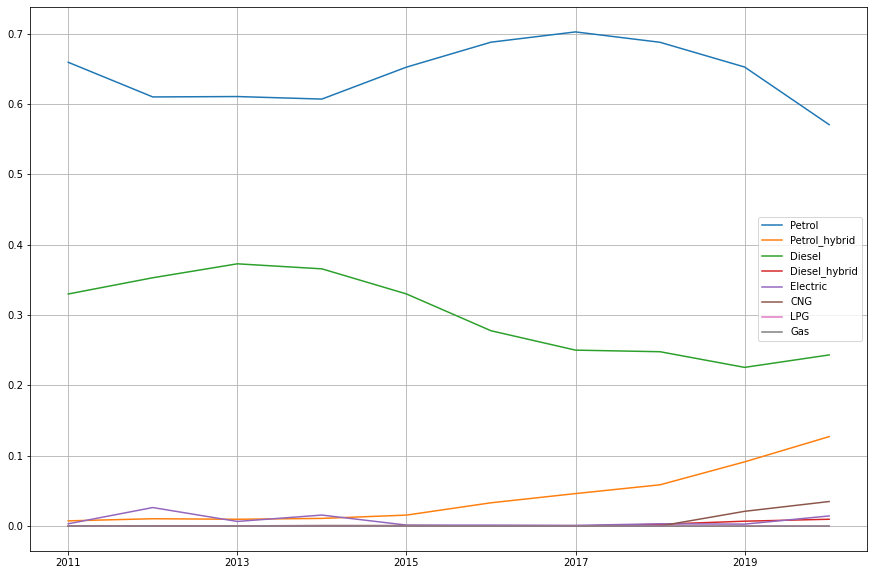

In [64]:
motor_type_data_yearly = pd.DataFrame([motor_type_data_2011_array, motor_type_data_2012_array, motor_type_data_2013_array, motor_type_data_2014_array, motor_type_data_2015_array, motor_type_data_2016_array, motor_type_data_2017_array, motor_type_data_2018_array, motor_type_data_2019_array, motor_type_data_2020_array],
     index=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_yearly

motor_type_data_yearly_ratio = pd.DataFrame([motor_type_data_2011_array_ratio, motor_type_data_2012_array_ratio, motor_type_data_2013_array_ratio, motor_type_data_2014_array_ratio, motor_type_data_2015_array_ratio, motor_type_data_2016_array_ratio, motor_type_data_2017_array_ratio, motor_type_data_2018_array_ratio, motor_type_data_2019_array_ratio, motor_type_data_2020_array_ratio],
     index=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_yearly_ratio

motor_type_data_yearly_ratio.plot(figsize=(15,10), grid=True)

In [45]:
motor_type_data_2011_jan = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 1]

total_bensiin_2011_jan = motor_type_data_2011_jan.loc[motor_type_data_2011_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_jan = motor_type_data_2011_jan.loc[motor_type_data_2011_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_jan = motor_type_data_2011_jan.loc[motor_type_data_2011_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_jan = motor_type_data_2011_jan.loc[motor_type_data_2011_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_jan = motor_type_data_2011_jan.loc[motor_type_data_2011_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_jan = motor_type_data_2011_jan.loc[motor_type_data_2011_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_jan = motor_type_data_2011_jan.loc[motor_type_data_2011_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_jan = motor_type_data_2011_jan.loc[motor_type_data_2011_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_jan_array = [total_bensiin_2011_jan, total_hübriid_2011_jan, total_diisel_2011_jan, total_hübriid_d_2011_jan, total_elekter_2011_jan, total_cng_2011_jan, total_lpg_2011_jan, total_gaas_2011_jan]
motor_type_data_2011_jan_array_ratio = [total_bensiin_2011_jan/sum(motor_type_data_2011_jan_array), total_hübriid_2011_jan/sum(motor_type_data_2011_jan_array), total_diisel_2011_jan/sum(motor_type_data_2011_jan_array), total_hübriid_d_2011_jan/sum(motor_type_data_2011_jan_array), total_elekter_2011_jan/sum(motor_type_data_2011_jan_array), total_cng_2011_jan/sum(motor_type_data_2011_jan_array), total_lpg_2011_jan/sum(motor_type_data_2011_jan_array), total_gaas_2011_jan/sum(motor_type_data_2011_jan_array)]

motor_type_data_2011_feb = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 2]

total_bensiin_2011_feb = motor_type_data_2011_feb.loc[motor_type_data_2011_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_feb = motor_type_data_2011_feb.loc[motor_type_data_2011_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_feb = motor_type_data_2011_feb.loc[motor_type_data_2011_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_feb = motor_type_data_2011_feb.loc[motor_type_data_2011_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_feb = motor_type_data_2011_feb.loc[motor_type_data_2011_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_feb = motor_type_data_2011_feb.loc[motor_type_data_2011_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_feb = motor_type_data_2011_feb.loc[motor_type_data_2011_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_feb = motor_type_data_2011_feb.loc[motor_type_data_2011_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_feb_array = [total_bensiin_2011_feb, total_hübriid_2011_feb, total_diisel_2011_feb, total_hübriid_d_2011_feb, total_elekter_2011_feb, total_cng_2011_feb, total_lpg_2011_feb, total_gaas_2011_feb]
motor_type_data_2011_feb_array_ratio = [total_bensiin_2011_feb/sum(motor_type_data_2011_feb_array), total_hübriid_2011_feb/sum(motor_type_data_2011_feb_array), total_diisel_2011_feb/sum(motor_type_data_2011_feb_array), total_hübriid_d_2011_feb/sum(motor_type_data_2011_feb_array), total_elekter_2011_feb/sum(motor_type_data_2011_feb_array), total_cng_2011_feb/sum(motor_type_data_2011_feb_array), total_lpg_2011_feb/sum(motor_type_data_2011_feb_array), total_gaas_2011_feb/sum(motor_type_data_2011_feb_array)]

motor_type_data_2011_mar = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 3]

total_bensiin_2011_mar = motor_type_data_2011_mar.loc[motor_type_data_2011_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_mar = motor_type_data_2011_mar.loc[motor_type_data_2011_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_mar = motor_type_data_2011_mar.loc[motor_type_data_2011_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_mar = motor_type_data_2011_mar.loc[motor_type_data_2011_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_mar = motor_type_data_2011_mar.loc[motor_type_data_2011_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_mar = motor_type_data_2011_mar.loc[motor_type_data_2011_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_mar = motor_type_data_2011_mar.loc[motor_type_data_2011_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_mar = motor_type_data_2011_mar.loc[motor_type_data_2011_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_mar_array = [total_bensiin_2011_mar, total_hübriid_2011_mar, total_diisel_2011_mar, total_hübriid_d_2011_mar, total_elekter_2011_mar, total_cng_2011_mar, total_lpg_2011_mar, total_gaas_2011_mar]
motor_type_data_2011_mar_array_ratio = [total_bensiin_2011_mar/sum(motor_type_data_2011_mar_array), total_hübriid_2011_mar/sum(motor_type_data_2011_mar_array), total_diisel_2011_mar/sum(motor_type_data_2011_mar_array), total_hübriid_d_2011_mar/sum(motor_type_data_2011_mar_array), total_elekter_2011_mar/sum(motor_type_data_2011_mar_array), total_cng_2011_mar/sum(motor_type_data_2011_mar_array), total_lpg_2011_mar/sum(motor_type_data_2011_mar_array), total_gaas_2011_mar/sum(motor_type_data_2011_mar_array)]

motor_type_data_2011_apr = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 4]

total_bensiin_2011_apr = motor_type_data_2011_apr.loc[motor_type_data_2011_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_apr = motor_type_data_2011_apr.loc[motor_type_data_2011_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_apr = motor_type_data_2011_apr.loc[motor_type_data_2011_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_apr = motor_type_data_2011_apr.loc[motor_type_data_2011_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_apr = motor_type_data_2011_apr.loc[motor_type_data_2011_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_apr = motor_type_data_2011_apr.loc[motor_type_data_2011_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_apr = motor_type_data_2011_apr.loc[motor_type_data_2011_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_apr = motor_type_data_2011_apr.loc[motor_type_data_2011_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_apr_array = [total_bensiin_2011_apr, total_hübriid_2011_apr, total_diisel_2011_apr, total_hübriid_d_2011_apr, total_elekter_2011_apr, total_cng_2011_apr, total_lpg_2011_apr, total_gaas_2011_apr]
motor_type_data_2011_apr_array_ratio = [total_bensiin_2011_apr/sum(motor_type_data_2011_apr_array), total_hübriid_2011_apr/sum(motor_type_data_2011_apr_array), total_diisel_2011_apr/sum(motor_type_data_2011_apr_array), total_hübriid_d_2011_apr/sum(motor_type_data_2011_apr_array), total_elekter_2011_apr/sum(motor_type_data_2011_apr_array), total_cng_2011_apr/sum(motor_type_data_2011_apr_array), total_lpg_2011_apr/sum(motor_type_data_2011_apr_array), total_gaas_2011_apr/sum(motor_type_data_2011_apr_array)]

motor_type_data_2011_may = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 5]

total_bensiin_2011_may = motor_type_data_2011_may.loc[motor_type_data_2011_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_may = motor_type_data_2011_may.loc[motor_type_data_2011_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_may = motor_type_data_2011_may.loc[motor_type_data_2011_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_may = motor_type_data_2011_may.loc[motor_type_data_2011_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_may = motor_type_data_2011_may.loc[motor_type_data_2011_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_may = motor_type_data_2011_may.loc[motor_type_data_2011_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_may = motor_type_data_2011_may.loc[motor_type_data_2011_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_may = motor_type_data_2011_may.loc[motor_type_data_2011_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_may_array = [total_bensiin_2011_may, total_hübriid_2011_may, total_diisel_2011_may, total_hübriid_d_2011_may, total_elekter_2011_may, total_cng_2011_may, total_lpg_2011_may, total_gaas_2011_may]
motor_type_data_2011_may_array_ratio = [total_bensiin_2011_may/sum(motor_type_data_2011_may_array), total_hübriid_2011_may/sum(motor_type_data_2011_may_array), total_diisel_2011_may/sum(motor_type_data_2011_may_array), total_hübriid_d_2011_may/sum(motor_type_data_2011_may_array), total_elekter_2011_may/sum(motor_type_data_2011_may_array), total_cng_2011_may/sum(motor_type_data_2011_may_array), total_lpg_2011_may/sum(motor_type_data_2011_may_array), total_gaas_2011_may/sum(motor_type_data_2011_may_array)]

motor_type_data_2011_jun = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 6]

total_bensiin_2011_jun = motor_type_data_2011_jun.loc[motor_type_data_2011_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_jun = motor_type_data_2011_jun.loc[motor_type_data_2011_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_jun = motor_type_data_2011_jun.loc[motor_type_data_2011_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_jun = motor_type_data_2011_jun.loc[motor_type_data_2011_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_jun = motor_type_data_2011_jun.loc[motor_type_data_2011_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_jun = motor_type_data_2011_jun.loc[motor_type_data_2011_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_jun = motor_type_data_2011_jun.loc[motor_type_data_2011_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_jun = motor_type_data_2011_jun.loc[motor_type_data_2011_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_jun_array = [total_bensiin_2011_jun, total_hübriid_2011_jun, total_diisel_2011_jun, total_hübriid_d_2011_jun, total_elekter_2011_jun, total_cng_2011_jun, total_lpg_2011_jun, total_gaas_2011_jun]
motor_type_data_2011_jun_array_ratio = [total_bensiin_2011_jun/sum(motor_type_data_2011_jun_array), total_hübriid_2011_jun/sum(motor_type_data_2011_jun_array), total_diisel_2011_jun/sum(motor_type_data_2011_jun_array), total_hübriid_d_2011_jun/sum(motor_type_data_2011_jun_array), total_elekter_2011_jun/sum(motor_type_data_2011_jun_array), total_cng_2011_jun/sum(motor_type_data_2011_jun_array), total_lpg_2011_jun/sum(motor_type_data_2011_jun_array), total_gaas_2011_jun/sum(motor_type_data_2011_jun_array)]

motor_type_data_2011_jul = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 7]

total_bensiin_2011_jul = motor_type_data_2011_jul.loc[motor_type_data_2011_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_jul = motor_type_data_2011_jul.loc[motor_type_data_2011_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_jul = motor_type_data_2011_jul.loc[motor_type_data_2011_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_jul = motor_type_data_2011_jul.loc[motor_type_data_2011_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_jul = motor_type_data_2011_jul.loc[motor_type_data_2011_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_jul = motor_type_data_2011_jul.loc[motor_type_data_2011_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_jul = motor_type_data_2011_jul.loc[motor_type_data_2011_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_jul = motor_type_data_2011_jul.loc[motor_type_data_2011_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_jul_array = [total_bensiin_2011_jul, total_hübriid_2011_jul, total_diisel_2011_jul, total_hübriid_d_2011_jul, total_elekter_2011_jul, total_cng_2011_jul, total_lpg_2011_jul, total_gaas_2011_jul]
motor_type_data_2011_jul_array_ratio = [total_bensiin_2011_jul/sum(motor_type_data_2011_jul_array), total_hübriid_2011_jul/sum(motor_type_data_2011_jul_array), total_diisel_2011_jul/sum(motor_type_data_2011_jul_array), total_hübriid_d_2011_jul/sum(motor_type_data_2011_jul_array), total_elekter_2011_jul/sum(motor_type_data_2011_jul_array), total_cng_2011_jul/sum(motor_type_data_2011_jul_array), total_lpg_2011_jul/sum(motor_type_data_2011_jul_array), total_gaas_2011_jul/sum(motor_type_data_2011_jul_array)]

motor_type_data_2011_aug = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 8]

total_bensiin_2011_aug = motor_type_data_2011_aug.loc[motor_type_data_2011_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_aug = motor_type_data_2011_aug.loc[motor_type_data_2011_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_aug = motor_type_data_2011_aug.loc[motor_type_data_2011_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_aug = motor_type_data_2011_aug.loc[motor_type_data_2011_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_aug = motor_type_data_2011_aug.loc[motor_type_data_2011_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_aug = motor_type_data_2011_aug.loc[motor_type_data_2011_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_aug = motor_type_data_2011_aug.loc[motor_type_data_2011_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_aug = motor_type_data_2011_aug.loc[motor_type_data_2011_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_aug_array = [total_bensiin_2011_aug, total_hübriid_2011_aug, total_diisel_2011_aug, total_hübriid_d_2011_aug, total_elekter_2011_aug, total_cng_2011_aug, total_lpg_2011_aug, total_gaas_2011_aug]
motor_type_data_2011_aug_array_ratio = [total_bensiin_2011_aug/sum(motor_type_data_2011_aug_array), total_hübriid_2011_aug/sum(motor_type_data_2011_aug_array), total_diisel_2011_aug/sum(motor_type_data_2011_aug_array), total_hübriid_d_2011_aug/sum(motor_type_data_2011_aug_array), total_elekter_2011_aug/sum(motor_type_data_2011_aug_array), total_cng_2011_aug/sum(motor_type_data_2011_aug_array), total_lpg_2011_aug/sum(motor_type_data_2011_aug_array), total_gaas_2011_aug/sum(motor_type_data_2011_aug_array)]

motor_type_data_2011_sep = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 9]

total_bensiin_2011_sep = motor_type_data_2011_sep.loc[motor_type_data_2011_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_sep = motor_type_data_2011_sep.loc[motor_type_data_2011_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_sep = motor_type_data_2011_sep.loc[motor_type_data_2011_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_sep = motor_type_data_2011_sep.loc[motor_type_data_2011_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_sep = motor_type_data_2011_sep.loc[motor_type_data_2011_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_sep = motor_type_data_2011_sep.loc[motor_type_data_2011_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_sep = motor_type_data_2011_sep.loc[motor_type_data_2011_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_sep = motor_type_data_2011_sep.loc[motor_type_data_2011_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_sep_array = [total_bensiin_2011_sep, total_hübriid_2011_sep, total_diisel_2011_sep, total_hübriid_d_2011_sep, total_elekter_2011_sep, total_cng_2011_sep, total_lpg_2011_sep, total_gaas_2011_sep]
motor_type_data_2011_sep_array_ratio = [total_bensiin_2011_sep/sum(motor_type_data_2011_sep_array), total_hübriid_2011_sep/sum(motor_type_data_2011_sep_array), total_diisel_2011_sep/sum(motor_type_data_2011_sep_array), total_hübriid_d_2011_sep/sum(motor_type_data_2011_sep_array), total_elekter_2011_sep/sum(motor_type_data_2011_sep_array), total_cng_2011_sep/sum(motor_type_data_2011_sep_array), total_lpg_2011_sep/sum(motor_type_data_2011_sep_array), total_gaas_2011_sep/sum(motor_type_data_2011_sep_array)]

motor_type_data_2011_oct = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 10]

total_bensiin_2011_oct = motor_type_data_2011_oct.loc[motor_type_data_2011_oct['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_oct = motor_type_data_2011_oct.loc[motor_type_data_2011_oct['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_oct = motor_type_data_2011_oct.loc[motor_type_data_2011_oct['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_oct = motor_type_data_2011_oct.loc[motor_type_data_2011_oct['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_oct = motor_type_data_2011_oct.loc[motor_type_data_2011_oct['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_oct = motor_type_data_2011_oct.loc[motor_type_data_2011_oct['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_oct = motor_type_data_2011_oct.loc[motor_type_data_2011_oct['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_oct = motor_type_data_2011_oct.loc[motor_type_data_2011_oct['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_oct_array = [total_bensiin_2011_oct, total_hübriid_2011_oct, total_diisel_2011_oct, total_hübriid_d_2011_oct, total_elekter_2011_oct, total_cng_2011_oct, total_lpg_2011_oct, total_gaas_2011_oct]
motor_type_data_2011_oct_array_ratio = [total_bensiin_2011_oct/sum(motor_type_data_2011_oct_array), total_hübriid_2011_oct/sum(motor_type_data_2011_oct_array), total_diisel_2011_oct/sum(motor_type_data_2011_oct_array), total_hübriid_d_2011_oct/sum(motor_type_data_2011_oct_array), total_elekter_2011_oct/sum(motor_type_data_2011_oct_array), total_cng_2011_oct/sum(motor_type_data_2011_oct_array), total_lpg_2011_oct/sum(motor_type_data_2011_oct_array), total_gaas_2011_oct/sum(motor_type_data_2011_oct_array)]

motor_type_data_2011_nov = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 11]

total_bensiin_2011_nov = motor_type_data_2011_nov.loc[motor_type_data_2011_nov['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_nov = motor_type_data_2011_nov.loc[motor_type_data_2011_nov['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_nov = motor_type_data_2011_nov.loc[motor_type_data_2011_nov['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_nov = motor_type_data_2011_nov.loc[motor_type_data_2011_nov['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_nov = motor_type_data_2011_nov.loc[motor_type_data_2011_nov['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_nov = motor_type_data_2011_nov.loc[motor_type_data_2011_nov['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_nov = motor_type_data_2011_nov.loc[motor_type_data_2011_nov['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_nov = motor_type_data_2011_nov.loc[motor_type_data_2011_nov['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_nov_array = [total_bensiin_2011_nov, total_hübriid_2011_nov, total_diisel_2011_nov, total_hübriid_d_2011_nov, total_elekter_2011_nov, total_cng_2011_nov, total_lpg_2011_nov, total_gaas_2011_nov]
motor_type_data_2011_nov_array_ratio = [total_bensiin_2011_nov/sum(motor_type_data_2011_nov_array), total_hübriid_2011_nov/sum(motor_type_data_2011_nov_array), total_diisel_2011_nov/sum(motor_type_data_2011_nov_array), total_hübriid_d_2011_nov/sum(motor_type_data_2011_nov_array), total_elekter_2011_nov/sum(motor_type_data_2011_nov_array), total_cng_2011_nov/sum(motor_type_data_2011_nov_array), total_lpg_2011_nov/sum(motor_type_data_2011_nov_array), total_gaas_2011_nov/sum(motor_type_data_2011_nov_array)]

motor_type_data_2011_dec = motor_type_data_2011.loc[motor_type_data_2011['Kuu'] == 12]

total_bensiin_2011_dec = motor_type_data_2011_dec.loc[motor_type_data_2011_dec['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2011_dec = motor_type_data_2011_dec.loc[motor_type_data_2011_dec['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2011_dec = motor_type_data_2011_dec.loc[motor_type_data_2011_dec['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2011_dec = motor_type_data_2011_dec.loc[motor_type_data_2011_dec['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2011_dec = motor_type_data_2011_dec.loc[motor_type_data_2011_dec['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2011_dec = motor_type_data_2011_dec.loc[motor_type_data_2011_dec['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2011_dec = motor_type_data_2011_dec.loc[motor_type_data_2011_dec['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2011_dec = motor_type_data_2011_dec.loc[motor_type_data_2011_dec['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2011_dec_array = [total_bensiin_2011_dec, total_hübriid_2011_dec, total_diisel_2011_dec, total_hübriid_d_2011_dec, total_elekter_2011_dec, total_cng_2011_dec, total_lpg_2011_dec, total_gaas_2011_dec]
motor_type_data_2011_dec_array_ratio = [total_bensiin_2011_dec/sum(motor_type_data_2011_dec_array), total_hübriid_2011_dec/sum(motor_type_data_2011_dec_array), total_diisel_2011_dec/sum(motor_type_data_2011_dec_array), total_hübriid_d_2011_dec/sum(motor_type_data_2011_dec_array), total_elekter_2011_dec/sum(motor_type_data_2011_dec_array), total_cng_2011_dec/sum(motor_type_data_2011_dec_array), total_lpg_2011_dec/sum(motor_type_data_2011_dec_array), total_gaas_2011_dec/sum(motor_type_data_2011_dec_array)]

motor_type_data_2011_monthly = pd.DataFrame([motor_type_data_2011_jan_array, motor_type_data_2011_feb_array, motor_type_data_2011_mar_array, motor_type_data_2011_apr_array, motor_type_data_2011_may_array, motor_type_data_2011_jun_array, motor_type_data_2011_jul_array, motor_type_data_2011_aug_array, motor_type_data_2011_sep_array, motor_type_data_2011_oct_array, motor_type_data_2011_nov_array, motor_type_data_2011_dec_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2011_monthly

motor_type_data_2011_monthly_ratio = pd.DataFrame([motor_type_data_2011_jan_array_ratio, motor_type_data_2011_feb_array_ratio, motor_type_data_2011_mar_array_ratio, motor_type_data_2011_apr_array_ratio, motor_type_data_2011_may_array_ratio, motor_type_data_2011_jun_array_ratio, motor_type_data_2011_jul_array_ratio, motor_type_data_2011_aug_array_ratio, motor_type_data_2011_sep_array_ratio, motor_type_data_2011_oct_array_ratio, motor_type_data_2011_nov_array_ratio, motor_type_data_2011_dec_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2011_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.538927,0.006047,0.455026,0.0,0.000000,0.00000,0.0,0.000000
feb,0.657051,0.005342,0.337607,0.0,0.000000,0.00000,0.0,0.000000
mar,0.648048,0.010094,0.341184,0.0,0.000673,0.00000,0.0,0.000000
apr,0.711313,0.008453,0.278934,0.0,0.000650,0.00000,0.0,0.000650
may,0.722416,0.004065,0.272358,0.0,0.000581,0.00000,0.0,0.000581
jun,0.705075,0.003429,0.291495,0.0,0.000000,0.00000,0.0,0.000000
jul,0.697368,0.004644,0.297988,0.0,0.000000,0.00000,0.0,0.000000
aug,0.683952,0.011913,0.303434,0.0,0.000701,0.00000,0.0,0.000000
sep,0.645685,0.012979,0.340688,0.0,0.000649,0.00000,0.0,0.000000
oct,0.646750,0.008536,0.309915,0.0,0.032830,0.00197,0.0,0.000000


In [46]:
motor_type_data_2012_jan = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 1]

total_bensiin_2012_jan = motor_type_data_2012_jan.loc[motor_type_data_2012_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_jan = motor_type_data_2012_jan.loc[motor_type_data_2012_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_jan = motor_type_data_2012_jan.loc[motor_type_data_2012_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_jan = motor_type_data_2012_jan.loc[motor_type_data_2012_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_jan = motor_type_data_2012_jan.loc[motor_type_data_2012_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_jan = motor_type_data_2012_jan.loc[motor_type_data_2012_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_jan = motor_type_data_2012_jan.loc[motor_type_data_2012_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_jan = motor_type_data_2012_jan.loc[motor_type_data_2012_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_jan_array = [total_bensiin_2012_jan, total_hübriid_2012_jan, total_diisel_2012_jan, total_hübriid_d_2012_jan, total_elekter_2012_jan, total_cng_2012_jan, total_lpg_2012_jan, total_gaas_2012_jan]
motor_type_data_2012_jan_array_ratio = [total_bensiin_2012_jan/sum(motor_type_data_2012_jan_array), total_hübriid_2012_jan/sum(motor_type_data_2012_jan_array), total_diisel_2012_jan/sum(motor_type_data_2012_jan_array), total_hübriid_d_2012_jan/sum(motor_type_data_2012_jan_array), total_elekter_2012_jan/sum(motor_type_data_2012_jan_array), total_cng_2012_jan/sum(motor_type_data_2012_jan_array), total_lpg_2012_jan/sum(motor_type_data_2012_jan_array), total_gaas_2012_jan/sum(motor_type_data_2012_jan_array)]

motor_type_data_2012_feb = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 2]

total_bensiin_2012_feb = motor_type_data_2012_feb.loc[motor_type_data_2012_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_feb = motor_type_data_2012_feb.loc[motor_type_data_2012_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_feb = motor_type_data_2012_feb.loc[motor_type_data_2012_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_feb = motor_type_data_2012_feb.loc[motor_type_data_2012_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_feb = motor_type_data_2012_feb.loc[motor_type_data_2012_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_feb = motor_type_data_2012_feb.loc[motor_type_data_2012_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_feb = motor_type_data_2012_feb.loc[motor_type_data_2012_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_feb = motor_type_data_2012_feb.loc[motor_type_data_2012_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_feb_array = [total_bensiin_2012_feb, total_hübriid_2012_feb, total_diisel_2012_feb, total_hübriid_d_2012_feb, total_elekter_2012_feb, total_cng_2012_feb, total_lpg_2012_feb, total_gaas_2012_feb]
motor_type_data_2012_feb_array_ratio = [total_bensiin_2012_feb/sum(motor_type_data_2012_feb_array), total_hübriid_2012_feb/sum(motor_type_data_2012_feb_array), total_diisel_2012_feb/sum(motor_type_data_2012_feb_array), total_hübriid_d_2012_feb/sum(motor_type_data_2012_feb_array), total_elekter_2012_feb/sum(motor_type_data_2012_feb_array), total_cng_2012_feb/sum(motor_type_data_2012_feb_array), total_lpg_2012_feb/sum(motor_type_data_2012_feb_array), total_gaas_2012_feb/sum(motor_type_data_2012_feb_array)]

motor_type_data_2012_mar = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 3]

total_bensiin_2012_mar = motor_type_data_2012_mar.loc[motor_type_data_2012_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_mar = motor_type_data_2012_mar.loc[motor_type_data_2012_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_mar = motor_type_data_2012_mar.loc[motor_type_data_2012_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_mar = motor_type_data_2012_mar.loc[motor_type_data_2012_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_mar = motor_type_data_2012_mar.loc[motor_type_data_2012_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_mar = motor_type_data_2012_mar.loc[motor_type_data_2012_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_mar = motor_type_data_2012_mar.loc[motor_type_data_2012_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_mar = motor_type_data_2012_mar.loc[motor_type_data_2012_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_mar_array = [total_bensiin_2012_mar, total_hübriid_2012_mar, total_diisel_2012_mar, total_hübriid_d_2012_mar, total_elekter_2012_mar, total_cng_2012_mar, total_lpg_2012_mar, total_gaas_2012_mar]
motor_type_data_2012_mar_array_ratio = [total_bensiin_2012_mar/sum(motor_type_data_2012_mar_array), total_hübriid_2012_mar/sum(motor_type_data_2012_mar_array), total_diisel_2012_mar/sum(motor_type_data_2012_mar_array), total_hübriid_d_2012_mar/sum(motor_type_data_2012_mar_array), total_elekter_2012_mar/sum(motor_type_data_2012_mar_array), total_cng_2012_mar/sum(motor_type_data_2012_mar_array), total_lpg_2012_mar/sum(motor_type_data_2012_mar_array), total_gaas_2012_mar/sum(motor_type_data_2012_mar_array)]

motor_type_data_2012_apr = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 4]

total_bensiin_2012_apr = motor_type_data_2012_apr.loc[motor_type_data_2012_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_apr = motor_type_data_2012_apr.loc[motor_type_data_2012_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_apr = motor_type_data_2012_apr.loc[motor_type_data_2012_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_apr = motor_type_data_2012_apr.loc[motor_type_data_2012_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_apr = motor_type_data_2012_apr.loc[motor_type_data_2012_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_apr = motor_type_data_2012_apr.loc[motor_type_data_2012_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_apr = motor_type_data_2012_apr.loc[motor_type_data_2012_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_apr = motor_type_data_2012_apr.loc[motor_type_data_2012_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_apr_array = [total_bensiin_2012_apr, total_hübriid_2012_apr, total_diisel_2012_apr, total_hübriid_d_2012_apr, total_elekter_2012_apr, total_cng_2012_apr, total_lpg_2012_apr, total_gaas_2012_apr]
motor_type_data_2012_apr_array_ratio = [total_bensiin_2012_apr/sum(motor_type_data_2012_apr_array), total_hübriid_2012_apr/sum(motor_type_data_2012_apr_array), total_diisel_2012_apr/sum(motor_type_data_2012_apr_array), total_hübriid_d_2012_apr/sum(motor_type_data_2012_apr_array), total_elekter_2012_apr/sum(motor_type_data_2012_apr_array), total_cng_2012_apr/sum(motor_type_data_2012_apr_array), total_lpg_2012_apr/sum(motor_type_data_2012_apr_array), total_gaas_2012_apr/sum(motor_type_data_2012_apr_array)]

motor_type_data_2012_may = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 5]

total_bensiin_2012_may = motor_type_data_2012_may.loc[motor_type_data_2012_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_may = motor_type_data_2012_may.loc[motor_type_data_2012_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_may = motor_type_data_2012_may.loc[motor_type_data_2012_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_may = motor_type_data_2012_may.loc[motor_type_data_2012_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_may = motor_type_data_2012_may.loc[motor_type_data_2012_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_may = motor_type_data_2012_may.loc[motor_type_data_2012_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_may = motor_type_data_2012_may.loc[motor_type_data_2012_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_may = motor_type_data_2012_may.loc[motor_type_data_2012_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_may_array = [total_bensiin_2012_may, total_hübriid_2012_may, total_diisel_2012_may, total_hübriid_d_2012_may, total_elekter_2012_may, total_cng_2012_may, total_lpg_2012_may, total_gaas_2012_may]
motor_type_data_2012_may_array_ratio = [total_bensiin_2012_may/sum(motor_type_data_2012_may_array), total_hübriid_2012_may/sum(motor_type_data_2012_may_array), total_diisel_2012_may/sum(motor_type_data_2012_may_array), total_hübriid_d_2012_may/sum(motor_type_data_2012_may_array), total_elekter_2012_may/sum(motor_type_data_2012_may_array), total_cng_2012_may/sum(motor_type_data_2012_may_array), total_lpg_2012_may/sum(motor_type_data_2012_may_array), total_gaas_2012_may/sum(motor_type_data_2012_may_array)]

motor_type_data_2012_jun = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 6]

total_bensiin_2012_jun = motor_type_data_2012_jun.loc[motor_type_data_2012_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_jun = motor_type_data_2012_jun.loc[motor_type_data_2012_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_jun = motor_type_data_2012_jun.loc[motor_type_data_2012_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_jun = motor_type_data_2012_jun.loc[motor_type_data_2012_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_jun = motor_type_data_2012_jun.loc[motor_type_data_2012_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_jun = motor_type_data_2012_jun.loc[motor_type_data_2012_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_jun = motor_type_data_2012_jun.loc[motor_type_data_2012_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_jun = motor_type_data_2012_jun.loc[motor_type_data_2012_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_jun_array = [total_bensiin_2012_jun, total_hübriid_2012_jun, total_diisel_2012_jun, total_hübriid_d_2012_jun, total_elekter_2012_jun, total_cng_2012_jun, total_lpg_2012_jun, total_gaas_2012_jun]
motor_type_data_2012_jun_array_ratio = [total_bensiin_2012_jun/sum(motor_type_data_2012_jun_array), total_hübriid_2012_jun/sum(motor_type_data_2012_jun_array), total_diisel_2012_jun/sum(motor_type_data_2012_jun_array), total_hübriid_d_2012_jun/sum(motor_type_data_2012_jun_array), total_elekter_2012_jun/sum(motor_type_data_2012_jun_array), total_cng_2012_jun/sum(motor_type_data_2012_jun_array), total_lpg_2012_jun/sum(motor_type_data_2012_jun_array), total_gaas_2012_jun/sum(motor_type_data_2012_jun_array)]

motor_type_data_2012_jul = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 7]

total_bensiin_2012_jul = motor_type_data_2012_jul.loc[motor_type_data_2012_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_jul = motor_type_data_2012_jul.loc[motor_type_data_2012_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_jul = motor_type_data_2012_jul.loc[motor_type_data_2012_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_jul = motor_type_data_2012_jul.loc[motor_type_data_2012_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_jul = motor_type_data_2012_jul.loc[motor_type_data_2012_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_jul = motor_type_data_2012_jul.loc[motor_type_data_2012_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_jul = motor_type_data_2012_jul.loc[motor_type_data_2012_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_jul = motor_type_data_2012_jul.loc[motor_type_data_2012_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_jul_array = [total_bensiin_2012_jul, total_hübriid_2012_jul, total_diisel_2012_jul, total_hübriid_d_2012_jul, total_elekter_2012_jul, total_cng_2012_jul, total_lpg_2012_jul, total_gaas_2012_jul]
motor_type_data_2012_jul_array_ratio = [total_bensiin_2012_jul/sum(motor_type_data_2012_jul_array), total_hübriid_2012_jul/sum(motor_type_data_2012_jul_array), total_diisel_2012_jul/sum(motor_type_data_2012_jul_array), total_hübriid_d_2012_jul/sum(motor_type_data_2012_jul_array), total_elekter_2012_jul/sum(motor_type_data_2012_jul_array), total_cng_2012_jul/sum(motor_type_data_2012_jul_array), total_lpg_2012_jul/sum(motor_type_data_2012_jul_array), total_gaas_2012_jul/sum(motor_type_data_2012_jul_array)]

motor_type_data_2012_aug = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 8]

total_bensiin_2012_aug = motor_type_data_2012_aug.loc[motor_type_data_2012_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_aug = motor_type_data_2012_aug.loc[motor_type_data_2012_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_aug = motor_type_data_2012_aug.loc[motor_type_data_2012_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_aug = motor_type_data_2012_aug.loc[motor_type_data_2012_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_aug = motor_type_data_2012_aug.loc[motor_type_data_2012_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_aug = motor_type_data_2012_aug.loc[motor_type_data_2012_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_aug = motor_type_data_2012_aug.loc[motor_type_data_2012_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_aug = motor_type_data_2012_aug.loc[motor_type_data_2012_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_aug_array = [total_bensiin_2012_aug, total_hübriid_2012_aug, total_diisel_2012_aug, total_hübriid_d_2012_aug, total_elekter_2012_aug, total_cng_2012_aug, total_lpg_2012_aug, total_gaas_2012_aug]
motor_type_data_2012_aug_array_ratio = [total_bensiin_2012_aug/sum(motor_type_data_2012_aug_array), total_hübriid_2012_aug/sum(motor_type_data_2012_aug_array), total_diisel_2012_aug/sum(motor_type_data_2012_aug_array), total_hübriid_d_2012_aug/sum(motor_type_data_2012_aug_array), total_elekter_2012_aug/sum(motor_type_data_2012_aug_array), total_cng_2012_aug/sum(motor_type_data_2012_aug_array), total_lpg_2012_aug/sum(motor_type_data_2012_aug_array), total_gaas_2012_aug/sum(motor_type_data_2012_aug_array)]

motor_type_data_2012_sep = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 9]

total_bensiin_2012_sep = motor_type_data_2012_sep.loc[motor_type_data_2012_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_sep = motor_type_data_2012_sep.loc[motor_type_data_2012_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_sep = motor_type_data_2012_sep.loc[motor_type_data_2012_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_sep = motor_type_data_2012_sep.loc[motor_type_data_2012_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_sep = motor_type_data_2012_sep.loc[motor_type_data_2012_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_sep = motor_type_data_2012_sep.loc[motor_type_data_2012_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_sep = motor_type_data_2012_sep.loc[motor_type_data_2012_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_sep = motor_type_data_2012_sep.loc[motor_type_data_2012_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_sep_array = [total_bensiin_2012_sep, total_hübriid_2012_sep, total_diisel_2012_sep, total_hübriid_d_2012_sep, total_elekter_2012_sep, total_cng_2012_sep, total_lpg_2012_sep, total_gaas_2012_sep]
motor_type_data_2012_sep_array_ratio = [total_bensiin_2012_sep/sum(motor_type_data_2012_sep_array), total_hübriid_2012_sep/sum(motor_type_data_2012_sep_array), total_diisel_2012_sep/sum(motor_type_data_2012_sep_array), total_hübriid_d_2012_sep/sum(motor_type_data_2012_sep_array), total_elekter_2012_sep/sum(motor_type_data_2012_sep_array), total_cng_2012_sep/sum(motor_type_data_2012_sep_array), total_lpg_2012_sep/sum(motor_type_data_2012_sep_array), total_gaas_2012_sep/sum(motor_type_data_2012_sep_array)]

motor_type_data_2012_oct = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 10]

total_bensiin_2012_oct = motor_type_data_2012_oct.loc[motor_type_data_2012_oct['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_oct = motor_type_data_2012_oct.loc[motor_type_data_2012_oct['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_oct = motor_type_data_2012_oct.loc[motor_type_data_2012_oct['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_oct = motor_type_data_2012_oct.loc[motor_type_data_2012_oct['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_oct = motor_type_data_2012_oct.loc[motor_type_data_2012_oct['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_oct = motor_type_data_2012_oct.loc[motor_type_data_2012_oct['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_oct = motor_type_data_2012_oct.loc[motor_type_data_2012_oct['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_oct = motor_type_data_2012_oct.loc[motor_type_data_2012_oct['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_oct_array = [total_bensiin_2012_oct, total_hübriid_2012_oct, total_diisel_2012_oct, total_hübriid_d_2012_oct, total_elekter_2012_oct, total_cng_2012_oct, total_lpg_2012_oct, total_gaas_2012_oct]
motor_type_data_2012_oct_array_ratio = [total_bensiin_2012_oct/sum(motor_type_data_2012_oct_array), total_hübriid_2012_oct/sum(motor_type_data_2012_oct_array), total_diisel_2012_oct/sum(motor_type_data_2012_oct_array), total_hübriid_d_2012_oct/sum(motor_type_data_2012_oct_array), total_elekter_2012_oct/sum(motor_type_data_2012_oct_array), total_cng_2012_oct/sum(motor_type_data_2012_oct_array), total_lpg_2012_oct/sum(motor_type_data_2012_oct_array), total_gaas_2012_oct/sum(motor_type_data_2012_oct_array)]

motor_type_data_2012_nov = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 11]

total_bensiin_2012_nov = motor_type_data_2012_nov.loc[motor_type_data_2012_nov['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_nov = motor_type_data_2012_nov.loc[motor_type_data_2012_nov['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_nov = motor_type_data_2012_nov.loc[motor_type_data_2012_nov['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_nov = motor_type_data_2012_nov.loc[motor_type_data_2012_nov['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_nov = motor_type_data_2012_nov.loc[motor_type_data_2012_nov['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_nov = motor_type_data_2012_nov.loc[motor_type_data_2012_nov['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_nov = motor_type_data_2012_nov.loc[motor_type_data_2012_nov['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_nov = motor_type_data_2012_nov.loc[motor_type_data_2012_nov['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_nov_array = [total_bensiin_2012_nov, total_hübriid_2012_nov, total_diisel_2012_nov, total_hübriid_d_2012_nov, total_elekter_2012_nov, total_cng_2012_nov, total_lpg_2012_nov, total_gaas_2012_nov]
motor_type_data_2012_nov_array_ratio = [total_bensiin_2012_nov/sum(motor_type_data_2012_nov_array), total_hübriid_2012_nov/sum(motor_type_data_2012_nov_array), total_diisel_2012_nov/sum(motor_type_data_2012_nov_array), total_hübriid_d_2012_nov/sum(motor_type_data_2012_nov_array), total_elekter_2012_nov/sum(motor_type_data_2012_nov_array), total_cng_2012_nov/sum(motor_type_data_2012_nov_array), total_lpg_2012_nov/sum(motor_type_data_2012_nov_array), total_gaas_2012_nov/sum(motor_type_data_2012_nov_array)]

motor_type_data_2012_dec = motor_type_data_2012.loc[motor_type_data_2012['Kuu'] == 12]

total_bensiin_2012_dec = motor_type_data_2012_dec.loc[motor_type_data_2012_dec['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2012_dec = motor_type_data_2012_dec.loc[motor_type_data_2012_dec['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2012_dec = motor_type_data_2012_dec.loc[motor_type_data_2012_dec['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2012_dec = motor_type_data_2012_dec.loc[motor_type_data_2012_dec['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2012_dec = motor_type_data_2012_dec.loc[motor_type_data_2012_dec['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2012_dec = motor_type_data_2012_dec.loc[motor_type_data_2012_dec['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2012_dec = motor_type_data_2012_dec.loc[motor_type_data_2012_dec['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2012_dec = motor_type_data_2012_dec.loc[motor_type_data_2012_dec['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2012_dec_array = [total_bensiin_2012_dec, total_hübriid_2012_dec, total_diisel_2012_dec, total_hübriid_d_2012_dec, total_elekter_2012_dec, total_cng_2012_dec, total_lpg_2012_dec, total_gaas_2012_dec]
motor_type_data_2012_dec_array_ratio = [total_bensiin_2012_dec/sum(motor_type_data_2012_dec_array), total_hübriid_2012_dec/sum(motor_type_data_2012_dec_array), total_diisel_2012_dec/sum(motor_type_data_2012_dec_array), total_hübriid_d_2012_dec/sum(motor_type_data_2012_dec_array), total_elekter_2012_dec/sum(motor_type_data_2012_dec_array), total_cng_2012_dec/sum(motor_type_data_2012_dec_array), total_lpg_2012_dec/sum(motor_type_data_2012_dec_array), total_gaas_2012_dec/sum(motor_type_data_2012_dec_array)]

motor_type_data_2012_monthly = pd.DataFrame([motor_type_data_2012_jan_array, motor_type_data_2012_feb_array, motor_type_data_2012_mar_array, motor_type_data_2012_apr_array, motor_type_data_2012_may_array, motor_type_data_2012_jun_array, motor_type_data_2012_jul_array, motor_type_data_2012_aug_array, motor_type_data_2012_sep_array, motor_type_data_2012_oct_array, motor_type_data_2012_nov_array, motor_type_data_2012_dec_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2012_monthly

motor_type_data_2012_monthly_ratio = pd.DataFrame([motor_type_data_2012_jan_array_ratio, motor_type_data_2012_feb_array_ratio, motor_type_data_2012_mar_array_ratio, motor_type_data_2012_apr_array_ratio, motor_type_data_2012_may_array_ratio, motor_type_data_2012_jun_array_ratio, motor_type_data_2012_jul_array_ratio, motor_type_data_2012_aug_array_ratio, motor_type_data_2012_sep_array_ratio, motor_type_data_2012_oct_array_ratio, motor_type_data_2012_nov_array_ratio, motor_type_data_2012_dec_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2012_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.601436,0.020347,0.376421,0.000000,0.001795,0.000000,0.0,0.0
feb,0.570552,0.003067,0.424080,0.000000,0.002301,0.000000,0.0,0.0
mar,0.627078,0.008907,0.349762,0.000000,0.014252,0.000000,0.0,0.0
apr,0.644759,0.011898,0.291785,0.000000,0.049858,0.001700,0.0,0.0
may,0.619464,0.009784,0.316684,0.000000,0.052523,0.001545,0.0,0.0
jun,0.599186,0.011699,0.329603,0.000000,0.059512,0.000000,0.0,0.0
jul,0.594760,0.011706,0.323857,0.000000,0.069677,0.000000,0.0,0.0
aug,0.633070,0.011858,0.339921,0.000000,0.015152,0.000000,0.0,0.0
sep,0.588501,0.009044,0.395349,0.000000,0.007106,0.000000,0.0,0.0
oct,0.617413,0.011036,0.366033,0.000613,0.004905,0.000000,0.0,0.0


In [47]:
motor_type_data_2013_jan = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 1]

total_bensiin_2013_jan = motor_type_data_2013_jan.loc[motor_type_data_2013_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_jan = motor_type_data_2013_jan.loc[motor_type_data_2013_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_jan = motor_type_data_2013_jan.loc[motor_type_data_2013_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_jan = motor_type_data_2013_jan.loc[motor_type_data_2013_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_jan = motor_type_data_2013_jan.loc[motor_type_data_2013_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_jan = motor_type_data_2013_jan.loc[motor_type_data_2013_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_jan = motor_type_data_2013_jan.loc[motor_type_data_2013_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_jan = motor_type_data_2013_jan.loc[motor_type_data_2013_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_jan_array = [total_bensiin_2013_jan, total_hübriid_2013_jan, total_diisel_2013_jan, total_hübriid_d_2013_jan, total_elekter_2013_jan, total_cng_2013_jan, total_lpg_2013_jan, total_gaas_2013_jan]
motor_type_data_2013_jan_array_ratio = [total_bensiin_2013_jan/sum(motor_type_data_2013_jan_array), total_hübriid_2013_jan/sum(motor_type_data_2013_jan_array), total_diisel_2013_jan/sum(motor_type_data_2013_jan_array), total_hübriid_d_2013_jan/sum(motor_type_data_2013_jan_array), total_elekter_2013_jan/sum(motor_type_data_2013_jan_array), total_cng_2013_jan/sum(motor_type_data_2013_jan_array), total_lpg_2013_jan/sum(motor_type_data_2013_jan_array), total_gaas_2013_jan/sum(motor_type_data_2013_jan_array)]

motor_type_data_2013_feb = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 2]

total_bensiin_2013_feb = motor_type_data_2013_feb.loc[motor_type_data_2013_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_feb = motor_type_data_2013_feb.loc[motor_type_data_2013_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_feb = motor_type_data_2013_feb.loc[motor_type_data_2013_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_feb = motor_type_data_2013_feb.loc[motor_type_data_2013_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_feb = motor_type_data_2013_feb.loc[motor_type_data_2013_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_feb = motor_type_data_2013_feb.loc[motor_type_data_2013_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_feb = motor_type_data_2013_feb.loc[motor_type_data_2013_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_feb = motor_type_data_2013_feb.loc[motor_type_data_2013_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_feb_array = [total_bensiin_2013_feb, total_hübriid_2013_feb, total_diisel_2013_feb, total_hübriid_d_2013_feb, total_elekter_2013_feb, total_cng_2013_feb, total_lpg_2013_feb, total_gaas_2013_feb]
motor_type_data_2013_feb_array_ratio = [total_bensiin_2013_feb/sum(motor_type_data_2013_feb_array), total_hübriid_2013_feb/sum(motor_type_data_2013_feb_array), total_diisel_2013_feb/sum(motor_type_data_2013_feb_array), total_hübriid_d_2013_feb/sum(motor_type_data_2013_feb_array), total_elekter_2013_feb/sum(motor_type_data_2013_feb_array), total_cng_2013_feb/sum(motor_type_data_2013_feb_array), total_lpg_2013_feb/sum(motor_type_data_2013_feb_array), total_gaas_2013_feb/sum(motor_type_data_2013_feb_array)]

motor_type_data_2013_mar = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 3]

total_bensiin_2013_mar = motor_type_data_2013_mar.loc[motor_type_data_2013_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_mar = motor_type_data_2013_mar.loc[motor_type_data_2013_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_mar = motor_type_data_2013_mar.loc[motor_type_data_2013_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_mar = motor_type_data_2013_mar.loc[motor_type_data_2013_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_mar = motor_type_data_2013_mar.loc[motor_type_data_2013_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_mar = motor_type_data_2013_mar.loc[motor_type_data_2013_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_mar = motor_type_data_2013_mar.loc[motor_type_data_2013_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_mar = motor_type_data_2013_mar.loc[motor_type_data_2013_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_mar_array = [total_bensiin_2013_mar, total_hübriid_2013_mar, total_diisel_2013_mar, total_hübriid_d_2013_mar, total_elekter_2013_mar, total_cng_2013_mar, total_lpg_2013_mar, total_gaas_2013_mar]
motor_type_data_2013_mar_array_ratio = [total_bensiin_2013_mar/sum(motor_type_data_2013_mar_array), total_hübriid_2013_mar/sum(motor_type_data_2013_mar_array), total_diisel_2013_mar/sum(motor_type_data_2013_mar_array), total_hübriid_d_2013_mar/sum(motor_type_data_2013_mar_array), total_elekter_2013_mar/sum(motor_type_data_2013_mar_array), total_cng_2013_mar/sum(motor_type_data_2013_mar_array), total_lpg_2013_mar/sum(motor_type_data_2013_mar_array), total_gaas_2013_mar/sum(motor_type_data_2013_mar_array)]

motor_type_data_2013_apr = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 4]

total_bensiin_2013_apr = motor_type_data_2013_apr.loc[motor_type_data_2013_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_apr = motor_type_data_2013_apr.loc[motor_type_data_2013_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_apr = motor_type_data_2013_apr.loc[motor_type_data_2013_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_apr = motor_type_data_2013_apr.loc[motor_type_data_2013_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_apr = motor_type_data_2013_apr.loc[motor_type_data_2013_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_apr = motor_type_data_2013_apr.loc[motor_type_data_2013_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_apr = motor_type_data_2013_apr.loc[motor_type_data_2013_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_apr = motor_type_data_2013_apr.loc[motor_type_data_2013_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_apr_array = [total_bensiin_2013_apr, total_hübriid_2013_apr, total_diisel_2013_apr, total_hübriid_d_2013_apr, total_elekter_2013_apr, total_cng_2013_apr, total_lpg_2013_apr, total_gaas_2013_apr]
motor_type_data_2013_apr_array_ratio = [total_bensiin_2013_apr/sum(motor_type_data_2013_apr_array), total_hübriid_2013_apr/sum(motor_type_data_2013_apr_array), total_diisel_2013_apr/sum(motor_type_data_2013_apr_array), total_hübriid_d_2013_apr/sum(motor_type_data_2013_apr_array), total_elekter_2013_apr/sum(motor_type_data_2013_apr_array), total_cng_2013_apr/sum(motor_type_data_2013_apr_array), total_lpg_2013_apr/sum(motor_type_data_2013_apr_array), total_gaas_2013_apr/sum(motor_type_data_2013_apr_array)]

motor_type_data_2013_may = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 5]

total_bensiin_2013_may = motor_type_data_2013_may.loc[motor_type_data_2013_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_may = motor_type_data_2013_may.loc[motor_type_data_2013_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_may = motor_type_data_2013_may.loc[motor_type_data_2013_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_may = motor_type_data_2013_may.loc[motor_type_data_2013_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_may = motor_type_data_2013_may.loc[motor_type_data_2013_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_may = motor_type_data_2013_may.loc[motor_type_data_2013_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_may = motor_type_data_2013_may.loc[motor_type_data_2013_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_may = motor_type_data_2013_may.loc[motor_type_data_2013_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_may_array = [total_bensiin_2013_may, total_hübriid_2013_may, total_diisel_2013_may, total_hübriid_d_2013_may, total_elekter_2013_may, total_cng_2013_may, total_lpg_2013_may, total_gaas_2013_may]
motor_type_data_2013_may_array_ratio = [total_bensiin_2013_may/sum(motor_type_data_2013_may_array), total_hübriid_2013_may/sum(motor_type_data_2013_may_array), total_diisel_2013_may/sum(motor_type_data_2013_may_array), total_hübriid_d_2013_may/sum(motor_type_data_2013_may_array), total_elekter_2013_may/sum(motor_type_data_2013_may_array), total_cng_2013_may/sum(motor_type_data_2013_may_array), total_lpg_2013_may/sum(motor_type_data_2013_may_array), total_gaas_2013_may/sum(motor_type_data_2013_may_array)]

motor_type_data_2013_jun = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 6]

total_bensiin_2013_jun = motor_type_data_2013_jun.loc[motor_type_data_2013_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_jun = motor_type_data_2013_jun.loc[motor_type_data_2013_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_jun = motor_type_data_2013_jun.loc[motor_type_data_2013_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_jun = motor_type_data_2013_jun.loc[motor_type_data_2013_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_jun = motor_type_data_2013_jun.loc[motor_type_data_2013_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_jun = motor_type_data_2013_jun.loc[motor_type_data_2013_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_jun = motor_type_data_2013_jun.loc[motor_type_data_2013_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_jun = motor_type_data_2013_jun.loc[motor_type_data_2013_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_jun_array = [total_bensiin_2013_jun, total_hübriid_2013_jun, total_diisel_2013_jun, total_hübriid_d_2013_jun, total_elekter_2013_jun, total_cng_2013_jun, total_lpg_2013_jun, total_gaas_2013_jun]
motor_type_data_2013_jun_array_ratio = [total_bensiin_2013_jun/sum(motor_type_data_2013_jun_array), total_hübriid_2013_jun/sum(motor_type_data_2013_jun_array), total_diisel_2013_jun/sum(motor_type_data_2013_jun_array), total_hübriid_d_2013_jun/sum(motor_type_data_2013_jun_array), total_elekter_2013_jun/sum(motor_type_data_2013_jun_array), total_cng_2013_jun/sum(motor_type_data_2013_jun_array), total_lpg_2013_jun/sum(motor_type_data_2013_jun_array), total_gaas_2013_jun/sum(motor_type_data_2013_jun_array)]

motor_type_data_2013_jul = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 7]

total_bensiin_2013_jul = motor_type_data_2013_jul.loc[motor_type_data_2013_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_jul = motor_type_data_2013_jul.loc[motor_type_data_2013_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_jul = motor_type_data_2013_jul.loc[motor_type_data_2013_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_jul = motor_type_data_2013_jul.loc[motor_type_data_2013_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_jul = motor_type_data_2013_jul.loc[motor_type_data_2013_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_jul = motor_type_data_2013_jul.loc[motor_type_data_2013_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_jul = motor_type_data_2013_jul.loc[motor_type_data_2013_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_jul = motor_type_data_2013_jul.loc[motor_type_data_2013_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_jul_array = [total_bensiin_2013_jul, total_hübriid_2013_jul, total_diisel_2013_jul, total_hübriid_d_2013_jul, total_elekter_2013_jul, total_cng_2013_jul, total_lpg_2013_jul, total_gaas_2013_jul]
motor_type_data_2013_jul_array_ratio = [total_bensiin_2013_jul/sum(motor_type_data_2013_jul_array), total_hübriid_2013_jul/sum(motor_type_data_2013_jul_array), total_diisel_2013_jul/sum(motor_type_data_2013_jul_array), total_hübriid_d_2013_jul/sum(motor_type_data_2013_jul_array), total_elekter_2013_jul/sum(motor_type_data_2013_jul_array), total_cng_2013_jul/sum(motor_type_data_2013_jul_array), total_lpg_2013_jul/sum(motor_type_data_2013_jul_array), total_gaas_2013_jul/sum(motor_type_data_2013_jul_array)]

motor_type_data_2013_aug = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 8]

total_bensiin_2013_aug = motor_type_data_2013_aug.loc[motor_type_data_2013_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_aug = motor_type_data_2013_aug.loc[motor_type_data_2013_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_aug = motor_type_data_2013_aug.loc[motor_type_data_2013_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_aug = motor_type_data_2013_aug.loc[motor_type_data_2013_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_aug = motor_type_data_2013_aug.loc[motor_type_data_2013_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_aug = motor_type_data_2013_aug.loc[motor_type_data_2013_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_aug = motor_type_data_2013_aug.loc[motor_type_data_2013_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_aug = motor_type_data_2013_aug.loc[motor_type_data_2013_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_aug_array = [total_bensiin_2013_aug, total_hübriid_2013_aug, total_diisel_2013_aug, total_hübriid_d_2013_aug, total_elekter_2013_aug, total_cng_2013_aug, total_lpg_2013_aug, total_gaas_2013_aug]
motor_type_data_2013_aug_array_ratio = [total_bensiin_2013_aug/sum(motor_type_data_2013_aug_array), total_hübriid_2013_aug/sum(motor_type_data_2013_aug_array), total_diisel_2013_aug/sum(motor_type_data_2013_aug_array), total_hübriid_d_2013_aug/sum(motor_type_data_2013_aug_array), total_elekter_2013_aug/sum(motor_type_data_2013_aug_array), total_cng_2013_aug/sum(motor_type_data_2013_aug_array), total_lpg_2013_aug/sum(motor_type_data_2013_aug_array), total_gaas_2013_aug/sum(motor_type_data_2013_aug_array)]

motor_type_data_2013_sep = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 9]

total_bensiin_2013_sep = motor_type_data_2013_sep.loc[motor_type_data_2013_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_sep = motor_type_data_2013_sep.loc[motor_type_data_2013_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_sep = motor_type_data_2013_sep.loc[motor_type_data_2013_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_sep = motor_type_data_2013_sep.loc[motor_type_data_2013_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_sep = motor_type_data_2013_sep.loc[motor_type_data_2013_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_sep = motor_type_data_2013_sep.loc[motor_type_data_2013_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_sep = motor_type_data_2013_sep.loc[motor_type_data_2013_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_sep = motor_type_data_2013_sep.loc[motor_type_data_2013_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_sep_array = [total_bensiin_2013_sep, total_hübriid_2013_sep, total_diisel_2013_sep, total_hübriid_d_2013_sep, total_elekter_2013_sep, total_cng_2013_sep, total_lpg_2013_sep, total_gaas_2013_sep]
motor_type_data_2013_sep_array_ratio = [total_bensiin_2013_sep/sum(motor_type_data_2013_sep_array), total_hübriid_2013_sep/sum(motor_type_data_2013_sep_array), total_diisel_2013_sep/sum(motor_type_data_2013_sep_array), total_hübriid_d_2013_sep/sum(motor_type_data_2013_sep_array), total_elekter_2013_sep/sum(motor_type_data_2013_sep_array), total_cng_2013_sep/sum(motor_type_data_2013_sep_array), total_lpg_2013_sep/sum(motor_type_data_2013_sep_array), total_gaas_2013_sep/sum(motor_type_data_2013_sep_array)]

motor_type_data_2013_oct = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 10]

total_bensiin_2013_oct = motor_type_data_2013_oct.loc[motor_type_data_2013_oct['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_oct = motor_type_data_2013_oct.loc[motor_type_data_2013_oct['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_oct = motor_type_data_2013_oct.loc[motor_type_data_2013_oct['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_oct = motor_type_data_2013_oct.loc[motor_type_data_2013_oct['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_oct = motor_type_data_2013_oct.loc[motor_type_data_2013_oct['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_oct = motor_type_data_2013_oct.loc[motor_type_data_2013_oct['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_oct = motor_type_data_2013_oct.loc[motor_type_data_2013_oct['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_oct = motor_type_data_2013_oct.loc[motor_type_data_2013_oct['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_oct_array = [total_bensiin_2013_oct, total_hübriid_2013_oct, total_diisel_2013_oct, total_hübriid_d_2013_oct, total_elekter_2013_oct, total_cng_2013_oct, total_lpg_2013_oct, total_gaas_2013_oct]
motor_type_data_2013_oct_array_ratio = [total_bensiin_2013_oct/sum(motor_type_data_2013_oct_array), total_hübriid_2013_oct/sum(motor_type_data_2013_oct_array), total_diisel_2013_oct/sum(motor_type_data_2013_oct_array), total_hübriid_d_2013_oct/sum(motor_type_data_2013_oct_array), total_elekter_2013_oct/sum(motor_type_data_2013_oct_array), total_cng_2013_oct/sum(motor_type_data_2013_oct_array), total_lpg_2013_oct/sum(motor_type_data_2013_oct_array), total_gaas_2013_oct/sum(motor_type_data_2013_oct_array)]

motor_type_data_2013_nov = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 11]

total_bensiin_2013_nov = motor_type_data_2013_nov.loc[motor_type_data_2013_nov['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_nov = motor_type_data_2013_nov.loc[motor_type_data_2013_nov['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_nov = motor_type_data_2013_nov.loc[motor_type_data_2013_nov['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_nov = motor_type_data_2013_nov.loc[motor_type_data_2013_nov['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_nov = motor_type_data_2013_nov.loc[motor_type_data_2013_nov['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_nov = motor_type_data_2013_nov.loc[motor_type_data_2013_nov['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_nov = motor_type_data_2013_nov.loc[motor_type_data_2013_nov['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_nov = motor_type_data_2013_nov.loc[motor_type_data_2013_nov['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_nov_array = [total_bensiin_2013_nov, total_hübriid_2013_nov, total_diisel_2013_nov, total_hübriid_d_2013_nov, total_elekter_2013_nov, total_cng_2013_nov, total_lpg_2013_nov, total_gaas_2013_nov]
motor_type_data_2013_nov_array_ratio = [total_bensiin_2013_nov/sum(motor_type_data_2013_nov_array), total_hübriid_2013_nov/sum(motor_type_data_2013_nov_array), total_diisel_2013_nov/sum(motor_type_data_2013_nov_array), total_hübriid_d_2013_nov/sum(motor_type_data_2013_nov_array), total_elekter_2013_nov/sum(motor_type_data_2013_nov_array), total_cng_2013_nov/sum(motor_type_data_2013_nov_array), total_lpg_2013_nov/sum(motor_type_data_2013_nov_array), total_gaas_2013_nov/sum(motor_type_data_2013_nov_array)]

motor_type_data_2013_dec = motor_type_data_2013.loc[motor_type_data_2013['Kuu'] == 12]

total_bensiin_2013_dec = motor_type_data_2013_dec.loc[motor_type_data_2013_dec['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2013_dec = motor_type_data_2013_dec.loc[motor_type_data_2013_dec['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2013_dec = motor_type_data_2013_dec.loc[motor_type_data_2013_dec['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2013_dec = motor_type_data_2013_dec.loc[motor_type_data_2013_dec['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2013_dec = motor_type_data_2013_dec.loc[motor_type_data_2013_dec['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2013_dec = motor_type_data_2013_dec.loc[motor_type_data_2013_dec['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2013_dec = motor_type_data_2013_dec.loc[motor_type_data_2013_dec['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2013_dec = motor_type_data_2013_dec.loc[motor_type_data_2013_dec['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2013_dec_array = [total_bensiin_2013_dec, total_hübriid_2013_dec, total_diisel_2013_dec, total_hübriid_d_2013_dec, total_elekter_2013_dec, total_cng_2013_dec, total_lpg_2013_dec, total_gaas_2013_dec]
motor_type_data_2013_dec_array_ratio = [total_bensiin_2013_dec/sum(motor_type_data_2013_dec_array), total_hübriid_2013_dec/sum(motor_type_data_2013_dec_array), total_diisel_2013_dec/sum(motor_type_data_2013_dec_array), total_hübriid_d_2013_dec/sum(motor_type_data_2013_dec_array), total_elekter_2013_dec/sum(motor_type_data_2013_dec_array), total_cng_2013_dec/sum(motor_type_data_2013_dec_array), total_lpg_2013_dec/sum(motor_type_data_2013_dec_array), total_gaas_2013_dec/sum(motor_type_data_2013_dec_array)]

motor_type_data_2013_monthly = pd.DataFrame([motor_type_data_2013_jan_array, motor_type_data_2013_feb_array, motor_type_data_2013_mar_array, motor_type_data_2013_apr_array, motor_type_data_2013_may_array, motor_type_data_2013_jun_array, motor_type_data_2013_jul_array, motor_type_data_2013_aug_array, motor_type_data_2013_sep_array, motor_type_data_2013_oct_array, motor_type_data_2013_nov_array, motor_type_data_2013_dec_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2013_monthly

motor_type_data_2013_monthly_ratio = pd.DataFrame([motor_type_data_2013_jan_array_ratio, motor_type_data_2013_feb_array_ratio, motor_type_data_2013_mar_array_ratio, motor_type_data_2013_apr_array_ratio, motor_type_data_2013_may_array_ratio, motor_type_data_2013_jun_array_ratio, motor_type_data_2013_jul_array_ratio, motor_type_data_2013_aug_array_ratio, motor_type_data_2013_sep_array_ratio, motor_type_data_2013_oct_array_ratio, motor_type_data_2013_nov_array_ratio, motor_type_data_2013_dec_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2013_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.602452,0.014011,0.382954,0.000000,0.000584,0.000000,0.000000,0.0
feb,0.631232,0.008065,0.359971,0.000000,0.000733,0.000000,0.000000,0.0
mar,0.621472,0.010429,0.348466,0.000000,0.019632,0.000000,0.000000,0.0
apr,0.632748,0.011364,0.351756,0.000000,0.003099,0.000517,0.000517,0.0
may,0.610085,0.010484,0.375437,0.000000,0.001997,0.001997,0.000000,0.0
jun,0.633588,0.005872,0.350558,0.000000,0.009982,0.000000,0.000000,0.0
jul,0.590282,0.008835,0.398123,0.000000,0.002209,0.000552,0.000000,0.0
aug,0.559471,0.008811,0.424166,0.000000,0.007552,0.000000,0.000000,0.0
sep,0.604844,0.015296,0.372212,0.001912,0.005736,0.000000,0.000000,0.0
oct,0.605117,0.007230,0.376529,0.000000,0.011123,0.000000,0.000000,0.0


In [48]:
motor_type_data_2014_jan = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 1]

total_bensiin_2014_jan = motor_type_data_2014_jan.loc[motor_type_data_2014_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_jan = motor_type_data_2014_jan.loc[motor_type_data_2014_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_jan = motor_type_data_2014_jan.loc[motor_type_data_2014_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_jan = motor_type_data_2014_jan.loc[motor_type_data_2014_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_jan = motor_type_data_2014_jan.loc[motor_type_data_2014_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_jan = motor_type_data_2014_jan.loc[motor_type_data_2014_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_jan = motor_type_data_2014_jan.loc[motor_type_data_2014_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_jan = motor_type_data_2014_jan.loc[motor_type_data_2014_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_jan_array = [total_bensiin_2014_jan, total_hübriid_2014_jan, total_diisel_2014_jan, total_hübriid_d_2014_jan, total_elekter_2014_jan, total_cng_2014_jan, total_lpg_2014_jan, total_gaas_2014_jan]
motor_type_data_2014_jan_array_ratio = [total_bensiin_2014_jan/sum(motor_type_data_2014_jan_array), total_hübriid_2014_jan/sum(motor_type_data_2014_jan_array), total_diisel_2014_jan/sum(motor_type_data_2014_jan_array), total_hübriid_d_2014_jan/sum(motor_type_data_2014_jan_array), total_elekter_2014_jan/sum(motor_type_data_2014_jan_array), total_cng_2014_jan/sum(motor_type_data_2014_jan_array), total_lpg_2014_jan/sum(motor_type_data_2014_jan_array), total_gaas_2014_jan/sum(motor_type_data_2014_jan_array)]

motor_type_data_2014_feb = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 2]

total_bensiin_2014_feb = motor_type_data_2014_feb.loc[motor_type_data_2014_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_feb = motor_type_data_2014_feb.loc[motor_type_data_2014_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_feb = motor_type_data_2014_feb.loc[motor_type_data_2014_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_feb = motor_type_data_2014_feb.loc[motor_type_data_2014_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_feb = motor_type_data_2014_feb.loc[motor_type_data_2014_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_feb = motor_type_data_2014_feb.loc[motor_type_data_2014_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_feb = motor_type_data_2014_feb.loc[motor_type_data_2014_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_feb = motor_type_data_2014_feb.loc[motor_type_data_2014_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_feb_array = [total_bensiin_2014_feb, total_hübriid_2014_feb, total_diisel_2014_feb, total_hübriid_d_2014_feb, total_elekter_2014_feb, total_cng_2014_feb, total_lpg_2014_feb, total_gaas_2014_feb]
motor_type_data_2014_feb_array_ratio = [total_bensiin_2014_feb/sum(motor_type_data_2014_feb_array), total_hübriid_2014_feb/sum(motor_type_data_2014_feb_array), total_diisel_2014_feb/sum(motor_type_data_2014_feb_array), total_hübriid_d_2014_feb/sum(motor_type_data_2014_feb_array), total_elekter_2014_feb/sum(motor_type_data_2014_feb_array), total_cng_2014_feb/sum(motor_type_data_2014_feb_array), total_lpg_2014_feb/sum(motor_type_data_2014_feb_array), total_gaas_2014_feb/sum(motor_type_data_2014_feb_array)]

motor_type_data_2014_mar = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 3]

total_bensiin_2014_mar = motor_type_data_2014_mar.loc[motor_type_data_2014_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_mar = motor_type_data_2014_mar.loc[motor_type_data_2014_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_mar = motor_type_data_2014_mar.loc[motor_type_data_2014_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_mar = motor_type_data_2014_mar.loc[motor_type_data_2014_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_mar = motor_type_data_2014_mar.loc[motor_type_data_2014_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_mar = motor_type_data_2014_mar.loc[motor_type_data_2014_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_mar = motor_type_data_2014_mar.loc[motor_type_data_2014_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_mar = motor_type_data_2014_mar.loc[motor_type_data_2014_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_mar_array = [total_bensiin_2014_mar, total_hübriid_2014_mar, total_diisel_2014_mar, total_hübriid_d_2014_mar, total_elekter_2014_mar, total_cng_2014_mar, total_lpg_2014_mar, total_gaas_2014_mar]
motor_type_data_2014_mar_array_ratio = [total_bensiin_2014_mar/sum(motor_type_data_2014_mar_array), total_hübriid_2014_mar/sum(motor_type_data_2014_mar_array), total_diisel_2014_mar/sum(motor_type_data_2014_mar_array), total_hübriid_d_2014_mar/sum(motor_type_data_2014_mar_array), total_elekter_2014_mar/sum(motor_type_data_2014_mar_array), total_cng_2014_mar/sum(motor_type_data_2014_mar_array), total_lpg_2014_mar/sum(motor_type_data_2014_mar_array), total_gaas_2014_mar/sum(motor_type_data_2014_mar_array)]

motor_type_data_2014_apr = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 4]

total_bensiin_2014_apr = motor_type_data_2014_apr.loc[motor_type_data_2014_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_apr = motor_type_data_2014_apr.loc[motor_type_data_2014_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_apr = motor_type_data_2014_apr.loc[motor_type_data_2014_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_apr = motor_type_data_2014_apr.loc[motor_type_data_2014_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_apr = motor_type_data_2014_apr.loc[motor_type_data_2014_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_apr = motor_type_data_2014_apr.loc[motor_type_data_2014_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_apr = motor_type_data_2014_apr.loc[motor_type_data_2014_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_apr = motor_type_data_2014_apr.loc[motor_type_data_2014_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_apr_array = [total_bensiin_2014_apr, total_hübriid_2014_apr, total_diisel_2014_apr, total_hübriid_d_2014_apr, total_elekter_2014_apr, total_cng_2014_apr, total_lpg_2014_apr, total_gaas_2014_apr]
motor_type_data_2014_apr_array_ratio = [total_bensiin_2014_apr/sum(motor_type_data_2014_apr_array), total_hübriid_2014_apr/sum(motor_type_data_2014_apr_array), total_diisel_2014_apr/sum(motor_type_data_2014_apr_array), total_hübriid_d_2014_apr/sum(motor_type_data_2014_apr_array), total_elekter_2014_apr/sum(motor_type_data_2014_apr_array), total_cng_2014_apr/sum(motor_type_data_2014_apr_array), total_lpg_2014_apr/sum(motor_type_data_2014_apr_array), total_gaas_2014_apr/sum(motor_type_data_2014_apr_array)]

motor_type_data_2014_may = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 5]

total_bensiin_2014_may = motor_type_data_2014_may.loc[motor_type_data_2014_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_may = motor_type_data_2014_may.loc[motor_type_data_2014_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_may = motor_type_data_2014_may.loc[motor_type_data_2014_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_may = motor_type_data_2014_may.loc[motor_type_data_2014_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_may = motor_type_data_2014_may.loc[motor_type_data_2014_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_may = motor_type_data_2014_may.loc[motor_type_data_2014_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_may = motor_type_data_2014_may.loc[motor_type_data_2014_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_may = motor_type_data_2014_may.loc[motor_type_data_2014_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_may_array = [total_bensiin_2014_may, total_hübriid_2014_may, total_diisel_2014_may, total_hübriid_d_2014_may, total_elekter_2014_may, total_cng_2014_may, total_lpg_2014_may, total_gaas_2014_may]
motor_type_data_2014_may_array_ratio = [total_bensiin_2014_may/sum(motor_type_data_2014_may_array), total_hübriid_2014_may/sum(motor_type_data_2014_may_array), total_diisel_2014_may/sum(motor_type_data_2014_may_array), total_hübriid_d_2014_may/sum(motor_type_data_2014_may_array), total_elekter_2014_may/sum(motor_type_data_2014_may_array), total_cng_2014_may/sum(motor_type_data_2014_may_array), total_lpg_2014_may/sum(motor_type_data_2014_may_array), total_gaas_2014_may/sum(motor_type_data_2014_may_array)]

motor_type_data_2014_jun = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 6]

total_bensiin_2014_jun = motor_type_data_2014_jun.loc[motor_type_data_2014_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_jun = motor_type_data_2014_jun.loc[motor_type_data_2014_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_jun = motor_type_data_2014_jun.loc[motor_type_data_2014_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_jun = motor_type_data_2014_jun.loc[motor_type_data_2014_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_jun = motor_type_data_2014_jun.loc[motor_type_data_2014_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_jun = motor_type_data_2014_jun.loc[motor_type_data_2014_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_jun = motor_type_data_2014_jun.loc[motor_type_data_2014_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_jun = motor_type_data_2014_jun.loc[motor_type_data_2014_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_jun_array = [total_bensiin_2014_jun, total_hübriid_2014_jun, total_diisel_2014_jun, total_hübriid_d_2014_jun, total_elekter_2014_jun, total_cng_2014_jun, total_lpg_2014_jun, total_gaas_2014_jun]
motor_type_data_2014_jun_array_ratio = [total_bensiin_2014_jun/sum(motor_type_data_2014_jun_array), total_hübriid_2014_jun/sum(motor_type_data_2014_jun_array), total_diisel_2014_jun/sum(motor_type_data_2014_jun_array), total_hübriid_d_2014_jun/sum(motor_type_data_2014_jun_array), total_elekter_2014_jun/sum(motor_type_data_2014_jun_array), total_cng_2014_jun/sum(motor_type_data_2014_jun_array), total_lpg_2014_jun/sum(motor_type_data_2014_jun_array), total_gaas_2014_jun/sum(motor_type_data_2014_jun_array)]

motor_type_data_2014_jul = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 7]

total_bensiin_2014_jul = motor_type_data_2014_jul.loc[motor_type_data_2014_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_jul = motor_type_data_2014_jul.loc[motor_type_data_2014_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_jul = motor_type_data_2014_jul.loc[motor_type_data_2014_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_jul = motor_type_data_2014_jul.loc[motor_type_data_2014_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_jul = motor_type_data_2014_jul.loc[motor_type_data_2014_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_jul = motor_type_data_2014_jul.loc[motor_type_data_2014_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_jul = motor_type_data_2014_jul.loc[motor_type_data_2014_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_jul = motor_type_data_2014_jul.loc[motor_type_data_2014_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_jul_array = [total_bensiin_2014_jul, total_hübriid_2014_jul, total_diisel_2014_jul, total_hübriid_d_2014_jul, total_elekter_2014_jul, total_cng_2014_jul, total_lpg_2014_jul, total_gaas_2014_jul]
motor_type_data_2014_jul_array_ratio = [total_bensiin_2014_jul/sum(motor_type_data_2014_jul_array), total_hübriid_2014_jul/sum(motor_type_data_2014_jul_array), total_diisel_2014_jul/sum(motor_type_data_2014_jul_array), total_hübriid_d_2014_jul/sum(motor_type_data_2014_jul_array), total_elekter_2014_jul/sum(motor_type_data_2014_jul_array), total_cng_2014_jul/sum(motor_type_data_2014_jul_array), total_lpg_2014_jul/sum(motor_type_data_2014_jul_array), total_gaas_2014_jul/sum(motor_type_data_2014_jul_array)]

motor_type_data_2014_aug = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 8]

total_bensiin_2014_aug = motor_type_data_2014_aug.loc[motor_type_data_2014_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_aug = motor_type_data_2014_aug.loc[motor_type_data_2014_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_aug = motor_type_data_2014_aug.loc[motor_type_data_2014_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_aug = motor_type_data_2014_aug.loc[motor_type_data_2014_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_aug = motor_type_data_2014_aug.loc[motor_type_data_2014_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_aug = motor_type_data_2014_aug.loc[motor_type_data_2014_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_aug = motor_type_data_2014_aug.loc[motor_type_data_2014_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_aug = motor_type_data_2014_aug.loc[motor_type_data_2014_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_aug_array = [total_bensiin_2014_aug, total_hübriid_2014_aug, total_diisel_2014_aug, total_hübriid_d_2014_aug, total_elekter_2014_aug, total_cng_2014_aug, total_lpg_2014_aug, total_gaas_2014_aug]
motor_type_data_2014_aug_array_ratio = [total_bensiin_2014_aug/sum(motor_type_data_2014_aug_array), total_hübriid_2014_aug/sum(motor_type_data_2014_aug_array), total_diisel_2014_aug/sum(motor_type_data_2014_aug_array), total_hübriid_d_2014_aug/sum(motor_type_data_2014_aug_array), total_elekter_2014_aug/sum(motor_type_data_2014_aug_array), total_cng_2014_aug/sum(motor_type_data_2014_aug_array), total_lpg_2014_aug/sum(motor_type_data_2014_aug_array), total_gaas_2014_aug/sum(motor_type_data_2014_aug_array)]

motor_type_data_2014_sep = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 9]

total_bensiin_2014_sep = motor_type_data_2014_sep.loc[motor_type_data_2014_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_sep = motor_type_data_2014_sep.loc[motor_type_data_2014_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_sep = motor_type_data_2014_sep.loc[motor_type_data_2014_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_sep = motor_type_data_2014_sep.loc[motor_type_data_2014_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_sep = motor_type_data_2014_sep.loc[motor_type_data_2014_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_sep = motor_type_data_2014_sep.loc[motor_type_data_2014_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_sep = motor_type_data_2014_sep.loc[motor_type_data_2014_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_sep = motor_type_data_2014_sep.loc[motor_type_data_2014_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_sep_array = [total_bensiin_2014_sep, total_hübriid_2014_sep, total_diisel_2014_sep, total_hübriid_d_2014_sep, total_elekter_2014_sep, total_cng_2014_sep, total_lpg_2014_sep, total_gaas_2014_sep]
motor_type_data_2014_sep_array_ratio = [total_bensiin_2014_sep/sum(motor_type_data_2014_sep_array), total_hübriid_2014_sep/sum(motor_type_data_2014_sep_array), total_diisel_2014_sep/sum(motor_type_data_2014_sep_array), total_hübriid_d_2014_sep/sum(motor_type_data_2014_sep_array), total_elekter_2014_sep/sum(motor_type_data_2014_sep_array), total_cng_2014_sep/sum(motor_type_data_2014_sep_array), total_lpg_2014_sep/sum(motor_type_data_2014_sep_array), total_gaas_2014_sep/sum(motor_type_data_2014_sep_array)]

motor_type_data_2014_oct = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 10]

total_bensiin_2014_oct = motor_type_data_2014_oct.loc[motor_type_data_2014_oct['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_oct = motor_type_data_2014_oct.loc[motor_type_data_2014_oct['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_oct = motor_type_data_2014_oct.loc[motor_type_data_2014_oct['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_oct = motor_type_data_2014_oct.loc[motor_type_data_2014_oct['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_oct = motor_type_data_2014_oct.loc[motor_type_data_2014_oct['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_oct = motor_type_data_2014_oct.loc[motor_type_data_2014_oct['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_oct = motor_type_data_2014_oct.loc[motor_type_data_2014_oct['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_oct = motor_type_data_2014_oct.loc[motor_type_data_2014_oct['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_oct_array = [total_bensiin_2014_oct, total_hübriid_2014_oct, total_diisel_2014_oct, total_hübriid_d_2014_oct, total_elekter_2014_oct, total_cng_2014_oct, total_lpg_2014_oct, total_gaas_2014_oct]
motor_type_data_2014_oct_array_ratio = [total_bensiin_2014_oct/sum(motor_type_data_2014_oct_array), total_hübriid_2014_oct/sum(motor_type_data_2014_oct_array), total_diisel_2014_oct/sum(motor_type_data_2014_oct_array), total_hübriid_d_2014_oct/sum(motor_type_data_2014_oct_array), total_elekter_2014_oct/sum(motor_type_data_2014_oct_array), total_cng_2014_oct/sum(motor_type_data_2014_oct_array), total_lpg_2014_oct/sum(motor_type_data_2014_oct_array), total_gaas_2014_oct/sum(motor_type_data_2014_oct_array)]

motor_type_data_2014_nov = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 11]

total_bensiin_2014_nov = motor_type_data_2014_nov.loc[motor_type_data_2014_nov['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_nov = motor_type_data_2014_nov.loc[motor_type_data_2014_nov['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_nov = motor_type_data_2014_nov.loc[motor_type_data_2014_nov['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_nov = motor_type_data_2014_nov.loc[motor_type_data_2014_nov['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_nov = motor_type_data_2014_nov.loc[motor_type_data_2014_nov['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_nov = motor_type_data_2014_nov.loc[motor_type_data_2014_nov['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_nov = motor_type_data_2014_nov.loc[motor_type_data_2014_nov['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_nov = motor_type_data_2014_nov.loc[motor_type_data_2014_nov['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_nov_array = [total_bensiin_2014_nov, total_hübriid_2014_nov, total_diisel_2014_nov, total_hübriid_d_2014_nov, total_elekter_2014_nov, total_cng_2014_nov, total_lpg_2014_nov, total_gaas_2014_nov]
motor_type_data_2014_nov_array_ratio = [total_bensiin_2014_nov/sum(motor_type_data_2014_nov_array), total_hübriid_2014_nov/sum(motor_type_data_2014_nov_array), total_diisel_2014_nov/sum(motor_type_data_2014_nov_array), total_hübriid_d_2014_nov/sum(motor_type_data_2014_nov_array), total_elekter_2014_nov/sum(motor_type_data_2014_nov_array), total_cng_2014_nov/sum(motor_type_data_2014_nov_array), total_lpg_2014_nov/sum(motor_type_data_2014_nov_array), total_gaas_2014_nov/sum(motor_type_data_2014_nov_array)]

motor_type_data_2014_dec = motor_type_data_2014.loc[motor_type_data_2014['Kuu'] == 12]

total_bensiin_2014_dec = motor_type_data_2014_dec.loc[motor_type_data_2014_dec['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2014_dec = motor_type_data_2014_dec.loc[motor_type_data_2014_dec['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2014_dec = motor_type_data_2014_dec.loc[motor_type_data_2014_dec['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2014_dec = motor_type_data_2014_dec.loc[motor_type_data_2014_dec['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2014_dec = motor_type_data_2014_dec.loc[motor_type_data_2014_dec['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2014_dec = motor_type_data_2014_dec.loc[motor_type_data_2014_dec['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2014_dec = motor_type_data_2014_dec.loc[motor_type_data_2014_dec['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2014_dec = motor_type_data_2014_dec.loc[motor_type_data_2014_dec['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2014_dec_array = [total_bensiin_2014_dec, total_hübriid_2014_dec, total_diisel_2014_dec, total_hübriid_d_2014_dec, total_elekter_2014_dec, total_cng_2014_dec, total_lpg_2014_dec, total_gaas_2014_dec]
motor_type_data_2014_dec_array_ratio = [total_bensiin_2014_dec/sum(motor_type_data_2014_dec_array), total_hübriid_2014_dec/sum(motor_type_data_2014_dec_array), total_diisel_2014_dec/sum(motor_type_data_2014_dec_array), total_hübriid_d_2014_dec/sum(motor_type_data_2014_dec_array), total_elekter_2014_dec/sum(motor_type_data_2014_dec_array), total_cng_2014_dec/sum(motor_type_data_2014_dec_array), total_lpg_2014_dec/sum(motor_type_data_2014_dec_array), total_gaas_2014_dec/sum(motor_type_data_2014_dec_array)]

motor_type_data_2014_monthly = pd.DataFrame([motor_type_data_2014_jan_array, motor_type_data_2014_feb_array, motor_type_data_2014_mar_array, motor_type_data_2014_apr_array, motor_type_data_2014_may_array, motor_type_data_2014_jun_array, motor_type_data_2014_jul_array, motor_type_data_2014_aug_array, motor_type_data_2014_sep_array, motor_type_data_2014_oct_array, motor_type_data_2014_nov_array, motor_type_data_2014_dec_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2014_monthly

motor_type_data_2014_monthly_ratio = pd.DataFrame([motor_type_data_2014_jan_array_ratio, motor_type_data_2014_feb_array_ratio, motor_type_data_2014_mar_array_ratio, motor_type_data_2014_apr_array_ratio, motor_type_data_2014_may_array_ratio, motor_type_data_2014_jun_array_ratio, motor_type_data_2014_jul_array_ratio, motor_type_data_2014_aug_array_ratio, motor_type_data_2014_sep_array_ratio, motor_type_data_2014_oct_array_ratio, motor_type_data_2014_nov_array_ratio, motor_type_data_2014_dec_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2014_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.576449,0.009864,0.404439,0.000617,0.007398,0.001233,0.0,0.0
feb,0.542837,0.005618,0.433287,0.000000,0.018258,0.000000,0.0,0.0
mar,0.603885,0.020012,0.367863,0.000000,0.008240,0.000000,0.0,0.0
apr,0.612824,0.006853,0.366128,0.000000,0.013705,0.000489,0.0,0.0
may,0.625566,0.011575,0.344741,0.000000,0.015601,0.002516,0.0,0.0
jun,0.617740,0.010032,0.359029,0.000000,0.010560,0.002640,0.0,0.0
jul,0.616890,0.013388,0.353759,0.000000,0.015963,0.000000,0.0,0.0
aug,0.627212,0.016473,0.333130,0.000000,0.021354,0.001830,0.0,0.0
sep,0.615721,0.012009,0.344432,0.000546,0.027293,0.000000,0.0,0.0
oct,0.618339,0.007201,0.354297,0.000480,0.019683,0.000000,0.0,0.0


In [49]:
motor_type_data_2015_jan = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 1]

total_bensiin_2015_jan = motor_type_data_2015_jan.loc[motor_type_data_2015_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_jan = motor_type_data_2015_jan.loc[motor_type_data_2015_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_jan = motor_type_data_2015_jan.loc[motor_type_data_2015_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_jan = motor_type_data_2015_jan.loc[motor_type_data_2015_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_jan = motor_type_data_2015_jan.loc[motor_type_data_2015_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_jan = motor_type_data_2015_jan.loc[motor_type_data_2015_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_jan = motor_type_data_2015_jan.loc[motor_type_data_2015_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_jan = motor_type_data_2015_jan.loc[motor_type_data_2015_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_jan_array = [total_bensiin_2015_jan, total_hübriid_2015_jan, total_diisel_2015_jan, total_hübriid_d_2015_jan, total_elekter_2015_jan, total_cng_2015_jan, total_lpg_2015_jan, total_gaas_2015_jan]
motor_type_data_2015_jan_array_ratio = [total_bensiin_2015_jan/sum(motor_type_data_2015_jan_array), total_hübriid_2015_jan/sum(motor_type_data_2015_jan_array), total_diisel_2015_jan/sum(motor_type_data_2015_jan_array), total_hübriid_d_2015_jan/sum(motor_type_data_2015_jan_array), total_elekter_2015_jan/sum(motor_type_data_2015_jan_array), total_cng_2015_jan/sum(motor_type_data_2015_jan_array), total_lpg_2015_jan/sum(motor_type_data_2015_jan_array), total_gaas_2015_jan/sum(motor_type_data_2015_jan_array)]

motor_type_data_2015_feb = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 2]

total_bensiin_2015_feb = motor_type_data_2015_feb.loc[motor_type_data_2015_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_feb = motor_type_data_2015_feb.loc[motor_type_data_2015_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_feb = motor_type_data_2015_feb.loc[motor_type_data_2015_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_feb = motor_type_data_2015_feb.loc[motor_type_data_2015_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_feb = motor_type_data_2015_feb.loc[motor_type_data_2015_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_feb = motor_type_data_2015_feb.loc[motor_type_data_2015_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_feb = motor_type_data_2015_feb.loc[motor_type_data_2015_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_feb = motor_type_data_2015_feb.loc[motor_type_data_2015_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_feb_array = [total_bensiin_2015_feb, total_hübriid_2015_feb, total_diisel_2015_feb, total_hübriid_d_2015_feb, total_elekter_2015_feb, total_cng_2015_feb, total_lpg_2015_feb, total_gaas_2015_feb]
motor_type_data_2015_feb_array_ratio = [total_bensiin_2015_feb/sum(motor_type_data_2015_feb_array), total_hübriid_2015_feb/sum(motor_type_data_2015_feb_array), total_diisel_2015_feb/sum(motor_type_data_2015_feb_array), total_hübriid_d_2015_feb/sum(motor_type_data_2015_feb_array), total_elekter_2015_feb/sum(motor_type_data_2015_feb_array), total_cng_2015_feb/sum(motor_type_data_2015_feb_array), total_lpg_2015_feb/sum(motor_type_data_2015_feb_array), total_gaas_2015_feb/sum(motor_type_data_2015_feb_array)]

motor_type_data_2015_mar = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 3]

total_bensiin_2015_mar = motor_type_data_2015_mar.loc[motor_type_data_2015_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_mar = motor_type_data_2015_mar.loc[motor_type_data_2015_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_mar = motor_type_data_2015_mar.loc[motor_type_data_2015_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_mar = motor_type_data_2015_mar.loc[motor_type_data_2015_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_mar = motor_type_data_2015_mar.loc[motor_type_data_2015_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_mar = motor_type_data_2015_mar.loc[motor_type_data_2015_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_mar = motor_type_data_2015_mar.loc[motor_type_data_2015_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_mar = motor_type_data_2015_mar.loc[motor_type_data_2015_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_mar_array = [total_bensiin_2015_mar, total_hübriid_2015_mar, total_diisel_2015_mar, total_hübriid_d_2015_mar, total_elekter_2015_mar, total_cng_2015_mar, total_lpg_2015_mar, total_gaas_2015_mar]
motor_type_data_2015_mar_array_ratio = [total_bensiin_2015_mar/sum(motor_type_data_2015_mar_array), total_hübriid_2015_mar/sum(motor_type_data_2015_mar_array), total_diisel_2015_mar/sum(motor_type_data_2015_mar_array), total_hübriid_d_2015_mar/sum(motor_type_data_2015_mar_array), total_elekter_2015_mar/sum(motor_type_data_2015_mar_array), total_cng_2015_mar/sum(motor_type_data_2015_mar_array), total_lpg_2015_mar/sum(motor_type_data_2015_mar_array), total_gaas_2015_mar/sum(motor_type_data_2015_mar_array)]

motor_type_data_2015_apr = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 4]

total_bensiin_2015_apr = motor_type_data_2015_apr.loc[motor_type_data_2015_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_apr = motor_type_data_2015_apr.loc[motor_type_data_2015_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_apr = motor_type_data_2015_apr.loc[motor_type_data_2015_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_apr = motor_type_data_2015_apr.loc[motor_type_data_2015_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_apr = motor_type_data_2015_apr.loc[motor_type_data_2015_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_apr = motor_type_data_2015_apr.loc[motor_type_data_2015_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_apr = motor_type_data_2015_apr.loc[motor_type_data_2015_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_apr = motor_type_data_2015_apr.loc[motor_type_data_2015_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_apr_array = [total_bensiin_2015_apr, total_hübriid_2015_apr, total_diisel_2015_apr, total_hübriid_d_2015_apr, total_elekter_2015_apr, total_cng_2015_apr, total_lpg_2015_apr, total_gaas_2015_apr]
motor_type_data_2015_apr_array_ratio = [total_bensiin_2015_apr/sum(motor_type_data_2015_apr_array), total_hübriid_2015_apr/sum(motor_type_data_2015_apr_array), total_diisel_2015_apr/sum(motor_type_data_2015_apr_array), total_hübriid_d_2015_apr/sum(motor_type_data_2015_apr_array), total_elekter_2015_apr/sum(motor_type_data_2015_apr_array), total_cng_2015_apr/sum(motor_type_data_2015_apr_array), total_lpg_2015_apr/sum(motor_type_data_2015_apr_array), total_gaas_2015_apr/sum(motor_type_data_2015_apr_array)]

motor_type_data_2015_may = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 5]

total_bensiin_2015_may = motor_type_data_2015_may.loc[motor_type_data_2015_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_may = motor_type_data_2015_may.loc[motor_type_data_2015_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_may = motor_type_data_2015_may.loc[motor_type_data_2015_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_may = motor_type_data_2015_may.loc[motor_type_data_2015_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_may = motor_type_data_2015_may.loc[motor_type_data_2015_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_may = motor_type_data_2015_may.loc[motor_type_data_2015_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_may = motor_type_data_2015_may.loc[motor_type_data_2015_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_may = motor_type_data_2015_may.loc[motor_type_data_2015_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_may_array = [total_bensiin_2015_may, total_hübriid_2015_may, total_diisel_2015_may, total_hübriid_d_2015_may, total_elekter_2015_may, total_cng_2015_may, total_lpg_2015_may, total_gaas_2015_may]
motor_type_data_2015_may_array_ratio = [total_bensiin_2015_may/sum(motor_type_data_2015_may_array), total_hübriid_2015_may/sum(motor_type_data_2015_may_array), total_diisel_2015_may/sum(motor_type_data_2015_may_array), total_hübriid_d_2015_may/sum(motor_type_data_2015_may_array), total_elekter_2015_may/sum(motor_type_data_2015_may_array), total_cng_2015_may/sum(motor_type_data_2015_may_array), total_lpg_2015_may/sum(motor_type_data_2015_may_array), total_gaas_2015_may/sum(motor_type_data_2015_may_array)]

motor_type_data_2015_jun = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 6]

total_bensiin_2015_jun = motor_type_data_2015_jun.loc[motor_type_data_2015_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_jun = motor_type_data_2015_jun.loc[motor_type_data_2015_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_jun = motor_type_data_2015_jun.loc[motor_type_data_2015_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_jun = motor_type_data_2015_jun.loc[motor_type_data_2015_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_jun = motor_type_data_2015_jun.loc[motor_type_data_2015_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_jun = motor_type_data_2015_jun.loc[motor_type_data_2015_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_jun = motor_type_data_2015_jun.loc[motor_type_data_2015_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_jun = motor_type_data_2015_jun.loc[motor_type_data_2015_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_jun_array = [total_bensiin_2015_jun, total_hübriid_2015_jun, total_diisel_2015_jun, total_hübriid_d_2015_jun, total_elekter_2015_jun, total_cng_2015_jun, total_lpg_2015_jun, total_gaas_2015_jun]
motor_type_data_2015_jun_array_ratio = [total_bensiin_2015_jun/sum(motor_type_data_2015_jun_array), total_hübriid_2015_jun/sum(motor_type_data_2015_jun_array), total_diisel_2015_jun/sum(motor_type_data_2015_jun_array), total_hübriid_d_2015_jun/sum(motor_type_data_2015_jun_array), total_elekter_2015_jun/sum(motor_type_data_2015_jun_array), total_cng_2015_jun/sum(motor_type_data_2015_jun_array), total_lpg_2015_jun/sum(motor_type_data_2015_jun_array), total_gaas_2015_jun/sum(motor_type_data_2015_jun_array)]

motor_type_data_2015_jul = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 7]

total_bensiin_2015_jul = motor_type_data_2015_jul.loc[motor_type_data_2015_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_jul = motor_type_data_2015_jul.loc[motor_type_data_2015_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_jul = motor_type_data_2015_jul.loc[motor_type_data_2015_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_jul = motor_type_data_2015_jul.loc[motor_type_data_2015_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_jul = motor_type_data_2015_jul.loc[motor_type_data_2015_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_jul = motor_type_data_2015_jul.loc[motor_type_data_2015_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_jul = motor_type_data_2015_jul.loc[motor_type_data_2015_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_jul = motor_type_data_2015_jul.loc[motor_type_data_2015_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_jul_array = [total_bensiin_2015_jul, total_hübriid_2015_jul, total_diisel_2015_jul, total_hübriid_d_2015_jul, total_elekter_2015_jul, total_cng_2015_jul, total_lpg_2015_jul, total_gaas_2015_jul]
motor_type_data_2015_jul_array_ratio = [total_bensiin_2015_jul/sum(motor_type_data_2015_jul_array), total_hübriid_2015_jul/sum(motor_type_data_2015_jul_array), total_diisel_2015_jul/sum(motor_type_data_2015_jul_array), total_hübriid_d_2015_jul/sum(motor_type_data_2015_jul_array), total_elekter_2015_jul/sum(motor_type_data_2015_jul_array), total_cng_2015_jul/sum(motor_type_data_2015_jul_array), total_lpg_2015_jul/sum(motor_type_data_2015_jul_array), total_gaas_2015_jul/sum(motor_type_data_2015_jul_array)]

motor_type_data_2015_aug = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 8]

total_bensiin_2015_aug = motor_type_data_2015_aug.loc[motor_type_data_2015_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_aug = motor_type_data_2015_aug.loc[motor_type_data_2015_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_aug = motor_type_data_2015_aug.loc[motor_type_data_2015_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_aug = motor_type_data_2015_aug.loc[motor_type_data_2015_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_aug = motor_type_data_2015_aug.loc[motor_type_data_2015_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_aug = motor_type_data_2015_aug.loc[motor_type_data_2015_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_aug = motor_type_data_2015_aug.loc[motor_type_data_2015_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_aug = motor_type_data_2015_aug.loc[motor_type_data_2015_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_aug_array = [total_bensiin_2015_aug, total_hübriid_2015_aug, total_diisel_2015_aug, total_hübriid_d_2015_aug, total_elekter_2015_aug, total_cng_2015_aug, total_lpg_2015_aug, total_gaas_2015_aug]
motor_type_data_2015_aug_array_ratio = [total_bensiin_2015_aug/sum(motor_type_data_2015_aug_array), total_hübriid_2015_aug/sum(motor_type_data_2015_aug_array), total_diisel_2015_aug/sum(motor_type_data_2015_aug_array), total_hübriid_d_2015_aug/sum(motor_type_data_2015_aug_array), total_elekter_2015_aug/sum(motor_type_data_2015_aug_array), total_cng_2015_aug/sum(motor_type_data_2015_aug_array), total_lpg_2015_aug/sum(motor_type_data_2015_aug_array), total_gaas_2015_aug/sum(motor_type_data_2015_aug_array)]

motor_type_data_2015_sep = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 9]

total_bensiin_2015_sep = motor_type_data_2015_sep.loc[motor_type_data_2015_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_sep = motor_type_data_2015_sep.loc[motor_type_data_2015_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_sep = motor_type_data_2015_sep.loc[motor_type_data_2015_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_sep = motor_type_data_2015_sep.loc[motor_type_data_2015_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_sep = motor_type_data_2015_sep.loc[motor_type_data_2015_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_sep = motor_type_data_2015_sep.loc[motor_type_data_2015_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_sep = motor_type_data_2015_sep.loc[motor_type_data_2015_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_sep = motor_type_data_2015_sep.loc[motor_type_data_2015_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_sep_array = [total_bensiin_2015_sep, total_hübriid_2015_sep, total_diisel_2015_sep, total_hübriid_d_2015_sep, total_elekter_2015_sep, total_cng_2015_sep, total_lpg_2015_sep, total_gaas_2015_sep]
motor_type_data_2015_sep_array_ratio = [total_bensiin_2015_sep/sum(motor_type_data_2015_sep_array), total_hübriid_2015_sep/sum(motor_type_data_2015_sep_array), total_diisel_2015_sep/sum(motor_type_data_2015_sep_array), total_hübriid_d_2015_sep/sum(motor_type_data_2015_sep_array), total_elekter_2015_sep/sum(motor_type_data_2015_sep_array), total_cng_2015_sep/sum(motor_type_data_2015_sep_array), total_lpg_2015_sep/sum(motor_type_data_2015_sep_array), total_gaas_2015_sep/sum(motor_type_data_2015_sep_array)]

motor_type_data_2015_oct = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 10]

total_bensiin_2015_oct = motor_type_data_2015_oct.loc[motor_type_data_2015_oct['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_oct = motor_type_data_2015_oct.loc[motor_type_data_2015_oct['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_oct = motor_type_data_2015_oct.loc[motor_type_data_2015_oct['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_oct = motor_type_data_2015_oct.loc[motor_type_data_2015_oct['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_oct = motor_type_data_2015_oct.loc[motor_type_data_2015_oct['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_oct = motor_type_data_2015_oct.loc[motor_type_data_2015_oct['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_oct = motor_type_data_2015_oct.loc[motor_type_data_2015_oct['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_oct = motor_type_data_2015_oct.loc[motor_type_data_2015_oct['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_oct_array = [total_bensiin_2015_oct, total_hübriid_2015_oct, total_diisel_2015_oct, total_hübriid_d_2015_oct, total_elekter_2015_oct, total_cng_2015_oct, total_lpg_2015_oct, total_gaas_2015_oct]
motor_type_data_2015_oct_array_ratio = [total_bensiin_2015_oct/sum(motor_type_data_2015_oct_array), total_hübriid_2015_oct/sum(motor_type_data_2015_oct_array), total_diisel_2015_oct/sum(motor_type_data_2015_oct_array), total_hübriid_d_2015_oct/sum(motor_type_data_2015_oct_array), total_elekter_2015_oct/sum(motor_type_data_2015_oct_array), total_cng_2015_oct/sum(motor_type_data_2015_oct_array), total_lpg_2015_oct/sum(motor_type_data_2015_oct_array), total_gaas_2015_oct/sum(motor_type_data_2015_oct_array)]

motor_type_data_2015_nov = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 11]

total_bensiin_2015_nov = motor_type_data_2015_nov.loc[motor_type_data_2015_nov['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_nov = motor_type_data_2015_nov.loc[motor_type_data_2015_nov['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_nov = motor_type_data_2015_nov.loc[motor_type_data_2015_nov['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_nov = motor_type_data_2015_nov.loc[motor_type_data_2015_nov['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_nov = motor_type_data_2015_nov.loc[motor_type_data_2015_nov['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_nov = motor_type_data_2015_nov.loc[motor_type_data_2015_nov['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_nov = motor_type_data_2015_nov.loc[motor_type_data_2015_nov['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_nov = motor_type_data_2015_nov.loc[motor_type_data_2015_nov['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_nov_array = [total_bensiin_2015_nov, total_hübriid_2015_nov, total_diisel_2015_nov, total_hübriid_d_2015_nov, total_elekter_2015_nov, total_cng_2015_nov, total_lpg_2015_nov, total_gaas_2015_nov]
motor_type_data_2015_nov_array_ratio = [total_bensiin_2015_nov/sum(motor_type_data_2015_nov_array), total_hübriid_2015_nov/sum(motor_type_data_2015_nov_array), total_diisel_2015_nov/sum(motor_type_data_2015_nov_array), total_hübriid_d_2015_nov/sum(motor_type_data_2015_nov_array), total_elekter_2015_nov/sum(motor_type_data_2015_nov_array), total_cng_2015_nov/sum(motor_type_data_2015_nov_array), total_lpg_2015_nov/sum(motor_type_data_2015_nov_array), total_gaas_2015_nov/sum(motor_type_data_2015_nov_array)]

motor_type_data_2015_dec = motor_type_data_2015.loc[motor_type_data_2015['Kuu'] == 12]

total_bensiin_2015_dec = motor_type_data_2015_dec.loc[motor_type_data_2015_dec['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2015_dec = motor_type_data_2015_dec.loc[motor_type_data_2015_dec['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2015_dec = motor_type_data_2015_dec.loc[motor_type_data_2015_dec['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2015_dec = motor_type_data_2015_dec.loc[motor_type_data_2015_dec['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2015_dec = motor_type_data_2015_dec.loc[motor_type_data_2015_dec['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2015_dec = motor_type_data_2015_dec.loc[motor_type_data_2015_dec['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2015_dec = motor_type_data_2015_dec.loc[motor_type_data_2015_dec['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2015_dec = motor_type_data_2015_dec.loc[motor_type_data_2015_dec['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2015_dec_array = [total_bensiin_2015_dec, total_hübriid_2015_dec, total_diisel_2015_dec, total_hübriid_d_2015_dec, total_elekter_2015_dec, total_cng_2015_dec, total_lpg_2015_dec, total_gaas_2015_dec]
motor_type_data_2015_dec_array_ratio = [total_bensiin_2015_dec/sum(motor_type_data_2015_dec_array), total_hübriid_2015_dec/sum(motor_type_data_2015_dec_array), total_diisel_2015_dec/sum(motor_type_data_2015_dec_array), total_hübriid_d_2015_dec/sum(motor_type_data_2015_dec_array), total_elekter_2015_dec/sum(motor_type_data_2015_dec_array), total_cng_2015_dec/sum(motor_type_data_2015_dec_array), total_lpg_2015_dec/sum(motor_type_data_2015_dec_array), total_gaas_2015_dec/sum(motor_type_data_2015_dec_array)]

motor_type_data_2015_monthly = pd.DataFrame([motor_type_data_2015_jan_array, motor_type_data_2015_feb_array, motor_type_data_2015_mar_array, motor_type_data_2015_apr_array, motor_type_data_2015_may_array, motor_type_data_2015_jun_array, motor_type_data_2015_jul_array, motor_type_data_2015_aug_array, motor_type_data_2015_sep_array, motor_type_data_2015_oct_array, motor_type_data_2015_nov_array, motor_type_data_2015_dec_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2015_monthly

motor_type_data_2015_monthly_ratio = pd.DataFrame([motor_type_data_2015_jan_array_ratio, motor_type_data_2015_feb_array_ratio, motor_type_data_2015_mar_array_ratio, motor_type_data_2015_apr_array_ratio, motor_type_data_2015_may_array_ratio, motor_type_data_2015_jun_array_ratio, motor_type_data_2015_jul_array_ratio, motor_type_data_2015_aug_array_ratio, motor_type_data_2015_sep_array_ratio, motor_type_data_2015_oct_array_ratio, motor_type_data_2015_nov_array_ratio, motor_type_data_2015_dec_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2015_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.547872,0.018322,0.423168,0.0,0.010047,0.000591,0.0,0.0
feb,0.635997,0.011299,0.351090,0.0,0.001614,0.000000,0.0,0.0
mar,0.661986,0.007021,0.328485,0.0,0.002508,0.000000,0.0,0.0
apr,0.640533,0.013314,0.344181,0.0,0.000000,0.001972,0.0,0.0
may,0.712243,0.014874,0.272883,0.0,0.000000,0.000000,0.0,0.0
jun,0.630203,0.014521,0.354792,0.0,0.000000,0.000484,0.0,0.0
jul,0.676093,0.021080,0.301285,0.0,0.001028,0.000514,0.0,0.0
aug,0.698149,0.009572,0.292278,0.0,0.000000,0.000000,0.0,0.0
sep,0.641387,0.030336,0.322860,0.0,0.001625,0.003792,0.0,0.0
oct,0.663951,0.019857,0.315173,0.0,0.000509,0.000509,0.0,0.0


In [50]:
motor_type_data_2016_jan = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 1]

total_bensiin_2016_jan = motor_type_data_2016_jan.loc[motor_type_data_2016_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_jan = motor_type_data_2016_jan.loc[motor_type_data_2016_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_jan = motor_type_data_2016_jan.loc[motor_type_data_2016_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_jan = motor_type_data_2016_jan.loc[motor_type_data_2016_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_jan = motor_type_data_2016_jan.loc[motor_type_data_2016_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_jan = motor_type_data_2016_jan.loc[motor_type_data_2016_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_jan = motor_type_data_2016_jan.loc[motor_type_data_2016_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_jan = motor_type_data_2016_jan.loc[motor_type_data_2016_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_jan_array = [total_bensiin_2016_jan, total_hübriid_2016_jan, total_diisel_2016_jan, total_hübriid_d_2016_jan, total_elekter_2016_jan, total_cng_2016_jan, total_lpg_2016_jan, total_gaas_2016_jan]
motor_type_data_2016_jan_array_ratio = [total_bensiin_2016_jan/sum(motor_type_data_2016_jan_array), total_hübriid_2016_jan/sum(motor_type_data_2016_jan_array), total_diisel_2016_jan/sum(motor_type_data_2016_jan_array), total_hübriid_d_2016_jan/sum(motor_type_data_2016_jan_array), total_elekter_2016_jan/sum(motor_type_data_2016_jan_array), total_cng_2016_jan/sum(motor_type_data_2016_jan_array), total_lpg_2016_jan/sum(motor_type_data_2016_jan_array), total_gaas_2016_jan/sum(motor_type_data_2016_jan_array)]

motor_type_data_2016_feb = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 2]

total_bensiin_2016_feb = motor_type_data_2016_feb.loc[motor_type_data_2016_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_feb = motor_type_data_2016_feb.loc[motor_type_data_2016_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_feb = motor_type_data_2016_feb.loc[motor_type_data_2016_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_feb = motor_type_data_2016_feb.loc[motor_type_data_2016_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_feb = motor_type_data_2016_feb.loc[motor_type_data_2016_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_feb = motor_type_data_2016_feb.loc[motor_type_data_2016_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_feb = motor_type_data_2016_feb.loc[motor_type_data_2016_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_feb = motor_type_data_2016_feb.loc[motor_type_data_2016_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_feb_array = [total_bensiin_2016_feb, total_hübriid_2016_feb, total_diisel_2016_feb, total_hübriid_d_2016_feb, total_elekter_2016_feb, total_cng_2016_feb, total_lpg_2016_feb, total_gaas_2016_feb]
motor_type_data_2016_feb_array_ratio = [total_bensiin_2016_feb/sum(motor_type_data_2016_feb_array), total_hübriid_2016_feb/sum(motor_type_data_2016_feb_array), total_diisel_2016_feb/sum(motor_type_data_2016_feb_array), total_hübriid_d_2016_feb/sum(motor_type_data_2016_feb_array), total_elekter_2016_feb/sum(motor_type_data_2016_feb_array), total_cng_2016_feb/sum(motor_type_data_2016_feb_array), total_lpg_2016_feb/sum(motor_type_data_2016_feb_array), total_gaas_2016_feb/sum(motor_type_data_2016_feb_array)]

motor_type_data_2016_mar = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 3]

total_bensiin_2016_mar = motor_type_data_2016_mar.loc[motor_type_data_2016_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_mar = motor_type_data_2016_mar.loc[motor_type_data_2016_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_mar = motor_type_data_2016_mar.loc[motor_type_data_2016_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_mar = motor_type_data_2016_mar.loc[motor_type_data_2016_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_mar = motor_type_data_2016_mar.loc[motor_type_data_2016_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_mar = motor_type_data_2016_mar.loc[motor_type_data_2016_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_mar = motor_type_data_2016_mar.loc[motor_type_data_2016_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_mar = motor_type_data_2016_mar.loc[motor_type_data_2016_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_mar_array = [total_bensiin_2016_mar, total_hübriid_2016_mar, total_diisel_2016_mar, total_hübriid_d_2016_mar, total_elekter_2016_mar, total_cng_2016_mar, total_lpg_2016_mar, total_gaas_2016_mar]
motor_type_data_2016_mar_array_ratio = [total_bensiin_2016_mar/sum(motor_type_data_2016_mar_array), total_hübriid_2016_mar/sum(motor_type_data_2016_mar_array), total_diisel_2016_mar/sum(motor_type_data_2016_mar_array), total_hübriid_d_2016_mar/sum(motor_type_data_2016_mar_array), total_elekter_2016_mar/sum(motor_type_data_2016_mar_array), total_cng_2016_mar/sum(motor_type_data_2016_mar_array), total_lpg_2016_mar/sum(motor_type_data_2016_mar_array), total_gaas_2016_mar/sum(motor_type_data_2016_mar_array)]

motor_type_data_2016_apr = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 4]

total_bensiin_2016_apr = motor_type_data_2016_apr.loc[motor_type_data_2016_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_apr = motor_type_data_2016_apr.loc[motor_type_data_2016_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_apr = motor_type_data_2016_apr.loc[motor_type_data_2016_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_apr = motor_type_data_2016_apr.loc[motor_type_data_2016_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_apr = motor_type_data_2016_apr.loc[motor_type_data_2016_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_apr = motor_type_data_2016_apr.loc[motor_type_data_2016_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_apr = motor_type_data_2016_apr.loc[motor_type_data_2016_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_apr = motor_type_data_2016_apr.loc[motor_type_data_2016_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_apr_array = [total_bensiin_2016_apr, total_hübriid_2016_apr, total_diisel_2016_apr, total_hübriid_d_2016_apr, total_elekter_2016_apr, total_cng_2016_apr, total_lpg_2016_apr, total_gaas_2016_apr]
motor_type_data_2016_apr_array_ratio = [total_bensiin_2016_apr/sum(motor_type_data_2016_apr_array), total_hübriid_2016_apr/sum(motor_type_data_2016_apr_array), total_diisel_2016_apr/sum(motor_type_data_2016_apr_array), total_hübriid_d_2016_apr/sum(motor_type_data_2016_apr_array), total_elekter_2016_apr/sum(motor_type_data_2016_apr_array), total_cng_2016_apr/sum(motor_type_data_2016_apr_array), total_lpg_2016_apr/sum(motor_type_data_2016_apr_array), total_gaas_2016_apr/sum(motor_type_data_2016_apr_array)]

motor_type_data_2016_may = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 5]

total_bensiin_2016_may = motor_type_data_2016_may.loc[motor_type_data_2016_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_may = motor_type_data_2016_may.loc[motor_type_data_2016_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_may = motor_type_data_2016_may.loc[motor_type_data_2016_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_may = motor_type_data_2016_may.loc[motor_type_data_2016_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_may = motor_type_data_2016_may.loc[motor_type_data_2016_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_may = motor_type_data_2016_may.loc[motor_type_data_2016_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_may = motor_type_data_2016_may.loc[motor_type_data_2016_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_may = motor_type_data_2016_may.loc[motor_type_data_2016_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_may_array = [total_bensiin_2016_may, total_hübriid_2016_may, total_diisel_2016_may, total_hübriid_d_2016_may, total_elekter_2016_may, total_cng_2016_may, total_lpg_2016_may, total_gaas_2016_may]
motor_type_data_2016_may_array_ratio = [total_bensiin_2016_may/sum(motor_type_data_2016_may_array), total_hübriid_2016_may/sum(motor_type_data_2016_may_array), total_diisel_2016_may/sum(motor_type_data_2016_may_array), total_hübriid_d_2016_may/sum(motor_type_data_2016_may_array), total_elekter_2016_may/sum(motor_type_data_2016_may_array), total_cng_2016_may/sum(motor_type_data_2016_may_array), total_lpg_2016_may/sum(motor_type_data_2016_may_array), total_gaas_2016_may/sum(motor_type_data_2016_may_array)]

motor_type_data_2016_jun = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 6]

total_bensiin_2016_jun = motor_type_data_2016_jun.loc[motor_type_data_2016_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_jun = motor_type_data_2016_jun.loc[motor_type_data_2016_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_jun = motor_type_data_2016_jun.loc[motor_type_data_2016_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_jun = motor_type_data_2016_jun.loc[motor_type_data_2016_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_jun = motor_type_data_2016_jun.loc[motor_type_data_2016_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_jun = motor_type_data_2016_jun.loc[motor_type_data_2016_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_jun = motor_type_data_2016_jun.loc[motor_type_data_2016_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_jun = motor_type_data_2016_jun.loc[motor_type_data_2016_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_jun_array = [total_bensiin_2016_jun, total_hübriid_2016_jun, total_diisel_2016_jun, total_hübriid_d_2016_jun, total_elekter_2016_jun, total_cng_2016_jun, total_lpg_2016_jun, total_gaas_2016_jun]
motor_type_data_2016_jun_array_ratio = [total_bensiin_2016_jun/sum(motor_type_data_2016_jun_array), total_hübriid_2016_jun/sum(motor_type_data_2016_jun_array), total_diisel_2016_jun/sum(motor_type_data_2016_jun_array), total_hübriid_d_2016_jun/sum(motor_type_data_2016_jun_array), total_elekter_2016_jun/sum(motor_type_data_2016_jun_array), total_cng_2016_jun/sum(motor_type_data_2016_jun_array), total_lpg_2016_jun/sum(motor_type_data_2016_jun_array), total_gaas_2016_jun/sum(motor_type_data_2016_jun_array)]

motor_type_data_2016_jul = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 7]

total_bensiin_2016_jul = motor_type_data_2016_jul.loc[motor_type_data_2016_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_jul = motor_type_data_2016_jul.loc[motor_type_data_2016_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_jul = motor_type_data_2016_jul.loc[motor_type_data_2016_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_jul = motor_type_data_2016_jul.loc[motor_type_data_2016_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_jul = motor_type_data_2016_jul.loc[motor_type_data_2016_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_jul = motor_type_data_2016_jul.loc[motor_type_data_2016_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_jul = motor_type_data_2016_jul.loc[motor_type_data_2016_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_jul = motor_type_data_2016_jul.loc[motor_type_data_2016_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_jul_array = [total_bensiin_2016_jul, total_hübriid_2016_jul, total_diisel_2016_jul, total_hübriid_d_2016_jul, total_elekter_2016_jul, total_cng_2016_jul, total_lpg_2016_jul, total_gaas_2016_jul]
motor_type_data_2016_jul_array_ratio = [total_bensiin_2016_jul/sum(motor_type_data_2016_jul_array), total_hübriid_2016_jul/sum(motor_type_data_2016_jul_array), total_diisel_2016_jul/sum(motor_type_data_2016_jul_array), total_hübriid_d_2016_jul/sum(motor_type_data_2016_jul_array), total_elekter_2016_jul/sum(motor_type_data_2016_jul_array), total_cng_2016_jul/sum(motor_type_data_2016_jul_array), total_lpg_2016_jul/sum(motor_type_data_2016_jul_array), total_gaas_2016_jul/sum(motor_type_data_2016_jul_array)]

motor_type_data_2016_aug = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 8]

total_bensiin_2016_aug = motor_type_data_2016_aug.loc[motor_type_data_2016_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_aug = motor_type_data_2016_aug.loc[motor_type_data_2016_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_aug = motor_type_data_2016_aug.loc[motor_type_data_2016_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_aug = motor_type_data_2016_aug.loc[motor_type_data_2016_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_aug = motor_type_data_2016_aug.loc[motor_type_data_2016_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_aug = motor_type_data_2016_aug.loc[motor_type_data_2016_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_aug = motor_type_data_2016_aug.loc[motor_type_data_2016_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_aug = motor_type_data_2016_aug.loc[motor_type_data_2016_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_aug_array = [total_bensiin_2016_aug, total_hübriid_2016_aug, total_diisel_2016_aug, total_hübriid_d_2016_aug, total_elekter_2016_aug, total_cng_2016_aug, total_lpg_2016_aug, total_gaas_2016_aug]
motor_type_data_2016_aug_array_ratio = [total_bensiin_2016_aug/sum(motor_type_data_2016_aug_array), total_hübriid_2016_aug/sum(motor_type_data_2016_aug_array), total_diisel_2016_aug/sum(motor_type_data_2016_aug_array), total_hübriid_d_2016_aug/sum(motor_type_data_2016_aug_array), total_elekter_2016_aug/sum(motor_type_data_2016_aug_array), total_cng_2016_aug/sum(motor_type_data_2016_aug_array), total_lpg_2016_aug/sum(motor_type_data_2016_aug_array), total_gaas_2016_aug/sum(motor_type_data_2016_aug_array)]

motor_type_data_2016_sep = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 9]

total_bensiin_2016_sep = motor_type_data_2016_sep.loc[motor_type_data_2016_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_sep = motor_type_data_2016_sep.loc[motor_type_data_2016_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_sep = motor_type_data_2016_sep.loc[motor_type_data_2016_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_sep = motor_type_data_2016_sep.loc[motor_type_data_2016_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_sep = motor_type_data_2016_sep.loc[motor_type_data_2016_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_sep = motor_type_data_2016_sep.loc[motor_type_data_2016_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_sep = motor_type_data_2016_sep.loc[motor_type_data_2016_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_sep = motor_type_data_2016_sep.loc[motor_type_data_2016_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_sep_array = [total_bensiin_2016_sep, total_hübriid_2016_sep, total_diisel_2016_sep, total_hübriid_d_2016_sep, total_elekter_2016_sep, total_cng_2016_sep, total_lpg_2016_sep, total_gaas_2016_sep]
motor_type_data_2016_sep_array_ratio = [total_bensiin_2016_sep/sum(motor_type_data_2016_sep_array), total_hübriid_2016_sep/sum(motor_type_data_2016_sep_array), total_diisel_2016_sep/sum(motor_type_data_2016_sep_array), total_hübriid_d_2016_sep/sum(motor_type_data_2016_sep_array), total_elekter_2016_sep/sum(motor_type_data_2016_sep_array), total_cng_2016_sep/sum(motor_type_data_2016_sep_array), total_lpg_2016_sep/sum(motor_type_data_2016_sep_array), total_gaas_2016_sep/sum(motor_type_data_2016_sep_array)]

motor_type_data_2016_oct = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 10]

total_bensiin_2016_oct = motor_type_data_2016_oct.loc[motor_type_data_2016_oct['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_oct = motor_type_data_2016_oct.loc[motor_type_data_2016_oct['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_oct = motor_type_data_2016_oct.loc[motor_type_data_2016_oct['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_oct = motor_type_data_2016_oct.loc[motor_type_data_2016_oct['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_oct = motor_type_data_2016_oct.loc[motor_type_data_2016_oct['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_oct = motor_type_data_2016_oct.loc[motor_type_data_2016_oct['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_oct = motor_type_data_2016_oct.loc[motor_type_data_2016_oct['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_oct = motor_type_data_2016_oct.loc[motor_type_data_2016_oct['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_oct_array = [total_bensiin_2016_oct, total_hübriid_2016_oct, total_diisel_2016_oct, total_hübriid_d_2016_oct, total_elekter_2016_oct, total_cng_2016_oct, total_lpg_2016_oct, total_gaas_2016_oct]
motor_type_data_2016_oct_array_ratio = [total_bensiin_2016_oct/sum(motor_type_data_2016_oct_array), total_hübriid_2016_oct/sum(motor_type_data_2016_oct_array), total_diisel_2016_oct/sum(motor_type_data_2016_oct_array), total_hübriid_d_2016_oct/sum(motor_type_data_2016_oct_array), total_elekter_2016_oct/sum(motor_type_data_2016_oct_array), total_cng_2016_oct/sum(motor_type_data_2016_oct_array), total_lpg_2016_oct/sum(motor_type_data_2016_oct_array), total_gaas_2016_oct/sum(motor_type_data_2016_oct_array)]

motor_type_data_2016_nov = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 11]

total_bensiin_2016_nov = motor_type_data_2016_nov.loc[motor_type_data_2016_nov['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_nov = motor_type_data_2016_nov.loc[motor_type_data_2016_nov['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_nov = motor_type_data_2016_nov.loc[motor_type_data_2016_nov['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_nov = motor_type_data_2016_nov.loc[motor_type_data_2016_nov['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_nov = motor_type_data_2016_nov.loc[motor_type_data_2016_nov['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_nov = motor_type_data_2016_nov.loc[motor_type_data_2016_nov['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_nov = motor_type_data_2016_nov.loc[motor_type_data_2016_nov['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_nov = motor_type_data_2016_nov.loc[motor_type_data_2016_nov['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_nov_array = [total_bensiin_2016_nov, total_hübriid_2016_nov, total_diisel_2016_nov, total_hübriid_d_2016_nov, total_elekter_2016_nov, total_cng_2016_nov, total_lpg_2016_nov, total_gaas_2016_nov]
motor_type_data_2016_nov_array_ratio = [total_bensiin_2016_nov/sum(motor_type_data_2016_nov_array), total_hübriid_2016_nov/sum(motor_type_data_2016_nov_array), total_diisel_2016_nov/sum(motor_type_data_2016_nov_array), total_hübriid_d_2016_nov/sum(motor_type_data_2016_nov_array), total_elekter_2016_nov/sum(motor_type_data_2016_nov_array), total_cng_2016_nov/sum(motor_type_data_2016_nov_array), total_lpg_2016_nov/sum(motor_type_data_2016_nov_array), total_gaas_2016_nov/sum(motor_type_data_2016_nov_array)]

motor_type_data_2016_dec = motor_type_data_2016.loc[motor_type_data_2016['Kuu'] == 12]

total_bensiin_2016_dec = motor_type_data_2016_dec.loc[motor_type_data_2016_dec['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2016_dec = motor_type_data_2016_dec.loc[motor_type_data_2016_dec['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2016_dec = motor_type_data_2016_dec.loc[motor_type_data_2016_dec['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2016_dec = motor_type_data_2016_dec.loc[motor_type_data_2016_dec['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2016_dec = motor_type_data_2016_dec.loc[motor_type_data_2016_dec['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2016_dec = motor_type_data_2016_dec.loc[motor_type_data_2016_dec['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2016_dec = motor_type_data_2016_dec.loc[motor_type_data_2016_dec['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2016_dec = motor_type_data_2016_dec.loc[motor_type_data_2016_dec['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2016_dec_array = [total_bensiin_2016_dec, total_hübriid_2016_dec, total_diisel_2016_dec, total_hübriid_d_2016_dec, total_elekter_2016_dec, total_cng_2016_dec, total_lpg_2016_dec, total_gaas_2016_dec]
motor_type_data_2016_dec_array_ratio = [total_bensiin_2016_dec/sum(motor_type_data_2016_dec_array), total_hübriid_2016_dec/sum(motor_type_data_2016_dec_array), total_diisel_2016_dec/sum(motor_type_data_2016_dec_array), total_hübriid_d_2016_dec/sum(motor_type_data_2016_dec_array), total_elekter_2016_dec/sum(motor_type_data_2016_dec_array), total_cng_2016_dec/sum(motor_type_data_2016_dec_array), total_lpg_2016_dec/sum(motor_type_data_2016_dec_array), total_gaas_2016_dec/sum(motor_type_data_2016_dec_array)]

motor_type_data_2016_monthly = pd.DataFrame([motor_type_data_2016_jan_array, motor_type_data_2016_feb_array, motor_type_data_2016_mar_array, motor_type_data_2016_apr_array, motor_type_data_2016_may_array, motor_type_data_2016_jun_array, motor_type_data_2016_jul_array, motor_type_data_2016_aug_array, motor_type_data_2016_sep_array, motor_type_data_2016_oct_array, motor_type_data_2016_nov_array, motor_type_data_2016_dec_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2016_monthly

motor_type_data_2016_monthly_ratio = pd.DataFrame([motor_type_data_2016_jan_array_ratio, motor_type_data_2016_feb_array_ratio, motor_type_data_2016_mar_array_ratio, motor_type_data_2016_apr_array_ratio, motor_type_data_2016_may_array_ratio, motor_type_data_2016_jun_array_ratio, motor_type_data_2016_jul_array_ratio, motor_type_data_2016_aug_array_ratio, motor_type_data_2016_sep_array_ratio, motor_type_data_2016_oct_array_ratio, motor_type_data_2016_nov_array_ratio, motor_type_data_2016_dec_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2016_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.627636,0.017758,0.354606,0.000000,0.000000,0.000000,0.0,0.0
feb,0.658160,0.020178,0.319288,0.000000,0.002374,0.000000,0.0,0.0
mar,0.690329,0.022868,0.279657,0.000000,0.006670,0.000476,0.0,0.0
apr,0.712061,0.026257,0.260347,0.000000,0.000890,0.000445,0.0,0.0
may,0.711983,0.030065,0.256209,0.000000,0.001307,0.000436,0.0,0.0
jun,0.695652,0.030138,0.273221,0.000000,0.000988,0.000000,0.0,0.0
jul,0.684129,0.053929,0.261941,0.000000,0.000000,0.000000,0.0,0.0
aug,0.665224,0.045971,0.288805,0.000000,0.000000,0.000000,0.0,0.0
sep,0.705462,0.039816,0.254211,0.000000,0.000510,0.000000,0.0,0.0
oct,0.726845,0.030874,0.241235,0.000000,0.001047,0.000000,0.0,0.0


In [51]:
motor_type_data_2017_jan = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 1]

total_bensiin_2017_jan = motor_type_data_2017_jan.loc[motor_type_data_2017_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_jan = motor_type_data_2017_jan.loc[motor_type_data_2017_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_jan = motor_type_data_2017_jan.loc[motor_type_data_2017_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_jan = motor_type_data_2017_jan.loc[motor_type_data_2017_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_jan = motor_type_data_2017_jan.loc[motor_type_data_2017_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_jan = motor_type_data_2017_jan.loc[motor_type_data_2017_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_jan = motor_type_data_2017_jan.loc[motor_type_data_2017_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_jan = motor_type_data_2017_jan.loc[motor_type_data_2017_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_jan_array = [total_bensiin_2017_jan, total_hübriid_2017_jan, total_diisel_2017_jan, total_hübriid_d_2017_jan, total_elekter_2017_jan, total_cng_2017_jan, total_lpg_2017_jan, total_gaas_2017_jan]
motor_type_data_2017_jan_array_ratio = [total_bensiin_2017_jan/sum(motor_type_data_2017_jan_array), total_hübriid_2017_jan/sum(motor_type_data_2017_jan_array), total_diisel_2017_jan/sum(motor_type_data_2017_jan_array), total_hübriid_d_2017_jan/sum(motor_type_data_2017_jan_array), total_elekter_2017_jan/sum(motor_type_data_2017_jan_array), total_cng_2017_jan/sum(motor_type_data_2017_jan_array), total_lpg_2017_jan/sum(motor_type_data_2017_jan_array), total_gaas_2017_jan/sum(motor_type_data_2017_jan_array)]

motor_type_data_2017_feb = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 2]

total_bensiin_2017_feb = motor_type_data_2017_feb.loc[motor_type_data_2017_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_feb = motor_type_data_2017_feb.loc[motor_type_data_2017_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_feb = motor_type_data_2017_feb.loc[motor_type_data_2017_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_feb = motor_type_data_2017_feb.loc[motor_type_data_2017_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_feb = motor_type_data_2017_feb.loc[motor_type_data_2017_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_feb = motor_type_data_2017_feb.loc[motor_type_data_2017_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_feb = motor_type_data_2017_feb.loc[motor_type_data_2017_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_feb = motor_type_data_2017_feb.loc[motor_type_data_2017_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_feb_array = [total_bensiin_2017_feb, total_hübriid_2017_feb, total_diisel_2017_feb, total_hübriid_d_2017_feb, total_elekter_2017_feb, total_cng_2017_feb, total_lpg_2017_feb, total_gaas_2017_feb]
motor_type_data_2017_feb_array_ratio = [total_bensiin_2017_feb/sum(motor_type_data_2017_feb_array), total_hübriid_2017_feb/sum(motor_type_data_2017_feb_array), total_diisel_2017_feb/sum(motor_type_data_2017_feb_array), total_hübriid_d_2017_feb/sum(motor_type_data_2017_feb_array), total_elekter_2017_feb/sum(motor_type_data_2017_feb_array), total_cng_2017_feb/sum(motor_type_data_2017_feb_array), total_lpg_2017_feb/sum(motor_type_data_2017_feb_array), total_gaas_2017_feb/sum(motor_type_data_2017_feb_array)]

motor_type_data_2017_mar = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 3]

total_bensiin_2017_mar = motor_type_data_2017_mar.loc[motor_type_data_2017_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_mar = motor_type_data_2017_mar.loc[motor_type_data_2017_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_mar = motor_type_data_2017_mar.loc[motor_type_data_2017_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_mar = motor_type_data_2017_mar.loc[motor_type_data_2017_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_mar = motor_type_data_2017_mar.loc[motor_type_data_2017_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_mar = motor_type_data_2017_mar.loc[motor_type_data_2017_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_mar = motor_type_data_2017_mar.loc[motor_type_data_2017_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_mar = motor_type_data_2017_mar.loc[motor_type_data_2017_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_mar_array = [total_bensiin_2017_mar, total_hübriid_2017_mar, total_diisel_2017_mar, total_hübriid_d_2017_mar, total_elekter_2017_mar, total_cng_2017_mar, total_lpg_2017_mar, total_gaas_2017_mar]
motor_type_data_2017_mar_array_ratio = [total_bensiin_2017_mar/sum(motor_type_data_2017_mar_array), total_hübriid_2017_mar/sum(motor_type_data_2017_mar_array), total_diisel_2017_mar/sum(motor_type_data_2017_mar_array), total_hübriid_d_2017_mar/sum(motor_type_data_2017_mar_array), total_elekter_2017_mar/sum(motor_type_data_2017_mar_array), total_cng_2017_mar/sum(motor_type_data_2017_mar_array), total_lpg_2017_mar/sum(motor_type_data_2017_mar_array), total_gaas_2017_mar/sum(motor_type_data_2017_mar_array)]

motor_type_data_2017_apr = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 4]

total_bensiin_2017_apr = motor_type_data_2017_apr.loc[motor_type_data_2017_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_apr = motor_type_data_2017_apr.loc[motor_type_data_2017_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_apr = motor_type_data_2017_apr.loc[motor_type_data_2017_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_apr = motor_type_data_2017_apr.loc[motor_type_data_2017_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_apr = motor_type_data_2017_apr.loc[motor_type_data_2017_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_apr = motor_type_data_2017_apr.loc[motor_type_data_2017_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_apr = motor_type_data_2017_apr.loc[motor_type_data_2017_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_apr = motor_type_data_2017_apr.loc[motor_type_data_2017_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_apr_array = [total_bensiin_2017_apr, total_hübriid_2017_apr, total_diisel_2017_apr, total_hübriid_d_2017_apr, total_elekter_2017_apr, total_cng_2017_apr, total_lpg_2017_apr, total_gaas_2017_apr]
motor_type_data_2017_apr_array_ratio = [total_bensiin_2017_apr/sum(motor_type_data_2017_apr_array), total_hübriid_2017_apr/sum(motor_type_data_2017_apr_array), total_diisel_2017_apr/sum(motor_type_data_2017_apr_array), total_hübriid_d_2017_apr/sum(motor_type_data_2017_apr_array), total_elekter_2017_apr/sum(motor_type_data_2017_apr_array), total_cng_2017_apr/sum(motor_type_data_2017_apr_array), total_lpg_2017_apr/sum(motor_type_data_2017_apr_array), total_gaas_2017_apr/sum(motor_type_data_2017_apr_array)]

motor_type_data_2017_may = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 5]

total_bensiin_2017_may = motor_type_data_2017_may.loc[motor_type_data_2017_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_may = motor_type_data_2017_may.loc[motor_type_data_2017_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_may = motor_type_data_2017_may.loc[motor_type_data_2017_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_may = motor_type_data_2017_may.loc[motor_type_data_2017_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_may = motor_type_data_2017_may.loc[motor_type_data_2017_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_may = motor_type_data_2017_may.loc[motor_type_data_2017_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_may = motor_type_data_2017_may.loc[motor_type_data_2017_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_may = motor_type_data_2017_may.loc[motor_type_data_2017_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_may_array = [total_bensiin_2017_may, total_hübriid_2017_may, total_diisel_2017_may, total_hübriid_d_2017_may, total_elekter_2017_may, total_cng_2017_may, total_lpg_2017_may, total_gaas_2017_may]
motor_type_data_2017_may_array_ratio = [total_bensiin_2017_may/sum(motor_type_data_2017_may_array), total_hübriid_2017_may/sum(motor_type_data_2017_may_array), total_diisel_2017_may/sum(motor_type_data_2017_may_array), total_hübriid_d_2017_may/sum(motor_type_data_2017_may_array), total_elekter_2017_may/sum(motor_type_data_2017_may_array), total_cng_2017_may/sum(motor_type_data_2017_may_array), total_lpg_2017_may/sum(motor_type_data_2017_may_array), total_gaas_2017_may/sum(motor_type_data_2017_may_array)]

motor_type_data_2017_jun = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 6]

total_bensiin_2017_jun = motor_type_data_2017_jun.loc[motor_type_data_2017_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_jun = motor_type_data_2017_jun.loc[motor_type_data_2017_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_jun = motor_type_data_2017_jun.loc[motor_type_data_2017_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_jun = motor_type_data_2017_jun.loc[motor_type_data_2017_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_jun = motor_type_data_2017_jun.loc[motor_type_data_2017_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_jun = motor_type_data_2017_jun.loc[motor_type_data_2017_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_jun = motor_type_data_2017_jun.loc[motor_type_data_2017_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_jun = motor_type_data_2017_jun.loc[motor_type_data_2017_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_jun_array = [total_bensiin_2017_jun, total_hübriid_2017_jun, total_diisel_2017_jun, total_hübriid_d_2017_jun, total_elekter_2017_jun, total_cng_2017_jun, total_lpg_2017_jun, total_gaas_2017_jun]
motor_type_data_2017_jun_array_ratio = [total_bensiin_2017_jun/sum(motor_type_data_2017_jun_array), total_hübriid_2017_jun/sum(motor_type_data_2017_jun_array), total_diisel_2017_jun/sum(motor_type_data_2017_jun_array), total_hübriid_d_2017_jun/sum(motor_type_data_2017_jun_array), total_elekter_2017_jun/sum(motor_type_data_2017_jun_array), total_cng_2017_jun/sum(motor_type_data_2017_jun_array), total_lpg_2017_jun/sum(motor_type_data_2017_jun_array), total_gaas_2017_jun/sum(motor_type_data_2017_jun_array)]

motor_type_data_2017_jul = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 7]

total_bensiin_2017_jul = motor_type_data_2017_jul.loc[motor_type_data_2017_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_jul = motor_type_data_2017_jul.loc[motor_type_data_2017_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_jul = motor_type_data_2017_jul.loc[motor_type_data_2017_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_jul = motor_type_data_2017_jul.loc[motor_type_data_2017_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_jul = motor_type_data_2017_jul.loc[motor_type_data_2017_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_jul = motor_type_data_2017_jul.loc[motor_type_data_2017_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_jul = motor_type_data_2017_jul.loc[motor_type_data_2017_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_jul = motor_type_data_2017_jul.loc[motor_type_data_2017_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_jul_array = [total_bensiin_2017_jul, total_hübriid_2017_jul, total_diisel_2017_jul, total_hübriid_d_2017_jul, total_elekter_2017_jul, total_cng_2017_jul, total_lpg_2017_jul, total_gaas_2017_jul]
motor_type_data_2017_jul_array_ratio = [total_bensiin_2017_jul/sum(motor_type_data_2017_jul_array), total_hübriid_2017_jul/sum(motor_type_data_2017_jul_array), total_diisel_2017_jul/sum(motor_type_data_2017_jul_array), total_hübriid_d_2017_jul/sum(motor_type_data_2017_jul_array), total_elekter_2017_jul/sum(motor_type_data_2017_jul_array), total_cng_2017_jul/sum(motor_type_data_2017_jul_array), total_lpg_2017_jul/sum(motor_type_data_2017_jul_array), total_gaas_2017_jul/sum(motor_type_data_2017_jul_array)]

motor_type_data_2017_aug = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 8]

total_bensiin_2017_aug = motor_type_data_2017_aug.loc[motor_type_data_2017_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_aug = motor_type_data_2017_aug.loc[motor_type_data_2017_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_aug = motor_type_data_2017_aug.loc[motor_type_data_2017_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_aug = motor_type_data_2017_aug.loc[motor_type_data_2017_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_aug = motor_type_data_2017_aug.loc[motor_type_data_2017_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_aug = motor_type_data_2017_aug.loc[motor_type_data_2017_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_aug = motor_type_data_2017_aug.loc[motor_type_data_2017_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_aug = motor_type_data_2017_aug.loc[motor_type_data_2017_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_aug_array = [total_bensiin_2017_aug, total_hübriid_2017_aug, total_diisel_2017_aug, total_hübriid_d_2017_aug, total_elekter_2017_aug, total_cng_2017_aug, total_lpg_2017_aug, total_gaas_2017_aug]
motor_type_data_2017_aug_array_ratio = [total_bensiin_2017_aug/sum(motor_type_data_2017_aug_array), total_hübriid_2017_aug/sum(motor_type_data_2017_aug_array), total_diisel_2017_aug/sum(motor_type_data_2017_aug_array), total_hübriid_d_2017_aug/sum(motor_type_data_2017_aug_array), total_elekter_2017_aug/sum(motor_type_data_2017_aug_array), total_cng_2017_aug/sum(motor_type_data_2017_aug_array), total_lpg_2017_aug/sum(motor_type_data_2017_aug_array), total_gaas_2017_aug/sum(motor_type_data_2017_aug_array)]

motor_type_data_2017_sep = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 9]

total_bensiin_2017_sep = motor_type_data_2017_sep.loc[motor_type_data_2017_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_sep = motor_type_data_2017_sep.loc[motor_type_data_2017_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_sep = motor_type_data_2017_sep.loc[motor_type_data_2017_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_sep = motor_type_data_2017_sep.loc[motor_type_data_2017_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_sep = motor_type_data_2017_sep.loc[motor_type_data_2017_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_sep = motor_type_data_2017_sep.loc[motor_type_data_2017_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_sep = motor_type_data_2017_sep.loc[motor_type_data_2017_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_sep = motor_type_data_2017_sep.loc[motor_type_data_2017_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_sep_array = [total_bensiin_2017_sep, total_hübriid_2017_sep, total_diisel_2017_sep, total_hübriid_d_2017_sep, total_elekter_2017_sep, total_cng_2017_sep, total_lpg_2017_sep, total_gaas_2017_sep]
motor_type_data_2017_sep_array_ratio = [total_bensiin_2017_sep/sum(motor_type_data_2017_sep_array), total_hübriid_2017_sep/sum(motor_type_data_2017_sep_array), total_diisel_2017_sep/sum(motor_type_data_2017_sep_array), total_hübriid_d_2017_sep/sum(motor_type_data_2017_sep_array), total_elekter_2017_sep/sum(motor_type_data_2017_sep_array), total_cng_2017_sep/sum(motor_type_data_2017_sep_array), total_lpg_2017_sep/sum(motor_type_data_2017_sep_array), total_gaas_2017_sep/sum(motor_type_data_2017_sep_array)]

motor_type_data_2017_oct = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 10]

total_bensiin_2017_oct = motor_type_data_2017_oct.loc[motor_type_data_2017_oct['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_oct = motor_type_data_2017_oct.loc[motor_type_data_2017_oct['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_oct = motor_type_data_2017_oct.loc[motor_type_data_2017_oct['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_oct = motor_type_data_2017_oct.loc[motor_type_data_2017_oct['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_oct = motor_type_data_2017_oct.loc[motor_type_data_2017_oct['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_oct = motor_type_data_2017_oct.loc[motor_type_data_2017_oct['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_oct = motor_type_data_2017_oct.loc[motor_type_data_2017_oct['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_oct = motor_type_data_2017_oct.loc[motor_type_data_2017_oct['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_oct_array = [total_bensiin_2017_oct, total_hübriid_2017_oct, total_diisel_2017_oct, total_hübriid_d_2017_oct, total_elekter_2017_oct, total_cng_2017_oct, total_lpg_2017_oct, total_gaas_2017_oct]
motor_type_data_2017_oct_array_ratio = [total_bensiin_2017_oct/sum(motor_type_data_2017_oct_array), total_hübriid_2017_oct/sum(motor_type_data_2017_oct_array), total_diisel_2017_oct/sum(motor_type_data_2017_oct_array), total_hübriid_d_2017_oct/sum(motor_type_data_2017_oct_array), total_elekter_2017_oct/sum(motor_type_data_2017_oct_array), total_cng_2017_oct/sum(motor_type_data_2017_oct_array), total_lpg_2017_oct/sum(motor_type_data_2017_oct_array), total_gaas_2017_oct/sum(motor_type_data_2017_oct_array)]

motor_type_data_2017_nov = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 11]

total_bensiin_2017_nov = motor_type_data_2017_nov.loc[motor_type_data_2017_nov['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_nov = motor_type_data_2017_nov.loc[motor_type_data_2017_nov['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_nov = motor_type_data_2017_nov.loc[motor_type_data_2017_nov['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_nov = motor_type_data_2017_nov.loc[motor_type_data_2017_nov['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_nov = motor_type_data_2017_nov.loc[motor_type_data_2017_nov['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_nov = motor_type_data_2017_nov.loc[motor_type_data_2017_nov['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_nov = motor_type_data_2017_nov.loc[motor_type_data_2017_nov['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_nov = motor_type_data_2017_nov.loc[motor_type_data_2017_nov['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_nov_array = [total_bensiin_2017_nov, total_hübriid_2017_nov, total_diisel_2017_nov, total_hübriid_d_2017_nov, total_elekter_2017_nov, total_cng_2017_nov, total_lpg_2017_nov, total_gaas_2017_nov]
motor_type_data_2017_nov_array_ratio = [total_bensiin_2017_nov/sum(motor_type_data_2017_nov_array), total_hübriid_2017_nov/sum(motor_type_data_2017_nov_array), total_diisel_2017_nov/sum(motor_type_data_2017_nov_array), total_hübriid_d_2017_nov/sum(motor_type_data_2017_nov_array), total_elekter_2017_nov/sum(motor_type_data_2017_nov_array), total_cng_2017_nov/sum(motor_type_data_2017_nov_array), total_lpg_2017_nov/sum(motor_type_data_2017_nov_array), total_gaas_2017_nov/sum(motor_type_data_2017_nov_array)]

motor_type_data_2017_dec = motor_type_data_2017.loc[motor_type_data_2017['Kuu'] == 12]

total_bensiin_2017_dec = motor_type_data_2017_dec.loc[motor_type_data_2017_dec['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2017_dec = motor_type_data_2017_dec.loc[motor_type_data_2017_dec['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2017_dec = motor_type_data_2017_dec.loc[motor_type_data_2017_dec['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2017_dec = motor_type_data_2017_dec.loc[motor_type_data_2017_dec['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2017_dec = motor_type_data_2017_dec.loc[motor_type_data_2017_dec['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2017_dec = motor_type_data_2017_dec.loc[motor_type_data_2017_dec['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2017_dec = motor_type_data_2017_dec.loc[motor_type_data_2017_dec['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2017_dec = motor_type_data_2017_dec.loc[motor_type_data_2017_dec['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2017_dec_array = [total_bensiin_2017_dec, total_hübriid_2017_dec, total_diisel_2017_dec, total_hübriid_d_2017_dec, total_elekter_2017_dec, total_cng_2017_dec, total_lpg_2017_dec, total_gaas_2017_dec]
motor_type_data_2017_dec_array_ratio = [total_bensiin_2017_dec/sum(motor_type_data_2017_dec_array), total_hübriid_2017_dec/sum(motor_type_data_2017_dec_array), total_diisel_2017_dec/sum(motor_type_data_2017_dec_array), total_hübriid_d_2017_dec/sum(motor_type_data_2017_dec_array), total_elekter_2017_dec/sum(motor_type_data_2017_dec_array), total_cng_2017_dec/sum(motor_type_data_2017_dec_array), total_lpg_2017_dec/sum(motor_type_data_2017_dec_array), total_gaas_2017_dec/sum(motor_type_data_2017_dec_array)]

motor_type_data_2017_monthly = pd.DataFrame([motor_type_data_2017_jan_array, motor_type_data_2017_feb_array, motor_type_data_2017_mar_array, motor_type_data_2017_apr_array, motor_type_data_2017_may_array, motor_type_data_2017_jun_array, motor_type_data_2017_jul_array, motor_type_data_2017_aug_array, motor_type_data_2017_sep_array, motor_type_data_2017_oct_array, motor_type_data_2017_nov_array, motor_type_data_2017_dec_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2017_monthly

motor_type_data_2017_monthly_ratio = pd.DataFrame([motor_type_data_2017_jan_array_ratio, motor_type_data_2017_feb_array_ratio, motor_type_data_2017_mar_array_ratio, motor_type_data_2017_apr_array_ratio, motor_type_data_2017_may_array_ratio, motor_type_data_2017_jun_array_ratio, motor_type_data_2017_jul_array_ratio, motor_type_data_2017_aug_array_ratio, motor_type_data_2017_sep_array_ratio, motor_type_data_2017_oct_array_ratio, motor_type_data_2017_nov_array_ratio, motor_type_data_2017_dec_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2017_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.656067,0.050881,0.290607,0.000000,0.002446,0.000000,0.0,0.0
feb,0.672914,0.045949,0.279927,0.000000,0.001209,0.000000,0.0,0.0
mar,0.706133,0.048978,0.241056,0.000000,0.002555,0.001278,0.0,0.0
apr,0.702945,0.055911,0.240717,0.000000,0.000000,0.000427,0.0,0.0
may,0.723207,0.040093,0.234773,0.000000,0.001928,0.000000,0.0,0.0
jun,0.701979,0.035924,0.260997,0.000000,0.000367,0.000733,0.0,0.0
jul,0.694538,0.054616,0.248913,0.000483,0.001450,0.000000,0.0,0.0
aug,0.726311,0.049062,0.224146,0.000000,0.000481,0.000000,0.0,0.0
sep,0.680000,0.052152,0.267342,0.000000,0.000000,0.000506,0.0,0.0
oct,0.731163,0.037674,0.229767,0.000000,0.000930,0.000465,0.0,0.0


In [52]:
motor_type_data_2018_jan = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 1]

total_bensiin_2018_jan = motor_type_data_2018_jan.loc[motor_type_data_2018_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_jan = motor_type_data_2018_jan.loc[motor_type_data_2018_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_jan = motor_type_data_2018_jan.loc[motor_type_data_2018_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_jan = motor_type_data_2018_jan.loc[motor_type_data_2018_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_jan = motor_type_data_2018_jan.loc[motor_type_data_2018_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_jan = motor_type_data_2018_jan.loc[motor_type_data_2018_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_jan = motor_type_data_2018_jan.loc[motor_type_data_2018_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_jan = motor_type_data_2018_jan.loc[motor_type_data_2018_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_jan_array = [total_bensiin_2018_jan, total_hübriid_2018_jan, total_diisel_2018_jan, total_hübriid_d_2018_jan, total_elekter_2018_jan, total_cng_2018_jan, total_lpg_2018_jan, total_gaas_2018_jan]
motor_type_data_2018_jan_array_ratio = [total_bensiin_2018_jan/sum(motor_type_data_2018_jan_array), total_hübriid_2018_jan/sum(motor_type_data_2018_jan_array), total_diisel_2018_jan/sum(motor_type_data_2018_jan_array), total_hübriid_d_2018_jan/sum(motor_type_data_2018_jan_array), total_elekter_2018_jan/sum(motor_type_data_2018_jan_array), total_cng_2018_jan/sum(motor_type_data_2018_jan_array), total_lpg_2018_jan/sum(motor_type_data_2018_jan_array), total_gaas_2018_jan/sum(motor_type_data_2018_jan_array)]

motor_type_data_2018_feb = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 2]

total_bensiin_2018_feb = motor_type_data_2018_feb.loc[motor_type_data_2018_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_feb = motor_type_data_2018_feb.loc[motor_type_data_2018_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_feb = motor_type_data_2018_feb.loc[motor_type_data_2018_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_feb = motor_type_data_2018_feb.loc[motor_type_data_2018_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_feb = motor_type_data_2018_feb.loc[motor_type_data_2018_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_feb = motor_type_data_2018_feb.loc[motor_type_data_2018_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_feb = motor_type_data_2018_feb.loc[motor_type_data_2018_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_feb = motor_type_data_2018_feb.loc[motor_type_data_2018_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_feb_array = [total_bensiin_2018_feb, total_hübriid_2018_feb, total_diisel_2018_feb, total_hübriid_d_2018_feb, total_elekter_2018_feb, total_cng_2018_feb, total_lpg_2018_feb, total_gaas_2018_feb]
motor_type_data_2018_feb_array_ratio = [total_bensiin_2018_feb/sum(motor_type_data_2018_feb_array), total_hübriid_2018_feb/sum(motor_type_data_2018_feb_array), total_diisel_2018_feb/sum(motor_type_data_2018_feb_array), total_hübriid_d_2018_feb/sum(motor_type_data_2018_feb_array), total_elekter_2018_feb/sum(motor_type_data_2018_feb_array), total_cng_2018_feb/sum(motor_type_data_2018_feb_array), total_lpg_2018_feb/sum(motor_type_data_2018_feb_array), total_gaas_2018_feb/sum(motor_type_data_2018_feb_array)]

motor_type_data_2018_mar = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 3]

total_bensiin_2018_mar = motor_type_data_2018_mar.loc[motor_type_data_2018_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_mar = motor_type_data_2018_mar.loc[motor_type_data_2018_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_mar = motor_type_data_2018_mar.loc[motor_type_data_2018_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_mar = motor_type_data_2018_mar.loc[motor_type_data_2018_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_mar = motor_type_data_2018_mar.loc[motor_type_data_2018_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_mar = motor_type_data_2018_mar.loc[motor_type_data_2018_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_mar = motor_type_data_2018_mar.loc[motor_type_data_2018_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_mar = motor_type_data_2018_mar.loc[motor_type_data_2018_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_mar_array = [total_bensiin_2018_mar, total_hübriid_2018_mar, total_diisel_2018_mar, total_hübriid_d_2018_mar, total_elekter_2018_mar, total_cng_2018_mar, total_lpg_2018_mar, total_gaas_2018_mar]
motor_type_data_2018_mar_array_ratio = [total_bensiin_2018_mar/sum(motor_type_data_2018_mar_array), total_hübriid_2018_mar/sum(motor_type_data_2018_mar_array), total_diisel_2018_mar/sum(motor_type_data_2018_mar_array), total_hübriid_d_2018_mar/sum(motor_type_data_2018_mar_array), total_elekter_2018_mar/sum(motor_type_data_2018_mar_array), total_cng_2018_mar/sum(motor_type_data_2018_mar_array), total_lpg_2018_mar/sum(motor_type_data_2018_mar_array), total_gaas_2018_mar/sum(motor_type_data_2018_mar_array)]

motor_type_data_2018_apr = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 4]

total_bensiin_2018_apr = motor_type_data_2018_apr.loc[motor_type_data_2018_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_apr = motor_type_data_2018_apr.loc[motor_type_data_2018_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_apr = motor_type_data_2018_apr.loc[motor_type_data_2018_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_apr = motor_type_data_2018_apr.loc[motor_type_data_2018_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_apr = motor_type_data_2018_apr.loc[motor_type_data_2018_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_apr = motor_type_data_2018_apr.loc[motor_type_data_2018_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_apr = motor_type_data_2018_apr.loc[motor_type_data_2018_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_apr = motor_type_data_2018_apr.loc[motor_type_data_2018_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_apr_array = [total_bensiin_2018_apr, total_hübriid_2018_apr, total_diisel_2018_apr, total_hübriid_d_2018_apr, total_elekter_2018_apr, total_cng_2018_apr, total_lpg_2018_apr, total_gaas_2018_apr]
motor_type_data_2018_apr_array_ratio = [total_bensiin_2018_apr/sum(motor_type_data_2018_apr_array), total_hübriid_2018_apr/sum(motor_type_data_2018_apr_array), total_diisel_2018_apr/sum(motor_type_data_2018_apr_array), total_hübriid_d_2018_apr/sum(motor_type_data_2018_apr_array), total_elekter_2018_apr/sum(motor_type_data_2018_apr_array), total_cng_2018_apr/sum(motor_type_data_2018_apr_array), total_lpg_2018_apr/sum(motor_type_data_2018_apr_array), total_gaas_2018_apr/sum(motor_type_data_2018_apr_array)]

motor_type_data_2018_may = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 5]

total_bensiin_2018_may = motor_type_data_2018_may.loc[motor_type_data_2018_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_may = motor_type_data_2018_may.loc[motor_type_data_2018_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_may = motor_type_data_2018_may.loc[motor_type_data_2018_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_may = motor_type_data_2018_may.loc[motor_type_data_2018_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_may = motor_type_data_2018_may.loc[motor_type_data_2018_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_may = motor_type_data_2018_may.loc[motor_type_data_2018_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_may = motor_type_data_2018_may.loc[motor_type_data_2018_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_may = motor_type_data_2018_may.loc[motor_type_data_2018_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_may_array = [total_bensiin_2018_may, total_hübriid_2018_may, total_diisel_2018_may, total_hübriid_d_2018_may, total_elekter_2018_may, total_cng_2018_may, total_lpg_2018_may, total_gaas_2018_may]
motor_type_data_2018_may_array_ratio = [total_bensiin_2018_may/sum(motor_type_data_2018_may_array), total_hübriid_2018_may/sum(motor_type_data_2018_may_array), total_diisel_2018_may/sum(motor_type_data_2018_may_array), total_hübriid_d_2018_may/sum(motor_type_data_2018_may_array), total_elekter_2018_may/sum(motor_type_data_2018_may_array), total_cng_2018_may/sum(motor_type_data_2018_may_array), total_lpg_2018_may/sum(motor_type_data_2018_may_array), total_gaas_2018_may/sum(motor_type_data_2018_may_array)]

motor_type_data_2018_jun = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 6]

total_bensiin_2018_jun = motor_type_data_2018_jun.loc[motor_type_data_2018_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_jun = motor_type_data_2018_jun.loc[motor_type_data_2018_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_jun = motor_type_data_2018_jun.loc[motor_type_data_2018_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_jun = motor_type_data_2018_jun.loc[motor_type_data_2018_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_jun = motor_type_data_2018_jun.loc[motor_type_data_2018_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_jun = motor_type_data_2018_jun.loc[motor_type_data_2018_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_jun = motor_type_data_2018_jun.loc[motor_type_data_2018_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_jun = motor_type_data_2018_jun.loc[motor_type_data_2018_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_jun_array = [total_bensiin_2018_jun, total_hübriid_2018_jun, total_diisel_2018_jun, total_hübriid_d_2018_jun, total_elekter_2018_jun, total_cng_2018_jun, total_lpg_2018_jun, total_gaas_2018_jun]
motor_type_data_2018_jun_array_ratio = [total_bensiin_2018_jun/sum(motor_type_data_2018_jun_array), total_hübriid_2018_jun/sum(motor_type_data_2018_jun_array), total_diisel_2018_jun/sum(motor_type_data_2018_jun_array), total_hübriid_d_2018_jun/sum(motor_type_data_2018_jun_array), total_elekter_2018_jun/sum(motor_type_data_2018_jun_array), total_cng_2018_jun/sum(motor_type_data_2018_jun_array), total_lpg_2018_jun/sum(motor_type_data_2018_jun_array), total_gaas_2018_jun/sum(motor_type_data_2018_jun_array)]

motor_type_data_2018_jul = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 7]

total_bensiin_2018_jul = motor_type_data_2018_jul.loc[motor_type_data_2018_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_jul = motor_type_data_2018_jul.loc[motor_type_data_2018_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_jul = motor_type_data_2018_jul.loc[motor_type_data_2018_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_jul = motor_type_data_2018_jul.loc[motor_type_data_2018_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_jul = motor_type_data_2018_jul.loc[motor_type_data_2018_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_jul = motor_type_data_2018_jul.loc[motor_type_data_2018_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_jul = motor_type_data_2018_jul.loc[motor_type_data_2018_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_jul = motor_type_data_2018_jul.loc[motor_type_data_2018_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_jul_array = [total_bensiin_2018_jul, total_hübriid_2018_jul, total_diisel_2018_jul, total_hübriid_d_2018_jul, total_elekter_2018_jul, total_cng_2018_jul, total_lpg_2018_jul, total_gaas_2018_jul]
motor_type_data_2018_jul_array_ratio = [total_bensiin_2018_jul/sum(motor_type_data_2018_jul_array), total_hübriid_2018_jul/sum(motor_type_data_2018_jul_array), total_diisel_2018_jul/sum(motor_type_data_2018_jul_array), total_hübriid_d_2018_jul/sum(motor_type_data_2018_jul_array), total_elekter_2018_jul/sum(motor_type_data_2018_jul_array), total_cng_2018_jul/sum(motor_type_data_2018_jul_array), total_lpg_2018_jul/sum(motor_type_data_2018_jul_array), total_gaas_2018_jul/sum(motor_type_data_2018_jul_array)]

motor_type_data_2018_aug = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 8]

total_bensiin_2018_aug = motor_type_data_2018_aug.loc[motor_type_data_2018_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_aug = motor_type_data_2018_aug.loc[motor_type_data_2018_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_aug = motor_type_data_2018_aug.loc[motor_type_data_2018_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_aug = motor_type_data_2018_aug.loc[motor_type_data_2018_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_aug = motor_type_data_2018_aug.loc[motor_type_data_2018_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_aug = motor_type_data_2018_aug.loc[motor_type_data_2018_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_aug = motor_type_data_2018_aug.loc[motor_type_data_2018_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_aug = motor_type_data_2018_aug.loc[motor_type_data_2018_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_aug_array = [total_bensiin_2018_aug, total_hübriid_2018_aug, total_diisel_2018_aug, total_hübriid_d_2018_aug, total_elekter_2018_aug, total_cng_2018_aug, total_lpg_2018_aug, total_gaas_2018_aug]
motor_type_data_2018_aug_array_ratio = [total_bensiin_2018_aug/sum(motor_type_data_2018_aug_array), total_hübriid_2018_aug/sum(motor_type_data_2018_aug_array), total_diisel_2018_aug/sum(motor_type_data_2018_aug_array), total_hübriid_d_2018_aug/sum(motor_type_data_2018_aug_array), total_elekter_2018_aug/sum(motor_type_data_2018_aug_array), total_cng_2018_aug/sum(motor_type_data_2018_aug_array), total_lpg_2018_aug/sum(motor_type_data_2018_aug_array), total_gaas_2018_aug/sum(motor_type_data_2018_aug_array)]

motor_type_data_2018_sep = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 9]

total_bensiin_2018_sep = motor_type_data_2018_sep.loc[motor_type_data_2018_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_sep = motor_type_data_2018_sep.loc[motor_type_data_2018_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_sep = motor_type_data_2018_sep.loc[motor_type_data_2018_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_sep = motor_type_data_2018_sep.loc[motor_type_data_2018_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_sep = motor_type_data_2018_sep.loc[motor_type_data_2018_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_sep = motor_type_data_2018_sep.loc[motor_type_data_2018_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_sep = motor_type_data_2018_sep.loc[motor_type_data_2018_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_sep = motor_type_data_2018_sep.loc[motor_type_data_2018_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_sep_array = [total_bensiin_2018_sep, total_hübriid_2018_sep, total_diisel_2018_sep, total_hübriid_d_2018_sep, total_elekter_2018_sep, total_cng_2018_sep, total_lpg_2018_sep, total_gaas_2018_sep]
motor_type_data_2018_sep_array_ratio = [total_bensiin_2018_sep/sum(motor_type_data_2018_sep_array), total_hübriid_2018_sep/sum(motor_type_data_2018_sep_array), total_diisel_2018_sep/sum(motor_type_data_2018_sep_array), total_hübriid_d_2018_sep/sum(motor_type_data_2018_sep_array), total_elekter_2018_sep/sum(motor_type_data_2018_sep_array), total_cng_2018_sep/sum(motor_type_data_2018_sep_array), total_lpg_2018_sep/sum(motor_type_data_2018_sep_array), total_gaas_2018_sep/sum(motor_type_data_2018_sep_array)]

motor_type_data_2018_oct = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 10]

total_bensiin_2018_oct = motor_type_data_2018_oct.loc[motor_type_data_2018_oct['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_oct = motor_type_data_2018_oct.loc[motor_type_data_2018_oct['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_oct = motor_type_data_2018_oct.loc[motor_type_data_2018_oct['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_oct = motor_type_data_2018_oct.loc[motor_type_data_2018_oct['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_oct = motor_type_data_2018_oct.loc[motor_type_data_2018_oct['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_oct = motor_type_data_2018_oct.loc[motor_type_data_2018_oct['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_oct = motor_type_data_2018_oct.loc[motor_type_data_2018_oct['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_oct = motor_type_data_2018_oct.loc[motor_type_data_2018_oct['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_oct_array = [total_bensiin_2018_oct, total_hübriid_2018_oct, total_diisel_2018_oct, total_hübriid_d_2018_oct, total_elekter_2018_oct, total_cng_2018_oct, total_lpg_2018_oct, total_gaas_2018_oct]
motor_type_data_2018_oct_array_ratio = [total_bensiin_2018_oct/sum(motor_type_data_2018_oct_array), total_hübriid_2018_oct/sum(motor_type_data_2018_oct_array), total_diisel_2018_oct/sum(motor_type_data_2018_oct_array), total_hübriid_d_2018_oct/sum(motor_type_data_2018_oct_array), total_elekter_2018_oct/sum(motor_type_data_2018_oct_array), total_cng_2018_oct/sum(motor_type_data_2018_oct_array), total_lpg_2018_oct/sum(motor_type_data_2018_oct_array), total_gaas_2018_oct/sum(motor_type_data_2018_oct_array)]

motor_type_data_2018_nov = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 11]

total_bensiin_2018_nov = motor_type_data_2018_nov.loc[motor_type_data_2018_nov['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_nov = motor_type_data_2018_nov.loc[motor_type_data_2018_nov['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_nov = motor_type_data_2018_nov.loc[motor_type_data_2018_nov['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_nov = motor_type_data_2018_nov.loc[motor_type_data_2018_nov['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_nov = motor_type_data_2018_nov.loc[motor_type_data_2018_nov['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_nov = motor_type_data_2018_nov.loc[motor_type_data_2018_nov['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_nov = motor_type_data_2018_nov.loc[motor_type_data_2018_nov['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_nov = motor_type_data_2018_nov.loc[motor_type_data_2018_nov['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_nov_array = [total_bensiin_2018_nov, total_hübriid_2018_nov, total_diisel_2018_nov, total_hübriid_d_2018_nov, total_elekter_2018_nov, total_cng_2018_nov, total_lpg_2018_nov, total_gaas_2018_nov]
motor_type_data_2018_nov_array_ratio = [total_bensiin_2018_nov/sum(motor_type_data_2018_nov_array), total_hübriid_2018_nov/sum(motor_type_data_2018_nov_array), total_diisel_2018_nov/sum(motor_type_data_2018_nov_array), total_hübriid_d_2018_nov/sum(motor_type_data_2018_nov_array), total_elekter_2018_nov/sum(motor_type_data_2018_nov_array), total_cng_2018_nov/sum(motor_type_data_2018_nov_array), total_lpg_2018_nov/sum(motor_type_data_2018_nov_array), total_gaas_2018_nov/sum(motor_type_data_2018_nov_array)]

motor_type_data_2018_dec = motor_type_data_2018.loc[motor_type_data_2018['Kuu'] == 12]

total_bensiin_2018_dec = motor_type_data_2018_dec.loc[motor_type_data_2018_dec['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2018_dec = motor_type_data_2018_dec.loc[motor_type_data_2018_dec['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2018_dec = motor_type_data_2018_dec.loc[motor_type_data_2018_dec['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2018_dec = motor_type_data_2018_dec.loc[motor_type_data_2018_dec['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2018_dec = motor_type_data_2018_dec.loc[motor_type_data_2018_dec['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2018_dec = motor_type_data_2018_dec.loc[motor_type_data_2018_dec['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2018_dec = motor_type_data_2018_dec.loc[motor_type_data_2018_dec['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2018_dec = motor_type_data_2018_dec.loc[motor_type_data_2018_dec['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2018_dec_array = [total_bensiin_2018_dec, total_hübriid_2018_dec, total_diisel_2018_dec, total_hübriid_d_2018_dec, total_elekter_2018_dec, total_cng_2018_dec, total_lpg_2018_dec, total_gaas_2018_dec]
motor_type_data_2018_dec_array_ratio = [total_bensiin_2018_dec/sum(motor_type_data_2018_dec_array), total_hübriid_2018_dec/sum(motor_type_data_2018_dec_array), total_diisel_2018_dec/sum(motor_type_data_2018_dec_array), total_hübriid_d_2018_dec/sum(motor_type_data_2018_dec_array), total_elekter_2018_dec/sum(motor_type_data_2018_dec_array), total_cng_2018_dec/sum(motor_type_data_2018_dec_array), total_lpg_2018_dec/sum(motor_type_data_2018_dec_array), total_gaas_2018_dec/sum(motor_type_data_2018_dec_array)]

motor_type_data_2018_monthly = pd.DataFrame([motor_type_data_2018_jan_array, motor_type_data_2018_feb_array, motor_type_data_2018_mar_array, motor_type_data_2018_apr_array, motor_type_data_2018_may_array, motor_type_data_2018_jun_array, motor_type_data_2018_jul_array, motor_type_data_2018_aug_array, motor_type_data_2018_sep_array, motor_type_data_2018_oct_array, motor_type_data_2018_nov_array, motor_type_data_2018_dec_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2018_monthly

motor_type_data_2018_monthly_ratio = pd.DataFrame([motor_type_data_2018_jan_array_ratio, motor_type_data_2018_feb_array_ratio, motor_type_data_2018_mar_array_ratio, motor_type_data_2018_apr_array_ratio, motor_type_data_2018_may_array_ratio, motor_type_data_2018_jun_array_ratio, motor_type_data_2018_jul_array_ratio, motor_type_data_2018_aug_array_ratio, motor_type_data_2018_sep_array_ratio, motor_type_data_2018_oct_array_ratio, motor_type_data_2018_nov_array_ratio, motor_type_data_2018_dec_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2018_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.670905,0.046944,0.281663,0.000000,0.000489,0.000000,0.0,0.0
feb,0.713497,0.046663,0.236829,0.000000,0.003011,0.000000,0.0,0.0
mar,0.720532,0.054865,0.221603,0.000429,0.002143,0.000429,0.0,0.0
apr,0.685830,0.051417,0.255870,0.000000,0.006883,0.000000,0.0,0.0
may,0.693585,0.044528,0.261509,0.000000,0.000377,0.000000,0.0,0.0
jun,0.677934,0.078618,0.241550,0.000380,0.001519,0.000000,0.0,0.0
jul,0.700044,0.066460,0.220647,0.000886,0.011963,0.000000,0.0,0.0
aug,0.763023,0.057594,0.172414,0.004402,0.002568,0.000000,0.0,0.0
sep,0.608142,0.071247,0.312977,0.005725,0.001908,0.000000,0.0,0.0
oct,0.616207,0.064153,0.310073,0.007878,0.001688,0.000000,0.0,0.0


In [53]:
motor_type_data_2019_jan = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 1]

total_bensiin_2019_jan = motor_type_data_2019_jan.loc[motor_type_data_2019_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_jan = motor_type_data_2019_jan.loc[motor_type_data_2019_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_jan = motor_type_data_2019_jan.loc[motor_type_data_2019_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_jan = motor_type_data_2019_jan.loc[motor_type_data_2019_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_jan = motor_type_data_2019_jan.loc[motor_type_data_2019_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_jan = motor_type_data_2019_jan.loc[motor_type_data_2019_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_jan = motor_type_data_2019_jan.loc[motor_type_data_2019_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_jan = motor_type_data_2019_jan.loc[motor_type_data_2019_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_jan_array = [total_bensiin_2019_jan, total_hübriid_2019_jan, total_diisel_2019_jan, total_hübriid_d_2019_jan, total_elekter_2019_jan, total_cng_2019_jan, total_lpg_2019_jan, total_gaas_2019_jan]
motor_type_data_2019_jan_array_ratio = [total_bensiin_2019_jan/sum(motor_type_data_2019_jan_array), total_hübriid_2019_jan/sum(motor_type_data_2019_jan_array), total_diisel_2019_jan/sum(motor_type_data_2019_jan_array), total_hübriid_d_2019_jan/sum(motor_type_data_2019_jan_array), total_elekter_2019_jan/sum(motor_type_data_2019_jan_array), total_cng_2019_jan/sum(motor_type_data_2019_jan_array), total_lpg_2019_jan/sum(motor_type_data_2019_jan_array), total_gaas_2019_jan/sum(motor_type_data_2019_jan_array)]

motor_type_data_2019_feb = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 2]

total_bensiin_2019_feb = motor_type_data_2019_feb.loc[motor_type_data_2019_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_feb = motor_type_data_2019_feb.loc[motor_type_data_2019_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_feb = motor_type_data_2019_feb.loc[motor_type_data_2019_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_feb = motor_type_data_2019_feb.loc[motor_type_data_2019_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_feb = motor_type_data_2019_feb.loc[motor_type_data_2019_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_feb = motor_type_data_2019_feb.loc[motor_type_data_2019_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_feb = motor_type_data_2019_feb.loc[motor_type_data_2019_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_feb = motor_type_data_2019_feb.loc[motor_type_data_2019_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_feb_array = [total_bensiin_2019_feb, total_hübriid_2019_feb, total_diisel_2019_feb, total_hübriid_d_2019_feb, total_elekter_2019_feb, total_cng_2019_feb, total_lpg_2019_feb, total_gaas_2019_feb]
motor_type_data_2019_feb_array_ratio = [total_bensiin_2019_feb/sum(motor_type_data_2019_feb_array), total_hübriid_2019_feb/sum(motor_type_data_2019_feb_array), total_diisel_2019_feb/sum(motor_type_data_2019_feb_array), total_hübriid_d_2019_feb/sum(motor_type_data_2019_feb_array), total_elekter_2019_feb/sum(motor_type_data_2019_feb_array), total_cng_2019_feb/sum(motor_type_data_2019_feb_array), total_lpg_2019_feb/sum(motor_type_data_2019_feb_array), total_gaas_2019_feb/sum(motor_type_data_2019_feb_array)]

motor_type_data_2019_mar = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 3]

total_bensiin_2019_mar = motor_type_data_2019_mar.loc[motor_type_data_2019_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_mar = motor_type_data_2019_mar.loc[motor_type_data_2019_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_mar = motor_type_data_2019_mar.loc[motor_type_data_2019_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_mar = motor_type_data_2019_mar.loc[motor_type_data_2019_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_mar = motor_type_data_2019_mar.loc[motor_type_data_2019_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_mar = motor_type_data_2019_mar.loc[motor_type_data_2019_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_mar = motor_type_data_2019_mar.loc[motor_type_data_2019_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_mar = motor_type_data_2019_mar.loc[motor_type_data_2019_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_mar_array = [total_bensiin_2019_mar, total_hübriid_2019_mar, total_diisel_2019_mar, total_hübriid_d_2019_mar, total_elekter_2019_mar, total_cng_2019_mar, total_lpg_2019_mar, total_gaas_2019_mar]
motor_type_data_2019_mar_array_ratio = [total_bensiin_2019_mar/sum(motor_type_data_2019_mar_array), total_hübriid_2019_mar/sum(motor_type_data_2019_mar_array), total_diisel_2019_mar/sum(motor_type_data_2019_mar_array), total_hübriid_d_2019_mar/sum(motor_type_data_2019_mar_array), total_elekter_2019_mar/sum(motor_type_data_2019_mar_array), total_cng_2019_mar/sum(motor_type_data_2019_mar_array), total_lpg_2019_mar/sum(motor_type_data_2019_mar_array), total_gaas_2019_mar/sum(motor_type_data_2019_mar_array)]

motor_type_data_2019_apr = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 4]

total_bensiin_2019_apr = motor_type_data_2019_apr.loc[motor_type_data_2019_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_apr = motor_type_data_2019_apr.loc[motor_type_data_2019_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_apr = motor_type_data_2019_apr.loc[motor_type_data_2019_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_apr = motor_type_data_2019_apr.loc[motor_type_data_2019_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_apr = motor_type_data_2019_apr.loc[motor_type_data_2019_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_apr = motor_type_data_2019_apr.loc[motor_type_data_2019_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_apr = motor_type_data_2019_apr.loc[motor_type_data_2019_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_apr = motor_type_data_2019_apr.loc[motor_type_data_2019_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_apr_array = [total_bensiin_2019_apr, total_hübriid_2019_apr, total_diisel_2019_apr, total_hübriid_d_2019_apr, total_elekter_2019_apr, total_cng_2019_apr, total_lpg_2019_apr, total_gaas_2019_apr]
motor_type_data_2019_apr_array_ratio = [total_bensiin_2019_apr/sum(motor_type_data_2019_apr_array), total_hübriid_2019_apr/sum(motor_type_data_2019_apr_array), total_diisel_2019_apr/sum(motor_type_data_2019_apr_array), total_hübriid_d_2019_apr/sum(motor_type_data_2019_apr_array), total_elekter_2019_apr/sum(motor_type_data_2019_apr_array), total_cng_2019_apr/sum(motor_type_data_2019_apr_array), total_lpg_2019_apr/sum(motor_type_data_2019_apr_array), total_gaas_2019_apr/sum(motor_type_data_2019_apr_array)]

motor_type_data_2019_may = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 5]

total_bensiin_2019_may = motor_type_data_2019_may.loc[motor_type_data_2019_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_may = motor_type_data_2019_may.loc[motor_type_data_2019_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_may = motor_type_data_2019_may.loc[motor_type_data_2019_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_may = motor_type_data_2019_may.loc[motor_type_data_2019_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_may = motor_type_data_2019_may.loc[motor_type_data_2019_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_may = motor_type_data_2019_may.loc[motor_type_data_2019_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_may = motor_type_data_2019_may.loc[motor_type_data_2019_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_may = motor_type_data_2019_may.loc[motor_type_data_2019_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_may_array = [total_bensiin_2019_may, total_hübriid_2019_may, total_diisel_2019_may, total_hübriid_d_2019_may, total_elekter_2019_may, total_cng_2019_may, total_lpg_2019_may, total_gaas_2019_may]
motor_type_data_2019_may_array_ratio = [total_bensiin_2019_may/sum(motor_type_data_2019_may_array), total_hübriid_2019_may/sum(motor_type_data_2019_may_array), total_diisel_2019_may/sum(motor_type_data_2019_may_array), total_hübriid_d_2019_may/sum(motor_type_data_2019_may_array), total_elekter_2019_may/sum(motor_type_data_2019_may_array), total_cng_2019_may/sum(motor_type_data_2019_may_array), total_lpg_2019_may/sum(motor_type_data_2019_may_array), total_gaas_2019_may/sum(motor_type_data_2019_may_array)]

motor_type_data_2019_jun = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 6]

total_bensiin_2019_jun = motor_type_data_2019_jun.loc[motor_type_data_2019_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_jun = motor_type_data_2019_jun.loc[motor_type_data_2019_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_jun = motor_type_data_2019_jun.loc[motor_type_data_2019_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_jun = motor_type_data_2019_jun.loc[motor_type_data_2019_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_jun = motor_type_data_2019_jun.loc[motor_type_data_2019_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_jun = motor_type_data_2019_jun.loc[motor_type_data_2019_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_jun = motor_type_data_2019_jun.loc[motor_type_data_2019_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_jun = motor_type_data_2019_jun.loc[motor_type_data_2019_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_jun_array = [total_bensiin_2019_jun, total_hübriid_2019_jun, total_diisel_2019_jun, total_hübriid_d_2019_jun, total_elekter_2019_jun, total_cng_2019_jun, total_lpg_2019_jun, total_gaas_2019_jun]
motor_type_data_2019_jun_array_ratio = [total_bensiin_2019_jun/sum(motor_type_data_2019_jun_array), total_hübriid_2019_jun/sum(motor_type_data_2019_jun_array), total_diisel_2019_jun/sum(motor_type_data_2019_jun_array), total_hübriid_d_2019_jun/sum(motor_type_data_2019_jun_array), total_elekter_2019_jun/sum(motor_type_data_2019_jun_array), total_cng_2019_jun/sum(motor_type_data_2019_jun_array), total_lpg_2019_jun/sum(motor_type_data_2019_jun_array), total_gaas_2019_jun/sum(motor_type_data_2019_jun_array)]

motor_type_data_2019_jul = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 7]

total_bensiin_2019_jul = motor_type_data_2019_jul.loc[motor_type_data_2019_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_jul = motor_type_data_2019_jul.loc[motor_type_data_2019_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_jul = motor_type_data_2019_jul.loc[motor_type_data_2019_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_jul = motor_type_data_2019_jul.loc[motor_type_data_2019_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_jul = motor_type_data_2019_jul.loc[motor_type_data_2019_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_jul = motor_type_data_2019_jul.loc[motor_type_data_2019_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_jul = motor_type_data_2019_jul.loc[motor_type_data_2019_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_jul = motor_type_data_2019_jul.loc[motor_type_data_2019_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_jul_array = [total_bensiin_2019_jul, total_hübriid_2019_jul, total_diisel_2019_jul, total_hübriid_d_2019_jul, total_elekter_2019_jul, total_cng_2019_jul, total_lpg_2019_jul, total_gaas_2019_jul]
motor_type_data_2019_jul_array_ratio = [total_bensiin_2019_jul/sum(motor_type_data_2019_jul_array), total_hübriid_2019_jul/sum(motor_type_data_2019_jul_array), total_diisel_2019_jul/sum(motor_type_data_2019_jul_array), total_hübriid_d_2019_jul/sum(motor_type_data_2019_jul_array), total_elekter_2019_jul/sum(motor_type_data_2019_jul_array), total_cng_2019_jul/sum(motor_type_data_2019_jul_array), total_lpg_2019_jul/sum(motor_type_data_2019_jul_array), total_gaas_2019_jul/sum(motor_type_data_2019_jul_array)]

motor_type_data_2019_aug = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 8]

total_bensiin_2019_aug = motor_type_data_2019_aug.loc[motor_type_data_2019_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_aug = motor_type_data_2019_aug.loc[motor_type_data_2019_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_aug = motor_type_data_2019_aug.loc[motor_type_data_2019_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_aug = motor_type_data_2019_aug.loc[motor_type_data_2019_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_aug = motor_type_data_2019_aug.loc[motor_type_data_2019_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_aug = motor_type_data_2019_aug.loc[motor_type_data_2019_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_aug = motor_type_data_2019_aug.loc[motor_type_data_2019_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_aug = motor_type_data_2019_aug.loc[motor_type_data_2019_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_aug_array = [total_bensiin_2019_aug, total_hübriid_2019_aug, total_diisel_2019_aug, total_hübriid_d_2019_aug, total_elekter_2019_aug, total_cng_2019_aug, total_lpg_2019_aug, total_gaas_2019_aug]
motor_type_data_2019_aug_array_ratio = [total_bensiin_2019_aug/sum(motor_type_data_2019_aug_array), total_hübriid_2019_aug/sum(motor_type_data_2019_aug_array), total_diisel_2019_aug/sum(motor_type_data_2019_aug_array), total_hübriid_d_2019_aug/sum(motor_type_data_2019_aug_array), total_elekter_2019_aug/sum(motor_type_data_2019_aug_array), total_cng_2019_aug/sum(motor_type_data_2019_aug_array), total_lpg_2019_aug/sum(motor_type_data_2019_aug_array), total_gaas_2019_aug/sum(motor_type_data_2019_aug_array)]

motor_type_data_2019_sep = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 9]

total_bensiin_2019_sep = motor_type_data_2019_sep.loc[motor_type_data_2019_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_sep = motor_type_data_2019_sep.loc[motor_type_data_2019_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_sep = motor_type_data_2019_sep.loc[motor_type_data_2019_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_sep = motor_type_data_2019_sep.loc[motor_type_data_2019_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_sep = motor_type_data_2019_sep.loc[motor_type_data_2019_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_sep = motor_type_data_2019_sep.loc[motor_type_data_2019_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_sep = motor_type_data_2019_sep.loc[motor_type_data_2019_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_sep = motor_type_data_2019_sep.loc[motor_type_data_2019_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_sep_array = [total_bensiin_2019_sep, total_hübriid_2019_sep, total_diisel_2019_sep, total_hübriid_d_2019_sep, total_elekter_2019_sep, total_cng_2019_sep, total_lpg_2019_sep, total_gaas_2019_sep]
motor_type_data_2019_sep_array_ratio = [total_bensiin_2019_sep/sum(motor_type_data_2019_sep_array), total_hübriid_2019_sep/sum(motor_type_data_2019_sep_array), total_diisel_2019_sep/sum(motor_type_data_2019_sep_array), total_hübriid_d_2019_sep/sum(motor_type_data_2019_sep_array), total_elekter_2019_sep/sum(motor_type_data_2019_sep_array), total_cng_2019_sep/sum(motor_type_data_2019_sep_array), total_lpg_2019_sep/sum(motor_type_data_2019_sep_array), total_gaas_2019_sep/sum(motor_type_data_2019_sep_array)]

motor_type_data_2019_oct = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 10]

total_bensiin_2019_oct = motor_type_data_2019_oct.loc[motor_type_data_2019_oct['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_oct = motor_type_data_2019_oct.loc[motor_type_data_2019_oct['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_oct = motor_type_data_2019_oct.loc[motor_type_data_2019_oct['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_oct = motor_type_data_2019_oct.loc[motor_type_data_2019_oct['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_oct = motor_type_data_2019_oct.loc[motor_type_data_2019_oct['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_oct = motor_type_data_2019_oct.loc[motor_type_data_2019_oct['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_oct = motor_type_data_2019_oct.loc[motor_type_data_2019_oct['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_oct = motor_type_data_2019_oct.loc[motor_type_data_2019_oct['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_oct_array = [total_bensiin_2019_oct, total_hübriid_2019_oct, total_diisel_2019_oct, total_hübriid_d_2019_oct, total_elekter_2019_oct, total_cng_2019_oct, total_lpg_2019_oct, total_gaas_2019_oct]
motor_type_data_2019_oct_array_ratio = [total_bensiin_2019_oct/sum(motor_type_data_2019_oct_array), total_hübriid_2019_oct/sum(motor_type_data_2019_oct_array), total_diisel_2019_oct/sum(motor_type_data_2019_oct_array), total_hübriid_d_2019_oct/sum(motor_type_data_2019_oct_array), total_elekter_2019_oct/sum(motor_type_data_2019_oct_array), total_cng_2019_oct/sum(motor_type_data_2019_oct_array), total_lpg_2019_oct/sum(motor_type_data_2019_oct_array), total_gaas_2019_oct/sum(motor_type_data_2019_oct_array)]

motor_type_data_2019_nov = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 11]

total_bensiin_2019_nov = motor_type_data_2019_nov.loc[motor_type_data_2019_nov['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_nov = motor_type_data_2019_nov.loc[motor_type_data_2019_nov['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_nov = motor_type_data_2019_nov.loc[motor_type_data_2019_nov['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_nov = motor_type_data_2019_nov.loc[motor_type_data_2019_nov['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_nov = motor_type_data_2019_nov.loc[motor_type_data_2019_nov['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_nov = motor_type_data_2019_nov.loc[motor_type_data_2019_nov['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_nov = motor_type_data_2019_nov.loc[motor_type_data_2019_nov['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_nov = motor_type_data_2019_nov.loc[motor_type_data_2019_nov['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_nov_array = [total_bensiin_2019_nov, total_hübriid_2019_nov, total_diisel_2019_nov, total_hübriid_d_2019_nov, total_elekter_2019_nov, total_cng_2019_nov, total_lpg_2019_nov, total_gaas_2019_nov]
motor_type_data_2019_nov_array_ratio = [total_bensiin_2019_nov/sum(motor_type_data_2019_nov_array), total_hübriid_2019_nov/sum(motor_type_data_2019_nov_array), total_diisel_2019_nov/sum(motor_type_data_2019_nov_array), total_hübriid_d_2019_nov/sum(motor_type_data_2019_nov_array), total_elekter_2019_nov/sum(motor_type_data_2019_nov_array), total_cng_2019_nov/sum(motor_type_data_2019_nov_array), total_lpg_2019_nov/sum(motor_type_data_2019_nov_array), total_gaas_2019_nov/sum(motor_type_data_2019_nov_array)]

motor_type_data_2019_dec = motor_type_data_2019.loc[motor_type_data_2019['Kuu'] == 12]

total_bensiin_2019_dec = motor_type_data_2019_dec.loc[motor_type_data_2019_dec['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2019_dec = motor_type_data_2019_dec.loc[motor_type_data_2019_dec['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2019_dec = motor_type_data_2019_dec.loc[motor_type_data_2019_dec['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2019_dec = motor_type_data_2019_dec.loc[motor_type_data_2019_dec['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2019_dec = motor_type_data_2019_dec.loc[motor_type_data_2019_dec['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2019_dec = motor_type_data_2019_dec.loc[motor_type_data_2019_dec['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2019_dec = motor_type_data_2019_dec.loc[motor_type_data_2019_dec['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2019_dec = motor_type_data_2019_dec.loc[motor_type_data_2019_dec['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2019_dec_array = [total_bensiin_2019_dec, total_hübriid_2019_dec, total_diisel_2019_dec, total_hübriid_d_2019_dec, total_elekter_2019_dec, total_cng_2019_dec, total_lpg_2019_dec, total_gaas_2019_dec]
motor_type_data_2019_dec_array_ratio = [total_bensiin_2019_dec/sum(motor_type_data_2019_dec_array), total_hübriid_2019_dec/sum(motor_type_data_2019_dec_array), total_diisel_2019_dec/sum(motor_type_data_2019_dec_array), total_hübriid_d_2019_dec/sum(motor_type_data_2019_dec_array), total_elekter_2019_dec/sum(motor_type_data_2019_dec_array), total_cng_2019_dec/sum(motor_type_data_2019_dec_array), total_lpg_2019_dec/sum(motor_type_data_2019_dec_array), total_gaas_2019_dec/sum(motor_type_data_2019_dec_array)]

motor_type_data_2019_monthly = pd.DataFrame([motor_type_data_2019_jan_array, motor_type_data_2019_feb_array, motor_type_data_2019_mar_array, motor_type_data_2019_apr_array, motor_type_data_2019_may_array, motor_type_data_2019_jun_array, motor_type_data_2019_jul_array, motor_type_data_2019_aug_array, motor_type_data_2019_sep_array, motor_type_data_2019_oct_array, motor_type_data_2019_nov_array, motor_type_data_2019_dec_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2019_monthly

motor_type_data_2019_monthly_ratio = pd.DataFrame([motor_type_data_2019_jan_array_ratio, motor_type_data_2019_feb_array_ratio, motor_type_data_2019_mar_array_ratio, motor_type_data_2019_apr_array_ratio, motor_type_data_2019_may_array_ratio, motor_type_data_2019_jun_array_ratio, motor_type_data_2019_jul_array_ratio, motor_type_data_2019_aug_array_ratio, motor_type_data_2019_sep_array_ratio, motor_type_data_2019_oct_array_ratio, motor_type_data_2019_nov_array_ratio, motor_type_data_2019_dec_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2019_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.627847,0.055006,0.301676,0.012033,0.003438,0.000000,0.0,0.0
feb,0.676247,0.072126,0.241323,0.007592,0.002169,0.000542,0.0,0.0
mar,0.674946,0.082227,0.227409,0.012848,0.002141,0.000428,0.0,0.0
apr,0.668342,0.086973,0.218013,0.008891,0.001160,0.016622,0.0,0.0
may,0.680786,0.087428,0.206371,0.005761,0.000339,0.019315,0.0,0.0
jun,0.672720,0.099092,0.200553,0.006711,0.007106,0.013818,0.0,0.0
jul,0.638223,0.085726,0.236728,0.006292,0.004719,0.028313,0.0,0.0
aug,0.643075,0.087139,0.214612,0.005708,0.003044,0.046423,0.0,0.0
sep,0.596284,0.106419,0.241554,0.005068,0.002252,0.048423,0.0,0.0
oct,0.637321,0.099043,0.224880,0.005263,0.001435,0.032057,0.0,0.0


In [54]:
motor_type_data_2020_jan = motor_type_data_2020.loc[motor_type_data_2020['Kuu'] == 1]

total_bensiin_2020_jan = motor_type_data_2020_jan.loc[motor_type_data_2020_jan['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020_jan = motor_type_data_2020_jan.loc[motor_type_data_2020_jan['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020_jan = motor_type_data_2020_jan.loc[motor_type_data_2020_jan['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020_jan = motor_type_data_2020_jan.loc[motor_type_data_2020_jan['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020_jan = motor_type_data_2020_jan.loc[motor_type_data_2020_jan['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020_jan = motor_type_data_2020_jan.loc[motor_type_data_2020_jan['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020_jan = motor_type_data_2020_jan.loc[motor_type_data_2020_jan['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020_jan = motor_type_data_2020_jan.loc[motor_type_data_2020_jan['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2020_jan_array = [total_bensiin_2020_jan, total_hübriid_2020_jan, total_diisel_2020_jan, total_hübriid_d_2020_jan, total_elekter_2020_jan, total_cng_2020_jan, total_lpg_2020_jan, total_gaas_2020_jan]
motor_type_data_2020_jan_array_ratio = [total_bensiin_2020_jan/sum(motor_type_data_2020_jan_array), total_hübriid_2020_jan/sum(motor_type_data_2020_jan_array), total_diisel_2020_jan/sum(motor_type_data_2020_jan_array), total_hübriid_d_2020_jan/sum(motor_type_data_2020_jan_array), total_elekter_2020_jan/sum(motor_type_data_2020_jan_array), total_cng_2020_jan/sum(motor_type_data_2020_jan_array), total_lpg_2020_jan/sum(motor_type_data_2020_jan_array), total_gaas_2020_jan/sum(motor_type_data_2020_jan_array)]

motor_type_data_2020_feb = motor_type_data_2020.loc[motor_type_data_2020['Kuu'] == 2]

total_bensiin_2020_feb = motor_type_data_2020_feb.loc[motor_type_data_2020_feb['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020_feb = motor_type_data_2020_feb.loc[motor_type_data_2020_feb['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020_feb = motor_type_data_2020_feb.loc[motor_type_data_2020_feb['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020_feb = motor_type_data_2020_feb.loc[motor_type_data_2020_feb['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020_feb = motor_type_data_2020_feb.loc[motor_type_data_2020_feb['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020_feb = motor_type_data_2020_feb.loc[motor_type_data_2020_feb['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020_feb = motor_type_data_2020_feb.loc[motor_type_data_2020_feb['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020_feb = motor_type_data_2020_feb.loc[motor_type_data_2020_feb['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2020_feb_array = [total_bensiin_2020_feb, total_hübriid_2020_feb, total_diisel_2020_feb, total_hübriid_d_2020_feb, total_elekter_2020_feb, total_cng_2020_feb, total_lpg_2020_feb, total_gaas_2020_feb]
motor_type_data_2020_feb_array_ratio = [total_bensiin_2020_feb/sum(motor_type_data_2020_feb_array), total_hübriid_2020_feb/sum(motor_type_data_2020_feb_array), total_diisel_2020_feb/sum(motor_type_data_2020_feb_array), total_hübriid_d_2020_feb/sum(motor_type_data_2020_feb_array), total_elekter_2020_feb/sum(motor_type_data_2020_feb_array), total_cng_2020_feb/sum(motor_type_data_2020_feb_array), total_lpg_2020_feb/sum(motor_type_data_2020_feb_array), total_gaas_2020_feb/sum(motor_type_data_2020_feb_array)]

motor_type_data_2020_mar = motor_type_data_2020.loc[motor_type_data_2020['Kuu'] == 3]

total_bensiin_2020_mar = motor_type_data_2020_mar.loc[motor_type_data_2020_mar['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020_mar = motor_type_data_2020_mar.loc[motor_type_data_2020_mar['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020_mar = motor_type_data_2020_mar.loc[motor_type_data_2020_mar['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020_mar = motor_type_data_2020_mar.loc[motor_type_data_2020_mar['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020_mar = motor_type_data_2020_mar.loc[motor_type_data_2020_mar['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020_mar = motor_type_data_2020_mar.loc[motor_type_data_2020_mar['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020_mar = motor_type_data_2020_mar.loc[motor_type_data_2020_mar['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020_mar = motor_type_data_2020_mar.loc[motor_type_data_2020_mar['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2020_mar_array = [total_bensiin_2020_mar, total_hübriid_2020_mar, total_diisel_2020_mar, total_hübriid_d_2020_mar, total_elekter_2020_mar, total_cng_2020_mar, total_lpg_2020_mar, total_gaas_2020_mar]
motor_type_data_2020_mar_array_ratio = [total_bensiin_2020_mar/sum(motor_type_data_2020_mar_array), total_hübriid_2020_mar/sum(motor_type_data_2020_mar_array), total_diisel_2020_mar/sum(motor_type_data_2020_mar_array), total_hübriid_d_2020_mar/sum(motor_type_data_2020_mar_array), total_elekter_2020_mar/sum(motor_type_data_2020_mar_array), total_cng_2020_mar/sum(motor_type_data_2020_mar_array), total_lpg_2020_mar/sum(motor_type_data_2020_mar_array), total_gaas_2020_mar/sum(motor_type_data_2020_mar_array)]

motor_type_data_2020_apr = motor_type_data_2020.loc[motor_type_data_2020['Kuu'] == 4]

total_bensiin_2020_apr = motor_type_data_2020_apr.loc[motor_type_data_2020_apr['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020_apr = motor_type_data_2020_apr.loc[motor_type_data_2020_apr['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020_apr = motor_type_data_2020_apr.loc[motor_type_data_2020_apr['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020_apr = motor_type_data_2020_apr.loc[motor_type_data_2020_apr['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020_apr = motor_type_data_2020_apr.loc[motor_type_data_2020_apr['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020_apr = motor_type_data_2020_apr.loc[motor_type_data_2020_apr['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020_apr = motor_type_data_2020_apr.loc[motor_type_data_2020_apr['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020_apr = motor_type_data_2020_apr.loc[motor_type_data_2020_apr['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2020_apr_array = [total_bensiin_2020_apr, total_hübriid_2020_apr, total_diisel_2020_apr, total_hübriid_d_2020_apr, total_elekter_2020_apr, total_cng_2020_apr, total_lpg_2020_apr, total_gaas_2020_apr]
motor_type_data_2020_apr_array_ratio = [total_bensiin_2020_apr/sum(motor_type_data_2020_apr_array), total_hübriid_2020_apr/sum(motor_type_data_2020_apr_array), total_diisel_2020_apr/sum(motor_type_data_2020_apr_array), total_hübriid_d_2020_apr/sum(motor_type_data_2020_apr_array), total_elekter_2020_apr/sum(motor_type_data_2020_apr_array), total_cng_2020_apr/sum(motor_type_data_2020_apr_array), total_lpg_2020_apr/sum(motor_type_data_2020_apr_array), total_gaas_2020_apr/sum(motor_type_data_2020_apr_array)]

motor_type_data_2020_may = motor_type_data_2020.loc[motor_type_data_2020['Kuu'] == 5]

total_bensiin_2020_may = motor_type_data_2020_may.loc[motor_type_data_2020_may['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020_may = motor_type_data_2020_may.loc[motor_type_data_2020_may['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020_may = motor_type_data_2020_may.loc[motor_type_data_2020_may['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020_may = motor_type_data_2020_may.loc[motor_type_data_2020_may['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020_may = motor_type_data_2020_may.loc[motor_type_data_2020_may['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020_may = motor_type_data_2020_may.loc[motor_type_data_2020_may['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020_may = motor_type_data_2020_may.loc[motor_type_data_2020_may['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020_may = motor_type_data_2020_may.loc[motor_type_data_2020_may['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2020_may_array = [total_bensiin_2020_may, total_hübriid_2020_may, total_diisel_2020_may, total_hübriid_d_2020_may, total_elekter_2020_may, total_cng_2020_may, total_lpg_2020_may, total_gaas_2020_may]
motor_type_data_2020_may_array_ratio = [total_bensiin_2020_may/sum(motor_type_data_2020_may_array), total_hübriid_2020_may/sum(motor_type_data_2020_may_array), total_diisel_2020_may/sum(motor_type_data_2020_may_array), total_hübriid_d_2020_may/sum(motor_type_data_2020_may_array), total_elekter_2020_may/sum(motor_type_data_2020_may_array), total_cng_2020_may/sum(motor_type_data_2020_may_array), total_lpg_2020_may/sum(motor_type_data_2020_may_array), total_gaas_2020_may/sum(motor_type_data_2020_may_array)]

motor_type_data_2020_jun = motor_type_data_2020.loc[motor_type_data_2020['Kuu'] == 6]

total_bensiin_2020_jun = motor_type_data_2020_jun.loc[motor_type_data_2020_jun['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020_jun = motor_type_data_2020_jun.loc[motor_type_data_2020_jun['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020_jun = motor_type_data_2020_jun.loc[motor_type_data_2020_jun['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020_jun = motor_type_data_2020_jun.loc[motor_type_data_2020_jun['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020_jun = motor_type_data_2020_jun.loc[motor_type_data_2020_jun['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020_jun = motor_type_data_2020_jun.loc[motor_type_data_2020_jun['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020_jun = motor_type_data_2020_jun.loc[motor_type_data_2020_jun['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020_jun = motor_type_data_2020_jun.loc[motor_type_data_2020_jun['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2020_jun_array = [total_bensiin_2020_jun, total_hübriid_2020_jun, total_diisel_2020_jun, total_hübriid_d_2020_jun, total_elekter_2020_jun, total_cng_2020_jun, total_lpg_2020_jun, total_gaas_2020_jun]
motor_type_data_2020_jun_array_ratio = [total_bensiin_2020_jun/sum(motor_type_data_2020_jun_array), total_hübriid_2020_jun/sum(motor_type_data_2020_jun_array), total_diisel_2020_jun/sum(motor_type_data_2020_jun_array), total_hübriid_d_2020_jun/sum(motor_type_data_2020_jun_array), total_elekter_2020_jun/sum(motor_type_data_2020_jun_array), total_cng_2020_jun/sum(motor_type_data_2020_jun_array), total_lpg_2020_jun/sum(motor_type_data_2020_jun_array), total_gaas_2020_jun/sum(motor_type_data_2020_jun_array)]

motor_type_data_2020_jul = motor_type_data_2020.loc[motor_type_data_2020['Kuu'] == 7]

total_bensiin_2020_jul = motor_type_data_2020_jul.loc[motor_type_data_2020_jul['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020_jul = motor_type_data_2020_jul.loc[motor_type_data_2020_jul['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020_jul = motor_type_data_2020_jul.loc[motor_type_data_2020_jul['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020_jul = motor_type_data_2020_jul.loc[motor_type_data_2020_jul['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020_jul = motor_type_data_2020_jul.loc[motor_type_data_2020_jul['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020_jul = motor_type_data_2020_jul.loc[motor_type_data_2020_jul['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020_jul = motor_type_data_2020_jul.loc[motor_type_data_2020_jul['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020_jul = motor_type_data_2020_jul.loc[motor_type_data_2020_jul['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2020_jul_array = [total_bensiin_2020_jul, total_hübriid_2020_jul, total_diisel_2020_jul, total_hübriid_d_2020_jul, total_elekter_2020_jul, total_cng_2020_jul, total_lpg_2020_jul, total_gaas_2020_jul]
motor_type_data_2020_jul_array_ratio = [total_bensiin_2020_jul/sum(motor_type_data_2020_jul_array), total_hübriid_2020_jul/sum(motor_type_data_2020_jul_array), total_diisel_2020_jul/sum(motor_type_data_2020_jul_array), total_hübriid_d_2020_jul/sum(motor_type_data_2020_jul_array), total_elekter_2020_jul/sum(motor_type_data_2020_jul_array), total_cng_2020_jul/sum(motor_type_data_2020_jul_array), total_lpg_2020_jul/sum(motor_type_data_2020_jul_array), total_gaas_2020_jul/sum(motor_type_data_2020_jul_array)]

motor_type_data_2020_aug = motor_type_data_2020.loc[motor_type_data_2020['Kuu'] == 8]

total_bensiin_2020_aug = motor_type_data_2020_aug.loc[motor_type_data_2020_aug['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020_aug = motor_type_data_2020_aug.loc[motor_type_data_2020_aug['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020_aug = motor_type_data_2020_aug.loc[motor_type_data_2020_aug['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020_aug = motor_type_data_2020_aug.loc[motor_type_data_2020_aug['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020_aug = motor_type_data_2020_aug.loc[motor_type_data_2020_aug['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020_aug = motor_type_data_2020_aug.loc[motor_type_data_2020_aug['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020_aug = motor_type_data_2020_aug.loc[motor_type_data_2020_aug['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020_aug = motor_type_data_2020_aug.loc[motor_type_data_2020_aug['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2020_aug_array = [total_bensiin_2020_aug, total_hübriid_2020_aug, total_diisel_2020_aug, total_hübriid_d_2020_aug, total_elekter_2020_aug, total_cng_2020_aug, total_lpg_2020_aug, total_gaas_2020_aug]
motor_type_data_2020_aug_array_ratio = [total_bensiin_2020_aug/sum(motor_type_data_2020_aug_array), total_hübriid_2020_aug/sum(motor_type_data_2020_aug_array), total_diisel_2020_aug/sum(motor_type_data_2020_aug_array), total_hübriid_d_2020_aug/sum(motor_type_data_2020_aug_array), total_elekter_2020_aug/sum(motor_type_data_2020_aug_array), total_cng_2020_aug/sum(motor_type_data_2020_aug_array), total_lpg_2020_aug/sum(motor_type_data_2020_aug_array), total_gaas_2020_aug/sum(motor_type_data_2020_aug_array)]

motor_type_data_2020_sep = motor_type_data_2020.loc[motor_type_data_2020['Kuu'] == 9]

total_bensiin_2020_sep = motor_type_data_2020_sep.loc[motor_type_data_2020_sep['Mootori tüüp']=="Bensiin", "Arv"].sum()
total_hübriid_2020_sep = motor_type_data_2020_sep.loc[motor_type_data_2020_sep['Mootori tüüp']=="Hübriid", "Arv"].sum()
total_hübriid_d_2020_sep = motor_type_data_2020_sep.loc[motor_type_data_2020_sep['Mootori tüüp']=="Hübriid (D)", "Arv"].sum()
total_diisel_2020_sep = motor_type_data_2020_sep.loc[motor_type_data_2020_sep['Mootori tüüp']=="Diisel", "Arv"].sum()
total_elekter_2020_sep = motor_type_data_2020_sep.loc[motor_type_data_2020_sep['Mootori tüüp']=="Elekter", "Arv"].sum()
total_cng_2020_sep = motor_type_data_2020_sep.loc[motor_type_data_2020_sep['Mootori tüüp']=="CNG", "Arv"].sum()
total_lpg_2020_sep = motor_type_data_2020_sep.loc[motor_type_data_2020_sep['Mootori tüüp']=="LPG", "Arv"].sum()
total_gaas_2020_sep = motor_type_data_2020_sep.loc[motor_type_data_2020_sep['Mootori tüüp']=="Gaas", "Arv"].sum()

motor_type_data_2020_monthly = pd.DataFrame([motor_type_data_2020_jan_array, motor_type_data_2020_feb_array, motor_type_data_2020_mar_array, motor_type_data_2020_apr_array, motor_type_data_2020_may_array, motor_type_data_2020_jun_array, motor_type_data_2020_jul_array, motor_type_data_2020_aug_array, motor_type_data_2020_sep_array],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2020_monthly

motor_type_data_2020_monthly_ratio = pd.DataFrame([motor_type_data_2020_jan_array_ratio, motor_type_data_2020_feb_array_ratio, motor_type_data_2020_mar_array_ratio, motor_type_data_2020_apr_array_ratio, motor_type_data_2020_may_array_ratio, motor_type_data_2020_jun_array_ratio, motor_type_data_2020_jul_array_ratio, motor_type_data_2020_aug_array_ratio, motor_type_data_2020_sep_array_ratio],
     index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep'],
     columns=['Petrol', 'Petrol_hybrid', 'Diesel', 'Diesel_hybrid', 'Electric', 'CNG', 'LPG', 'Gas'])
motor_type_data_2020_monthly_ratio

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,0.585876,0.128596,0.232345,0.006103,0.003487,0.043592,0.0,0.0
feb,0.580148,0.124929,0.243012,0.006845,0.008557,0.036509,0.0,0.0
mar,0.560370,0.143270,0.224726,0.013287,0.012709,0.045638,0.0,0.0
apr,0.542067,0.147837,0.257212,0.012019,0.013221,0.027644,0.0,0.0
may,0.587173,0.119241,0.217706,0.004517,0.022584,0.048780,0.0,0.0
jun,0.548715,0.122534,0.259414,0.013748,0.014943,0.040646,0.0,0.0
jul,0.583374,0.120078,0.243072,0.009237,0.014098,0.030141,0.0,0.0
aug,0.558707,0.119393,0.281003,0.008575,0.013852,0.018470,0.0,0.0
sep,0.569781,0.126298,0.237601,0.013841,0.032295,0.020185,0.0,0.0


In [55]:
motor_type_data_2011_monthly_ratio_year_to_month = motor_type_data_2011_monthly.divide(motor_type_data_2011_array, axis=1)
motor_type_data_2012_monthly_ratio_year_to_month = motor_type_data_2012_monthly.divide(motor_type_data_2012_array, axis=1)
motor_type_data_2013_monthly_ratio_year_to_month = motor_type_data_2013_monthly.divide(motor_type_data_2013_array, axis=1)
motor_type_data_2014_monthly_ratio_year_to_month = motor_type_data_2014_monthly.divide(motor_type_data_2014_array, axis=1)
motor_type_data_2015_monthly_ratio_year_to_month = motor_type_data_2015_monthly.divide(motor_type_data_2015_array, axis=1)
motor_type_data_2016_monthly_ratio_year_to_month = motor_type_data_2016_monthly.divide(motor_type_data_2016_array, axis=1)
motor_type_data_2017_monthly_ratio_year_to_month = motor_type_data_2017_monthly.divide(motor_type_data_2017_array, axis=1)
motor_type_data_2018_monthly_ratio_year_to_month = motor_type_data_2018_monthly.divide(motor_type_data_2018_array, axis=1)
motor_type_data_2019_monthly_ratio_year_to_month = motor_type_data_2019_monthly.divide(motor_type_data_2019_array, axis=1)
motor_type_data_2020_monthly_ratio_year_to_month = motor_type_data_2020_monthly.divide(motor_type_data_2020_array, axis=1)

print(motor_type_data_2019_array)
print(motor_type_data_2019_array_ratio)
print(motor_type_data_2019_monthly_ratio)
print(motor_type_data_2019_monthly_ratio.std())
print(motor_type_data_2019_monthly_ratio.mean())
motor_type_data_2019_monthly


[17996, 2518, 6222, 192, 77, 579, 0, 0]
[0.652407192575406, 0.09128480278422274, 0.2255655452436195, 0.0069605568445475635, 0.0027914733178654293, 0.020990429234338748, 0.0, 0.0]
       Petrol  Petrol_hybrid    Diesel  Diesel_hybrid  Electric       CNG  \
jan  0.627847       0.055006  0.301676       0.012033  0.003438  0.000000   
feb  0.676247       0.072126  0.241323       0.007592  0.002169  0.000542   
mar  0.674946       0.082227  0.227409       0.012848  0.002141  0.000428   
apr  0.668342       0.086973  0.218013       0.008891  0.001160  0.016622   
may  0.680786       0.087428  0.206371       0.005761  0.000339  0.019315   
jun  0.672720       0.099092  0.200553       0.006711  0.007106  0.013818   
jul  0.638223       0.085726  0.236728       0.006292  0.004719  0.028313   
aug  0.643075       0.087139  0.214612       0.005708  0.003044  0.046423   
sep  0.596284       0.106419  0.241554       0.005068  0.002252  0.048423   
oct  0.637321       0.099043  0.224880       0.0052

,Petrol,Petrol_hybrid,Diesel,Diesel_hybrid,Electric,CNG,LPG,Gas
jan,1461,128,702,28,8,0,0,0
feb,1247,133,445,14,4,1,0,0
mar,1576,192,531,30,5,1,0,0
apr,1729,225,564,23,3,43,0,0
may,2009,258,609,17,1,57,0,0
jun,1704,251,508,17,18,35,0,0
jul,1623,218,602,16,12,72,0,0
aug,1690,229,564,15,8,122,0,0
sep,1059,189,429,9,4,86,0,0
oct,1332,207,470,11,3,67,0,0


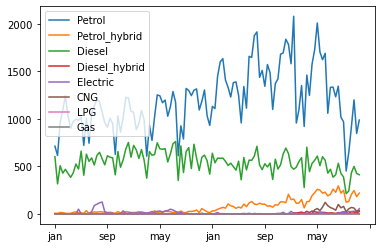

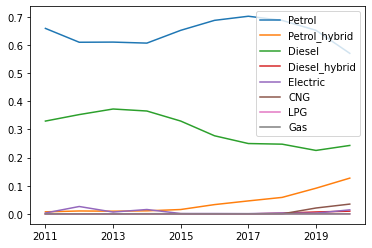

In [56]:
full_engine_type_monthly = pd.concat([motor_type_data_2011_monthly, motor_type_data_2012_monthly, motor_type_data_2013_monthly, motor_type_data_2014_monthly, motor_type_data_2015_monthly, motor_type_data_2016_monthly, motor_type_data_2017_monthly, motor_type_data_2018_monthly, motor_type_data_2019_monthly, motor_type_data_2020_monthly])
lines_monthly = full_engine_type_monthly.plot.line()
lines_yearly = motor_type_data_yearly_ratio.plot.line()

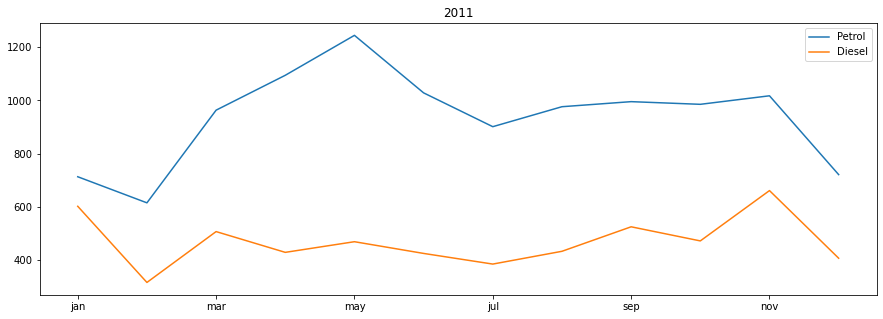

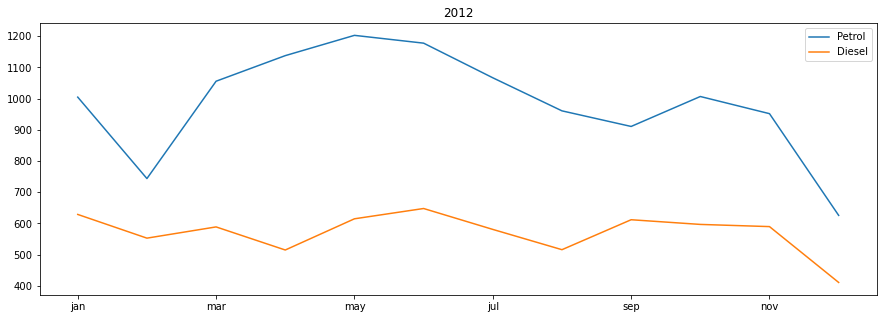

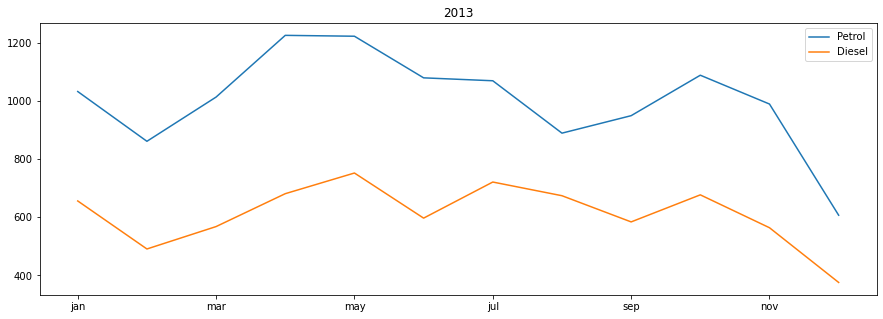

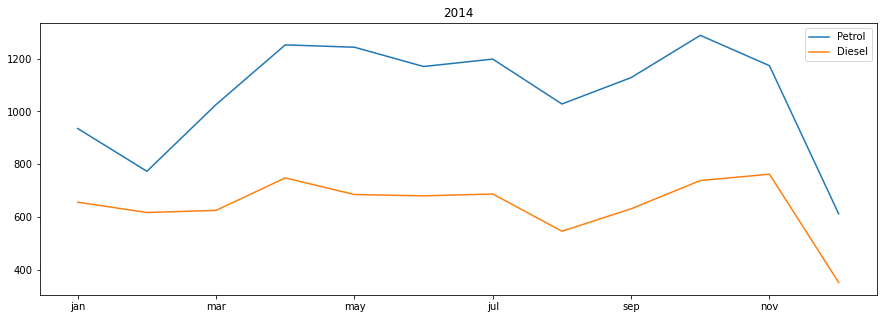

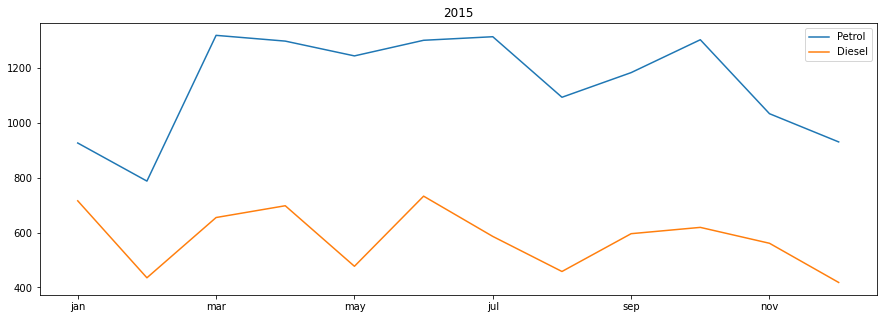

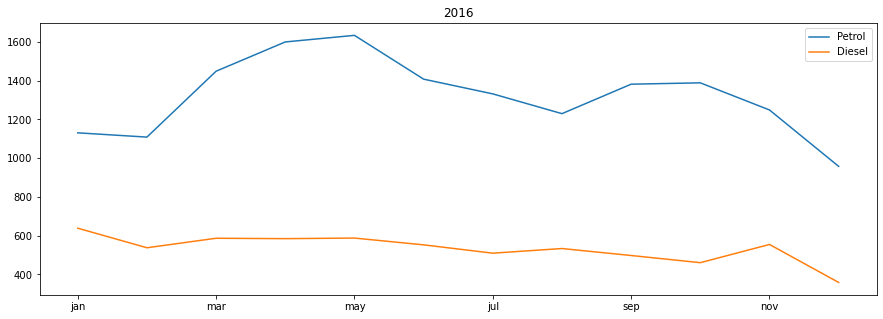

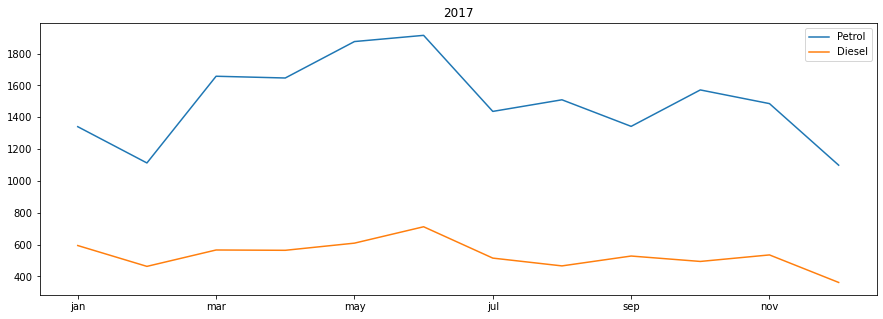

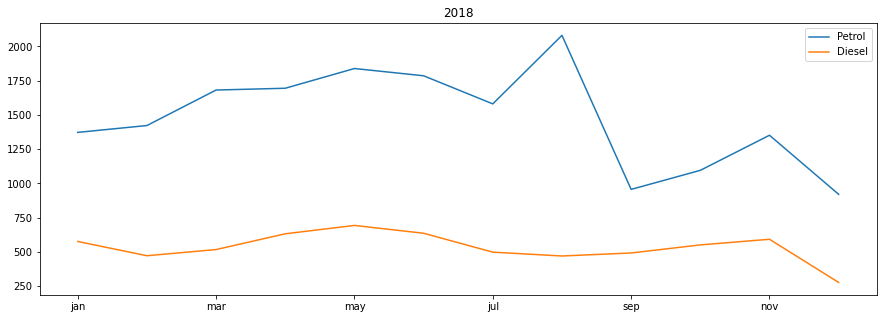

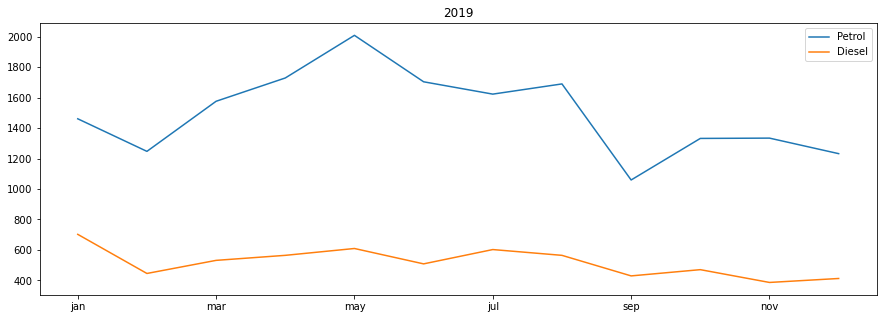

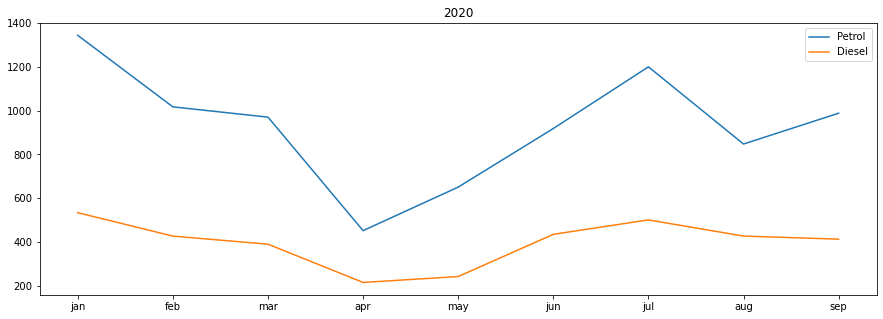

In [57]:
full_engine_type_monthly_ratio_year_to_month1 = pd.concat([motor_type_data_2011_monthly_ratio_year_to_month, motor_type_data_2012_monthly_ratio_year_to_month, motor_type_data_2013_monthly_ratio_year_to_month, motor_type_data_2014_monthly_ratio_year_to_month, motor_type_data_2015_monthly_ratio_year_to_month, motor_type_data_2016_monthly_ratio_year_to_month, motor_type_data_2017_monthly_ratio_year_to_month, motor_type_data_2018_monthly_ratio_year_to_month, motor_type_data_2019_monthly_ratio_year_to_month, motor_type_data_2020_monthly_ratio_year_to_month])
motor_type_data_2011_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2011")
motor_type_data_2012_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2012")
motor_type_data_2013_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2013")
motor_type_data_2014_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2014")
motor_type_data_2015_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2015")
motor_type_data_2016_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2016")
motor_type_data_2017_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2017")
motor_type_data_2018_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2018")
motor_type_data_2019_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2019")
motor_type_data_2020_monthly.plot(y=["Petrol", "Diesel"], figsize=(15,5), title="2020")

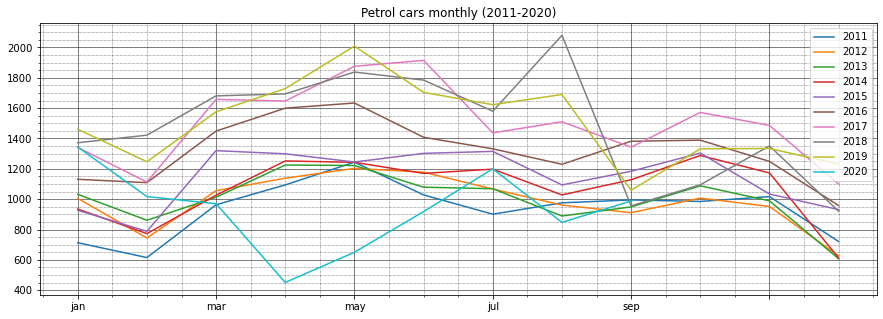

In [76]:
#plt.plot(y=[motor_type_data_2011_monthly["Petrol"], motor_type_data_2012_monthly["Petrol"]], figsize=(15,5), title="2011")
ax = motor_type_data_2011_monthly["Petrol"].plot(figsize=(15,5), title="Petrol cars monthly (2011-2020)") 

motor_type_data_2012_monthly["Petrol"].plot(ax=ax)
motor_type_data_2013_monthly["Petrol"].plot(ax=ax)
motor_type_data_2014_monthly["Petrol"].plot(ax=ax)
motor_type_data_2015_monthly["Petrol"].plot(ax=ax)
motor_type_data_2016_monthly["Petrol"].plot(ax=ax)
motor_type_data_2017_monthly["Petrol"].plot(ax=ax)
motor_type_data_2018_monthly["Petrol"].plot(ax=ax)
motor_type_data_2019_monthly["Petrol"].plot(ax=ax)
motor_type_data_2020_monthly["Petrol"].plot(ax=ax)
ax.legend(["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"])
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

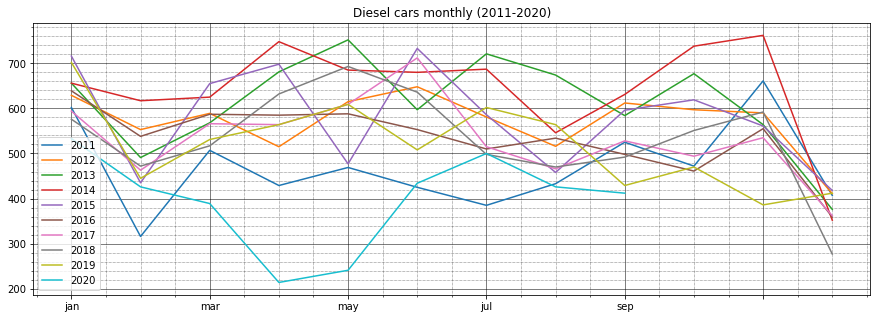

In [75]:
ax = motor_type_data_2011_monthly["Diesel"].plot(figsize=(15,5), title="Diesel cars monthly (2011-2020)") 

motor_type_data_2012_monthly["Diesel"].plot(ax=ax)
motor_type_data_2013_monthly["Diesel"].plot(ax=ax)
motor_type_data_2014_monthly["Diesel"].plot(ax=ax)
motor_type_data_2015_monthly["Diesel"].plot(ax=ax)
motor_type_data_2016_monthly["Diesel"].plot(ax=ax)
motor_type_data_2017_monthly["Diesel"].plot(ax=ax)
motor_type_data_2018_monthly["Diesel"].plot(ax=ax)
motor_type_data_2019_monthly["Diesel"].plot(ax=ax)
motor_type_data_2020_monthly["Diesel"].plot(ax=ax)
ax.legend(["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"])
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

### Some observations for petrol and diesel cars in monthly manner
##### December
With one exception (2019 diesel cars) in the month of December the number is less than in the month of November. Also the total number of registered cars in December for both types of cars is less than any month in the year. And that is so even if we do not include 2020 (as it has february data but not december data).
This fenomen might come down to two reasons. Of which the first one is that in december there are a lot of national holidays and the second being that people want to register cars in new year as then the model number  would be a new one. Which is thought to be a good idea if you want to sell cars in the future, as it is thought to be easier to sell newer cars.

##### February
It has the second least registered new cars in the year. This comes down to the fact that february is the shortest month in the year.


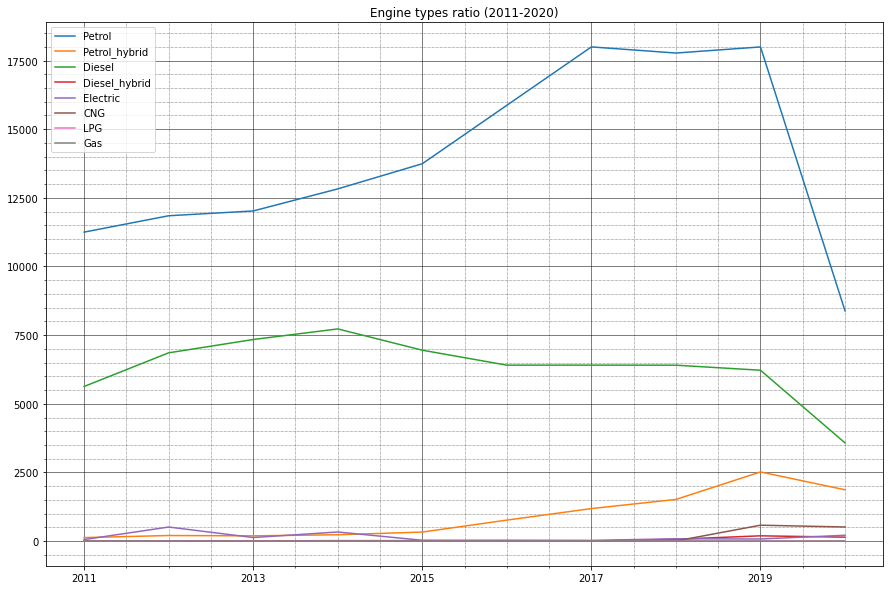

In [80]:
ax = motor_type_data_yearly.plot(figsize=(15,10), grid=True, title="Engine types total (2011-2020)")
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

### Some observations for petrol and diesel cars in yearly manner
##### 2011-2019
The total number has been in constant rise, which has mainly been driven by petrol engine cars.

##### 2020
The decline in the number of registered cannot be compared at the moment, as 2020 is still ongoing, but all of the signs are indicating that the total number of cars is going to be less than previous year, for all of the 2020 months till September are lower than 2019 numbers. What is more, it is quite possible that the total number of cars will be lower that any year since 2011.


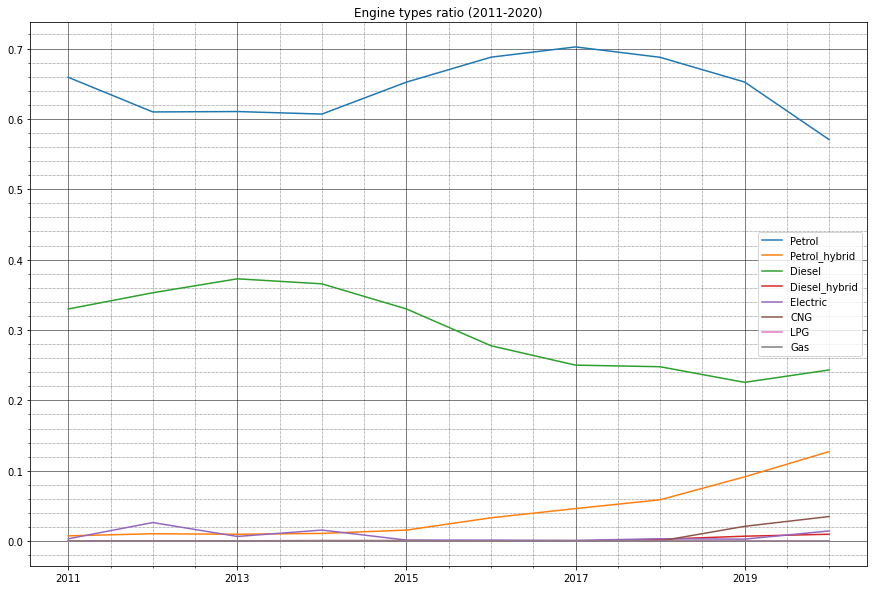

In [79]:
ax = motor_type_data_yearly_ratio.plot(figsize=(15,10), grid=True, title="Engine types ratio (2011-2020)")
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

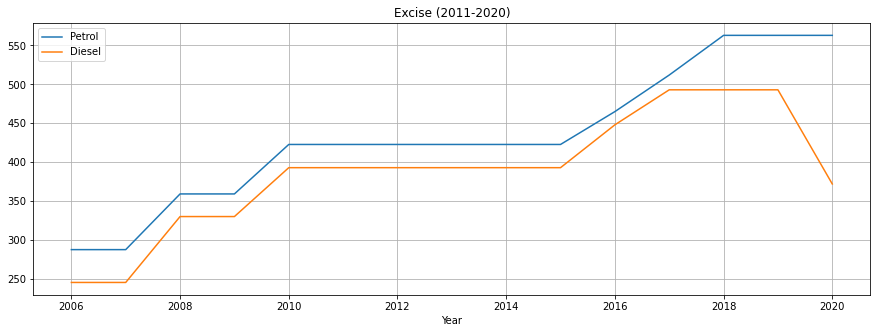

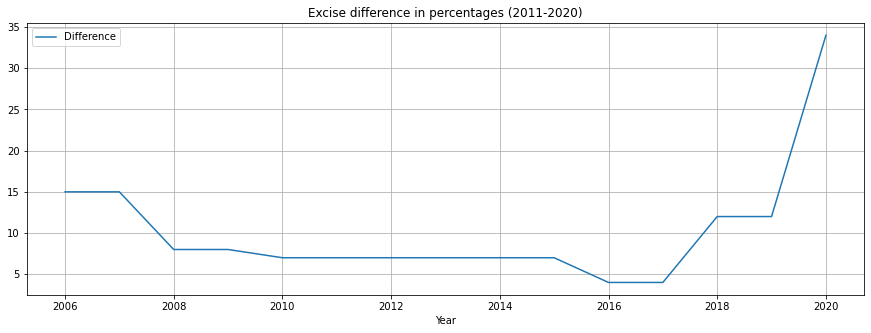

In [113]:
excise = pd.read_csv("excise_data.csv", sep=";")
excise.round(0)
excise.plot(x="Year", grid=True, figsize=(15,5), title="Excise (2011-2020)")

excise_difference = excise
excise_difference['Difference'] = excise_difference.apply(lambda x: (1 - x['Diesel'] / x['Petrol']) * 100, axis=1).round(0)
excise_difference.plot(x="Year", y="Difference", figsize=(15,5), grid=True, title="Excise difference in percentages (2011-2020)")

### Excise
#### 2011-2016 (Diesel excise is 7% less than petrol excise)
From the "Engine types ratio (2011-2020)" chart and excise chart we can see that, in the period of 2011-2016 (when petrol excise was approx. 4-7% higher) both fuel types did not change more than +-5% against average. What is more, the two fuel types had been mirroring each other against the 0.5 point middle line. So if petrol lost market percentage the diesel gained approximately the same amount of market.
 
#### 2017-2020
From 2017-2020 (first 9 months), the petrol engine cars lost almost 0.15 of its numbers. At the same time the diesel part has remained the same.
The drop in petrol cars can be explained by an increase of 0.07 point for petrol hybrid cars and CNG cars by 0.04 points.
 
##### 2016 excise (Diesel excise is 4% less than petrol excise)
It seems that after 2016 excise estonians started to prefer petrol hybrid cars, as this trend has been on an upturn since then. At the same time diesel car market share still declined.
 
##### 2017 excise (Diesel excise is 4% less than petrol excise)
This can be marked as the point where pure petrol cars lost their appeal and since then started to fall in sale numbers.
 
##### 2018 excise (Diesel excise is 12% less than petrol excise)
Petrol engined cars lost their market share at an even higher pace. Diesel cars market shares stabilized.
 
##### 2020 excise (Diesel excise is 34% less than petrol excise)
Then after the difference by 34% in excise, the pure petrol engine cars have dropped 0.08 points, at the same time diesel cars have risen by a small margin 0.02 points for the first time since 2013. Similar 0.02 growth can be seen for CNG and electric cars. Biggest upsurge has been for petron hybrid cars cars by 0.04 points.
 
### Electric cars
The electric vehicle numbers have been higher than 0 twice. As seen on the chart in 2012-2014 and 2020, and this can be easily identified as the two periods when the Estonian government has had aid for electric car buyers. In 2011-2014 there was a 50% (or up to 18000€) discount for electric car buyers and in 2020 the governmental discount has been 5000€. Note that both discounts were for a limited number of customers and were capped in a few hours.

